# GML HS 2025 - Mini-Challenge 2

**Ausgabe:** Montag, 27. Oktober 2025

**Abgabe:** Sonntag, 23. November 2025, 23:59 Uhr

In [4]:
# DO NOT EDIT THIS CELL
# ADD IMOPRTS IN ASSIGNMENT CELLS

# Notebook configs
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML

InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Vorgaben zu Umsetzung und Abgabe

- Der Code in diesem Notebook muss lauffähig sein bei Ausführung im Docker-Container zum Repo. Nur was durchläuft wird korrigiert.
- Es darf kein Code ausgelagert werden, i.e. sämtlicher Code muss sich im Notebook befinden. Notebooks dürfen weder umbenannt werden, noch soll die Ordnerstruktur im Repo verändert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Überschrift, Colorbar, ..), so dass der Plot ohne den Code zu konsultieren, verstanden werden kann.
- Gib sämtliche relevanten berechneteten Grössen / Metriken mit `print`-Statements aus, e.g. `print('MAE = ', mae)`.
- Als **Abgabe** zählt der letzte Commit vor Abgabetermin in deinem Fork des Repos.  
- **Löschen, kopieren, duplizieren, splitten und verschiebe die vorhandenen Zellen nicht. Für fehlende Antwortzellen gibt es keine Punkte.** Du darfst beliebig viele weitere Zellen hinzufügen (nur via **insert new cell**).
- Laufzeit des Notebooks: Das Notebook sollte in weniger als 30 Minuten ausgeführt werden können.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden.  
Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text kopiert werden, weder vom Internet noch von Mitstudierenden.**

**ChatGPT und ähnliche Sprachmodelle dürfen im Dienst des eigenen Verständnisgewinns beim Lösen der Mini-Challenge verwendet werden. Es dürfen aber keine Lösungen gesamthaft übernommen werden. Zudem muss die gesamte Lösung, Zeile für Zeile und im gesamten Zusammenhang der Aufgabenstellung (in der Defense) erklärt werden können.** 

Beim Vorfinden von kopiertem Code werden alle betroffenen Aufgaben von allen Beteiligten mit 0 Punkten bewertet.


#### Python Module

Neben der Python Standard Library darfst du die folgenden Module immer benutzen: `numpy`, `pandas`, `matplotlib`, `seaborn` (für Progress-Bars).

Du darfst auch generell [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html), [sklearn.pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) und [sklearn.compose](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) verwenden.

Zusätzliche Module darst du nur verwenden wenn dies ausdrücklich erwähnt oder bereits vorgegeben ist in einer Code-Cell.

### Bewertung

Bewertet wird:

- Vollständigkeit (Code, Text)
- Korrektheit (Code, Text)
- Implementation (z.B. Vektorisierung der Operationen, Scikit-Learn API, Visualisierungen, Lesbarkeit Code/Output)

### Einleitung

Das Kantonsspital Aarau arbeitet an einem Forschungsprojekt namens HerzCheck. Ziel des Projekts ist es, mithilfe von Datenanalyse und Machine Learning ein Frühwarnsystem für Herzkrankheiten zu entwickeln.  

Dazu haben die Forschenden eine Stichprobe anonymisierter Patientendaten gesammelt. Jede Zeile des Datensatzes beschreibt eine Person, die sich einer Routineuntersuchung unterzogen hat. Anhand medizinischer Messwerte wie Blutdruck, Cholesterinwert, EKG-Ergebnisse und Belastungstests soll ein Modell lernen, ob bei einem Patienten Anzeichen einer Herzkrankheit vorliegen oder nicht.  

Du wirst angefragt, bei der Entwicklung eines Klassifikationsmodells mitzuhelfen, das aus diesen Daten lernen kann, den Gesundheitszustand (Herzkrankheit: ja/nein) korrekt vorherzusagen.  

Das Modell könnte Ärztinnen und Ärzten später helfen, Risikopatienten frühzeitig zu erkennen und gezielt zu behandeln.  

Der Datensatz der dir überreicht wird ist in Trainings- (`herzcheck_train.csv`) und Testdaten (`herzcheck_test.csv`) unterteilt und beinhaltet folgende Merkmale.  


| Merkmal                           | Beschreibung                                                                                                                                                                                                                           |
| --------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Alter**                         | Alter der Patientin oder des Patienten in Jahren                                                                                                                                                                                       |
| **Geschlecht**                    | Geschlecht der Patientin oder des Patienten (M = männlich, F = weiblich)                                                                                                                                                               |
| **Art der Brustschmerzen**        | Typ der auftretenden Brustschmerzen: <br>• **TA** – Typische Angina (klassischer Brustschmerz bei Belastung) <br>• **ATA** – Atypische Angina <br>• **NAP** – Nicht-anginöser Schmerz <br>• **ASY** – Asymptomatisch (keine Schmerzen) |
| **Ruheblutdruck**                 | Blutdruck in Ruhe (in mmHg)                                                                                                                                                                                                            |
| **Cholesterin**                   | Serum-Cholesterinwert (in mg/dl)                                                                                                                                                                                                       |
| **Nüchternblutzucker**            | 1, wenn der Nüchternblutzucker > 120 mg/dl beträgt, sonst 0                                                                                                                                                                            |
| **Ruhe-EKG**                      | Ergebnis des Ruhe-Elektrokardiogramms: <br>• **Normal** – unauffällig <br>• **ST** – ST-T-Wellen-Abnormalität (z. B. ST-Hebung oder -Senkung > 0,05 mV) <br>• **LVH** – Linksherzhypertrophie nach Estes-Kriterien                     |
| **Maximale Herzfrequenz**         | Höchste erreichte Herzfrequenz bei Belastung (zwischen 60 und 202)                                                                                                                                                                     |
| **Belastungsangina**              | Brustschmerz, der bei körperlicher Anstrengung auftritt (Y = ja, N = nein)                                                                                                                                                             |
| **ST-Senkung (Oldpeak)**          | Maß für die Absenkung der ST-Strecke im Belastungs-EKG (in mV); höhere Werte deuten auf mögliche Durchblutungsstörungen des Herzmuskels hin                                                                                            |
| **ST-Streckenneigung (ST Slope)** | Verlauf der ST-Strecke im Belastungs-EKG: <br>• **Up** – ansteigend (normal) <br>• **Flat** – flach (mittleres Risiko) <br>• **Down** – abfallend (Hinweis auf Ischämie)                                                               |
| **Herzkrankheit**                 | Zielvariable der Klassifikation: 1 = Herzkrankheit vorhanden, 0 = gesund                                                                                                                                                               |
|

**Kopiere den Datensatz nach `/data` und lade ihn von da.**

### Aufgabe 1 (8 Punkte)

Verschaffe dir einen Überblick über den Datensatz mittels Visualisierungen und deskriptiver Statistik, sodass du ein gutes Verständnis vom Datensatz bekommst und bereit bist, diesen zu modellieren.  

Erläutere die Ergebnisse der deskriptiven Analyse: Was ist dir aufgefallen? Was sind deine Erwartungen bezüglich der Modellierung der Zielvariablen?

Erörtere, wie du den Datensatz vorzubereiten brauchst, um die Zielvariable mit Hilfe der weiteren Attribute vorherzusagen.  

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Load data
train = pd.read_csv("./data/herzcheck_train.csv")
test = pd.read_csv("./data/herzcheck_test.csv")
df = pd.concat([train, test], ignore_index=True)

# prepare list with left=train and right=test
df_list = [(train, "Train"), (test, "Test")]


for df, name in df_list:
    print(80 * "=")
    print()
    print(f"{20*' '}Data Frame: {name}")
    print()
    print(df.info())
    print(80 * "-")
    print(df.describe())
    print(80 * "-")
    print(df.head())
    print(80 * "-")
    print(df.isnull().sum())
    print(80 * "-")
    print("Anzahl Duplikate:", df.duplicated().sum())


                    Data Frame: Train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alter                         688 non-null    int64  
 1   Geschlecht                    688 non-null    object 
 2   Art der Brustschmerzen        688 non-null    object 
 3   Ruheblutdruck                 688 non-null    int64  
 4   Cholesterin                   688 non-null    int64  
 5   Nüchternblutzucker            688 non-null    int64  
 6   Ruhe-EKG                      688 non-null    object 
 7   Maximale Herzfrequenz         688 non-null    int64  
 8   Belastungsangina              688 non-null    object 
 9   ST-Strecken-Senkung           688 non-null    float64
 10  Steigung der ST-Strecke       688 non-null    object 
 11  Herzkrankheit (Zielvariable)  688 non-null    int64  
dtypes: float64(1), int64(6),

#### Potenzielle Probleme

- Bei dem Train Data Frame haben wir bei der Variable Cholesterin einen minumum von 0
- Bei dem Test Data Frame haben wir bei der Variable Cholesterin einen minumum von 0
- Bei dem Test Data Frame haben wir bei der Variable Ruheblutdruck einen minumum von 0

In [6]:
for df, name in df_list:
    print(80 * "=")
    print()
    print(f"{20*' '}Data Frame: {name}")
    print()
    print("Cholesterin == 0:", df["Cholesterin"].eq(0).sum())
    print("Ruheblutdruck == 0:", df["Ruheblutdruck"].eq(0).sum())


                    Data Frame: Train

Cholesterin == 0: 128
Ruheblutdruck == 0: 0

                    Data Frame: Test

Cholesterin == 0: 44
Ruheblutdruck == 0: 1


In [7]:
# Cholesterin = 0 als NaN markieren
train["Cholesterin"].replace(0, np.nan, inplace=True)
test["Cholesterin"].replace(0, np.nan, inplace=True)

# Ruhefrequenz = 0 als NaN markieren
test["Ruheblutdruck"].replace(0, np.nan, inplace=True)

/var/folders/sz/cyfjsbbn5_b4hthg95tlx0pm0000gn/T/ipykernel_70980/223226248.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Cholesterin"].replace(0, np.nan, inplace=True)
/var/folders/sz/cyfjsbbn5_b4hthg95tlx0pm0000gn/T/ipykernel_70980/223226248.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

Es gibt viele Observationen die einen Cholesterinwert von 0 haben. Dies ist medizinisch nicht plausibel, da ein Cholesterinwert von 0 nicht existieren kann. Wahrscheinlich handelt es sich hierbei um fehlende Werte, die fälschlicherweise als 0 kodiert wurden. Ähnlich verhält es sich mit dem Ruheblutdruck im Test Data Frame, wo ebenfalls einige Observationen einen Wert von 0 aufweisen, was ebenfalls medizinisch nicht plausibel ist. Auch hier handelt es sich wahrscheinlich um fehlende Werte, die fälschlicherweise als 0 kodiert wurden.

Für solche Fälle müssen die 0-Werte in den betroffenen Spalten als fehlende Werte behandelt werden. Für die Analyse werden diese 0-Werte durch NaN (Not a Number) ersetzt, um sie korrekt als fehlende Werte zu kennzeichnen. Später werden wir geeignete Imputationsmethoden anwenden, um diese fehlenden Werte zu behandeln, bevor wir mit der Modellierung fortfahren.

#### Nüchternblutzucker, Herzkrankheit in Kategorien umwandeln
Die Variablen Nüchternblutzucker und Herzkrankheit sind binäre Variablen, die als numerische Werte (0 und 1) kodiert sind. Für die Modellierung ist es oft vorteilhaft, solche binären Variablen als kategoriale Variablen zu behandeln, da dies dem Modell hilft, die Unterschiede zwischen den Kategorien besser zu verstehen. Daher sollten wir diese beiden Variablen in kategoriale Variablen umwandeln.

In [8]:
# Wenn Herzkrankheit = 1 dann True sonst False
train["Herzkrankheit (Zielvariable)"] = train["Herzkrankheit (Zielvariable)"].map(
    {0: False, 1: True}
)
test["Herzkrankheit (Zielvariable)"] = test["Herzkrankheit (Zielvariable)"].map(
    {0: False, 1: True}
)

# Wenn Nüchternblutzucker = 1 dann True sonst False
train["Nüchternblutzucker"] = train["Nüchternblutzucker"].map({0: False, 1: True})
test["Nüchternblutzucker"] = test["Nüchternblutzucker"].map({0: False, 1: True})

#### Univariate Plots

```_ =``` = sorgt dafür, dass Rückgabewerte (z. B. AxesSubplot oder Text) nicht im Output landen. Dies wird in dem ganzen Notebook mehrmals vorkommen.

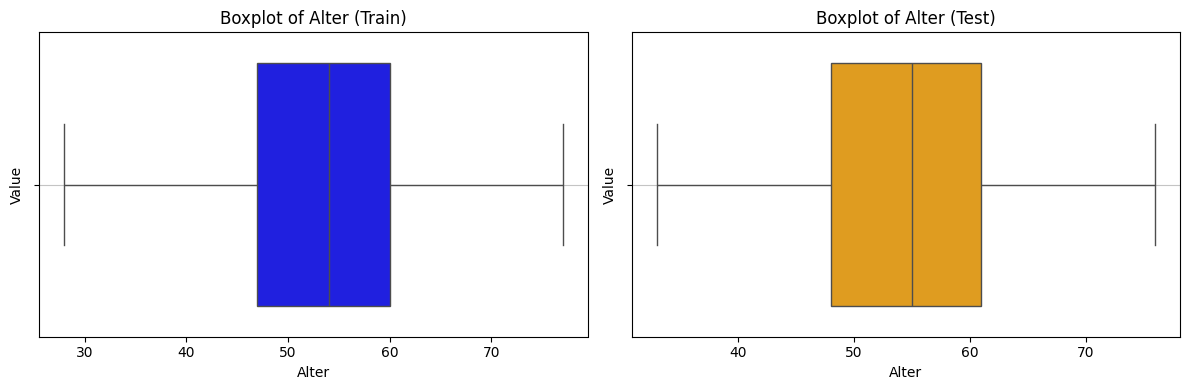

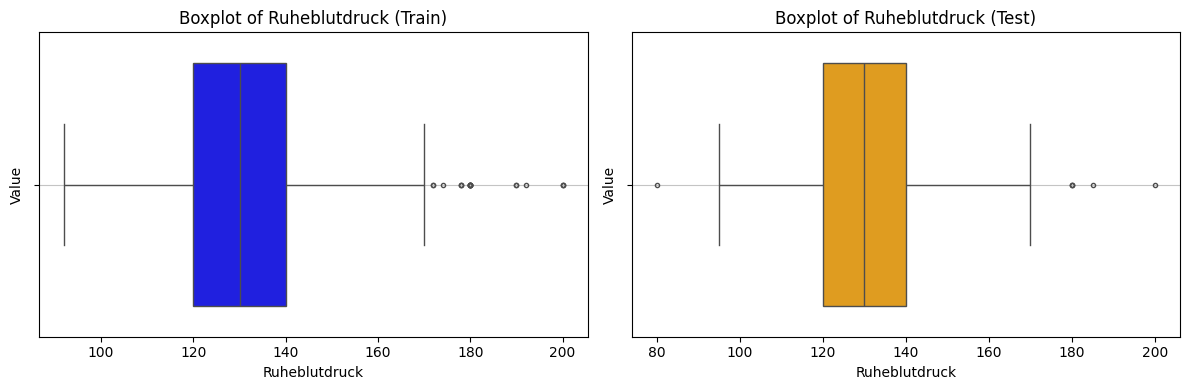

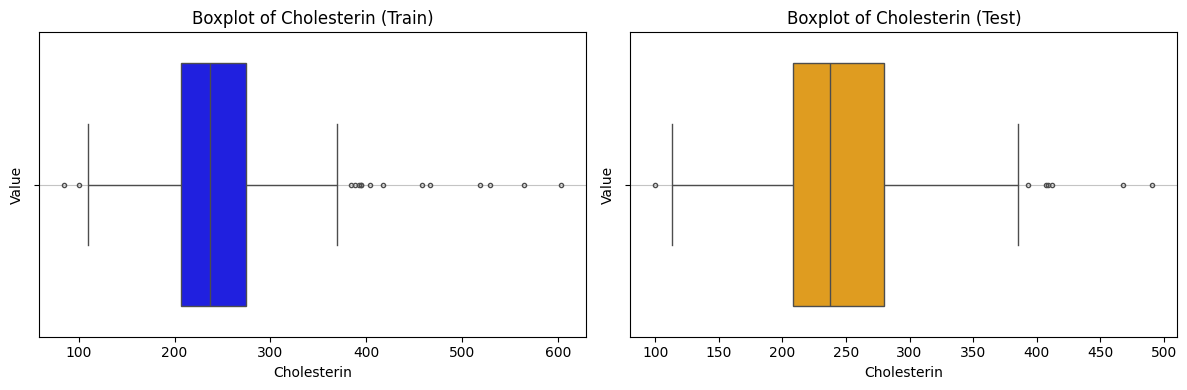

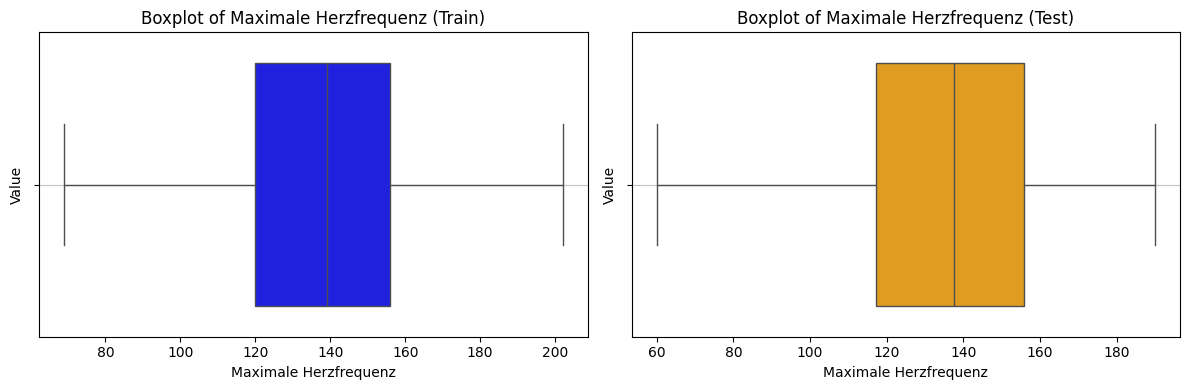

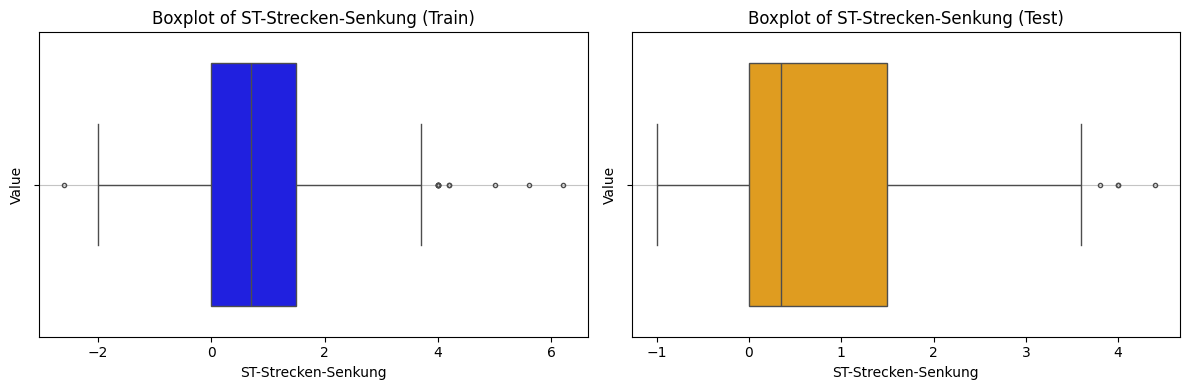

In [9]:
# Definiere explizit, welche numerischen Spalten binär/kategorisch sind
binary_cols = ["Nüchternblutzucker", "Herzkrankheit (Zielvariable)"]

# Kontinuierliche numerische Features (für Pairplot, Boxplots, etc.)
continuous_cols = [
    col
    for col in train.select_dtypes(include=np.number).columns
    if col not in binary_cols
]

# Kategoriale Features (object + die binären numerischen)
categorical_cols = train.select_dtypes(include="object").columns.tolist() + binary_cols

# Boxplots for numerical variables (Train | Test side-by-side)
for col in continuous_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    for ax, (df, name) in zip(axes, df_list):
        _ = sns.boxplot(
            x=df[col].dropna(),
            ax=ax,
            color=("blue" if name == "Train" else "orange"),
            fliersize=3,
        )
        _ = ax.set_title(f"Boxplot of {col} ({name})")
        _ = ax.set_xlabel(col)
        _ = ax.set_ylabel("Value")
        ax.grid(axis="y", alpha=0.75)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

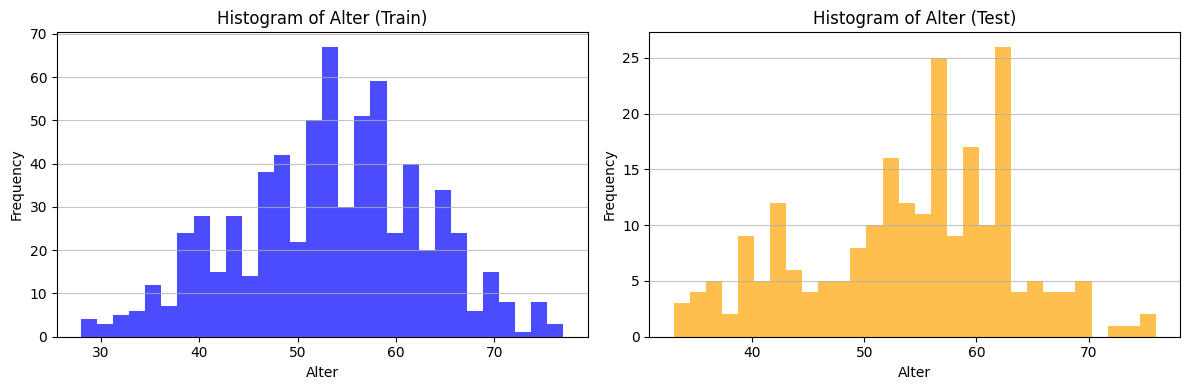

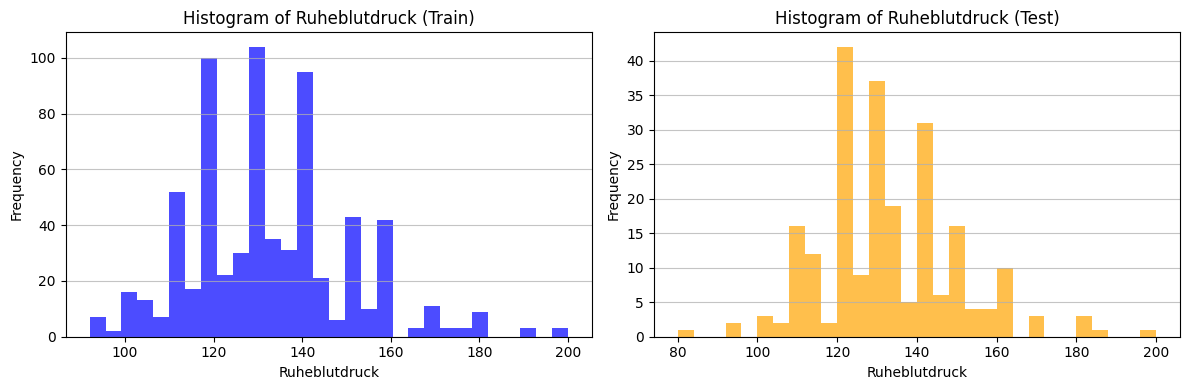

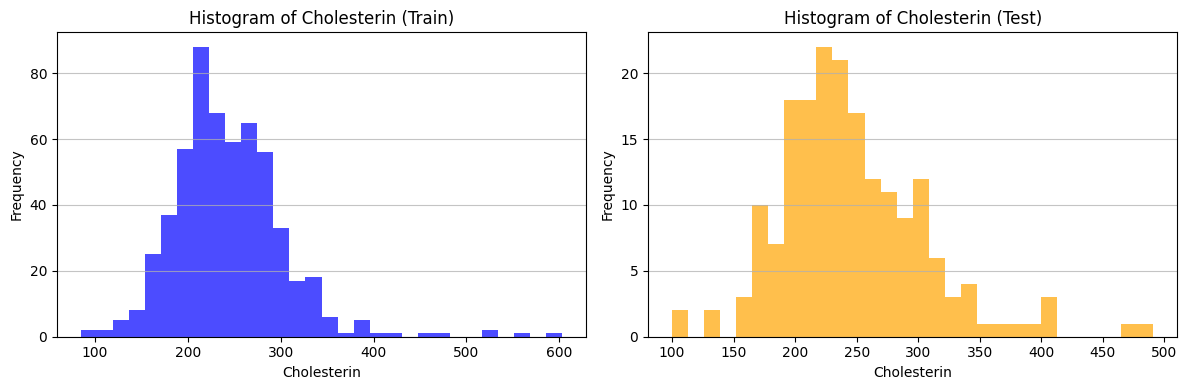

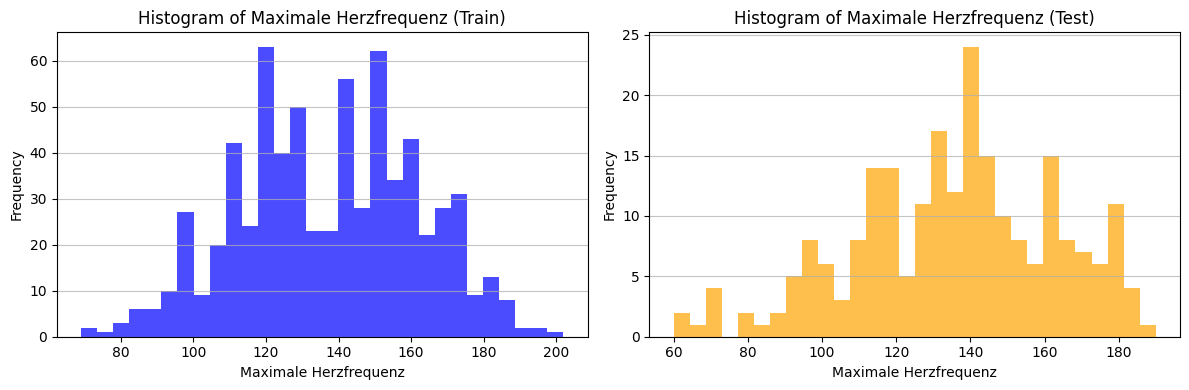

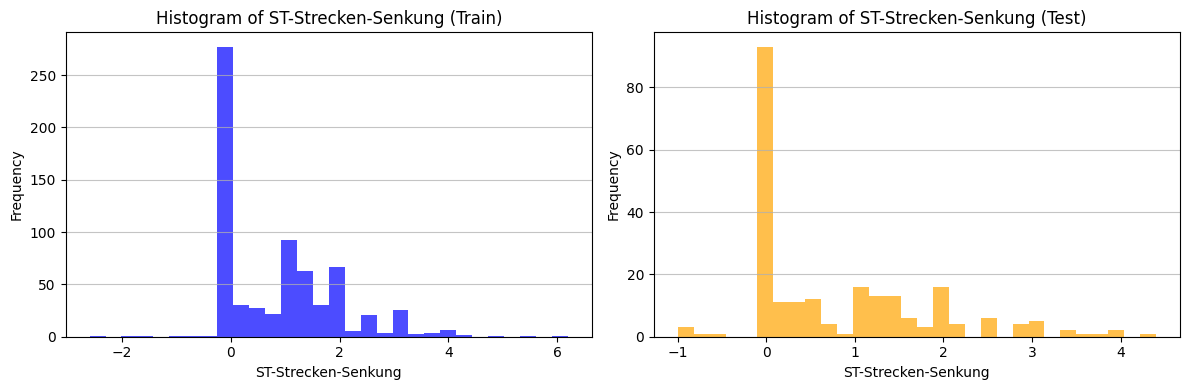

In [10]:
# Histograms for numerical columns (2 plots side-by-side: Train | Test)
for col in continuous_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    for ax, (df, name) in zip(axes, df_list):
        _counts, _bins, _patches = ax.hist(
            df[col].dropna(),
            bins=30,
            color=("blue" if name == "Train" else "orange"),
            alpha=0.7,
        )
        _ = ax.set_title(f"Histogram of {col} ({name})")
        _ = ax.set_xlabel(col)
        _ = ax.set_ylabel("Frequency")
        ax.grid(axis="y", alpha=0.75)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

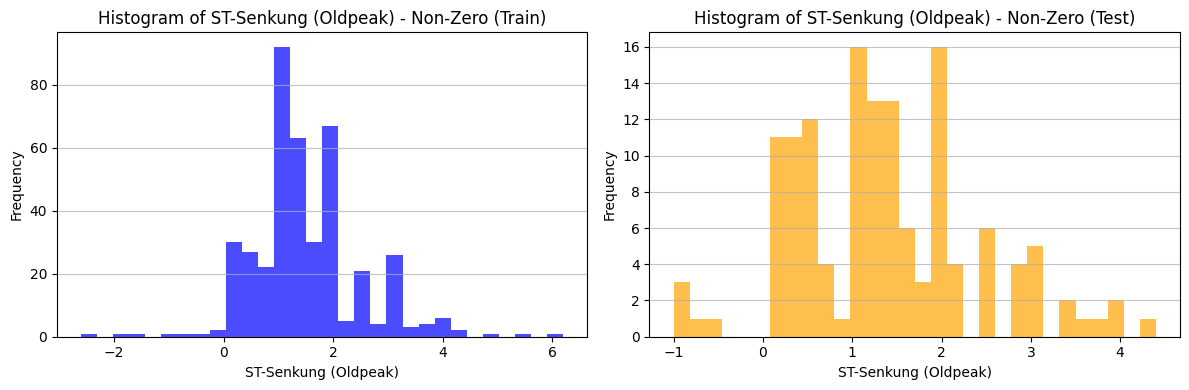

In [11]:
# Histograms für ST-Strecken-Senkung ohne Nullwerte (Train | Test side-by-side) genauer betrachtet
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax, (df, name) in zip(axes, df_list):
    # Filter out zero values
    data_nonzero = df["ST-Strecken-Senkung"].replace(0, np.nan).dropna()

    _counts, _bins, _patches = ax.hist(
        data_nonzero,
        bins=30,
        color=("blue" if name == "Train" else "orange"),
        alpha=0.7,
    )
    _ = ax.set_title(f"Histogram of ST-Senkung (Oldpeak) - Non-Zero ({name})")
    _ = ax.set_xlabel("ST-Senkung (Oldpeak)")
    _ = ax.set_ylabel("Frequency")
    ax.grid(axis="y", alpha=0.75)
plt.tight_layout()
plt.show()
plt.close(fig)

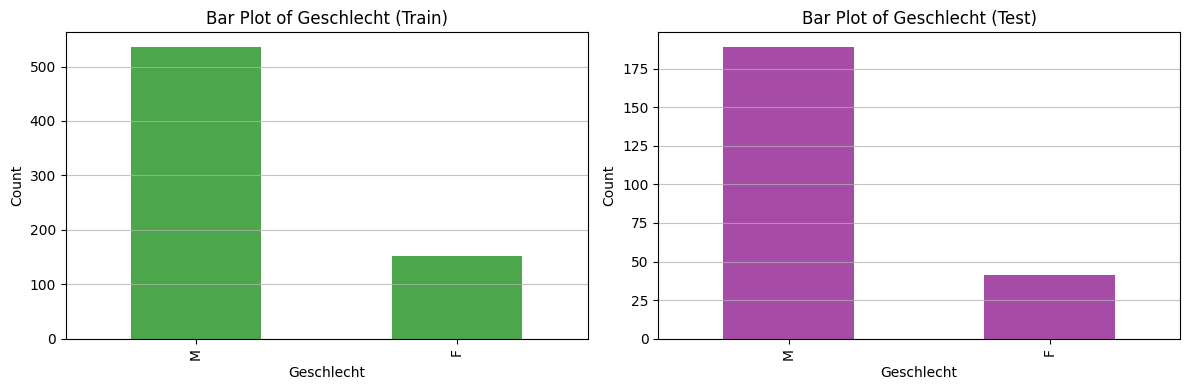

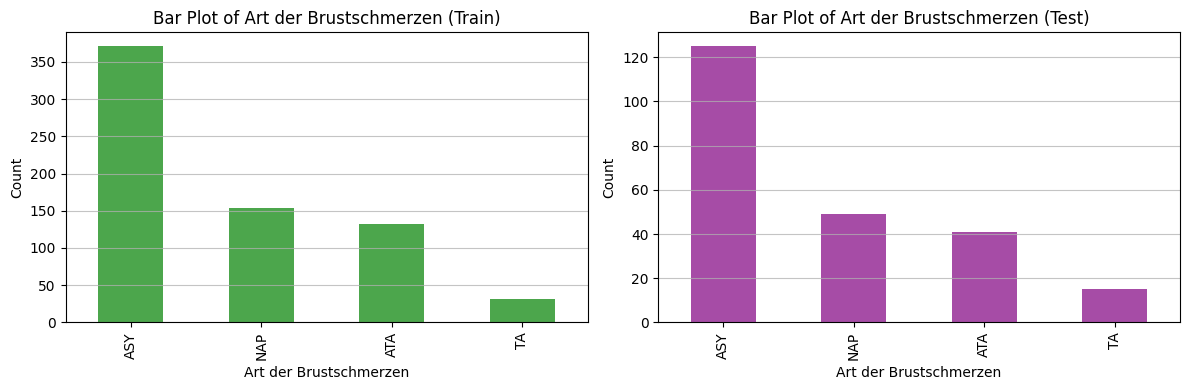

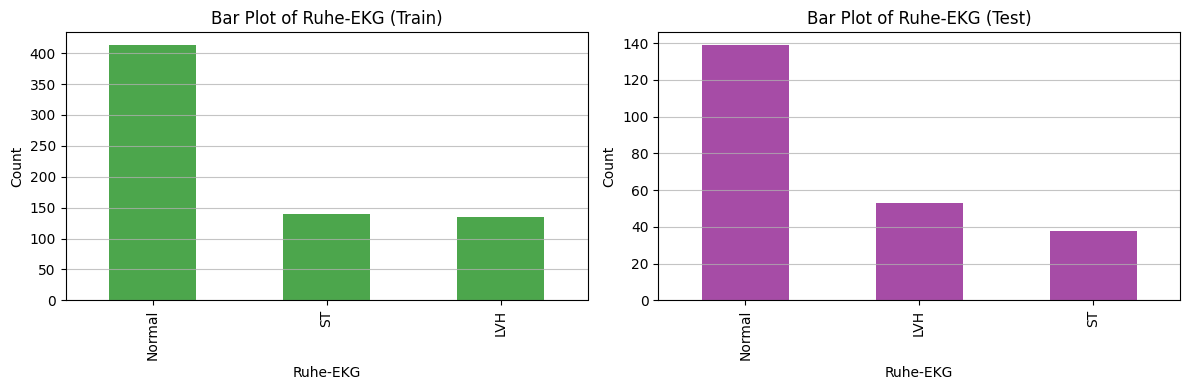

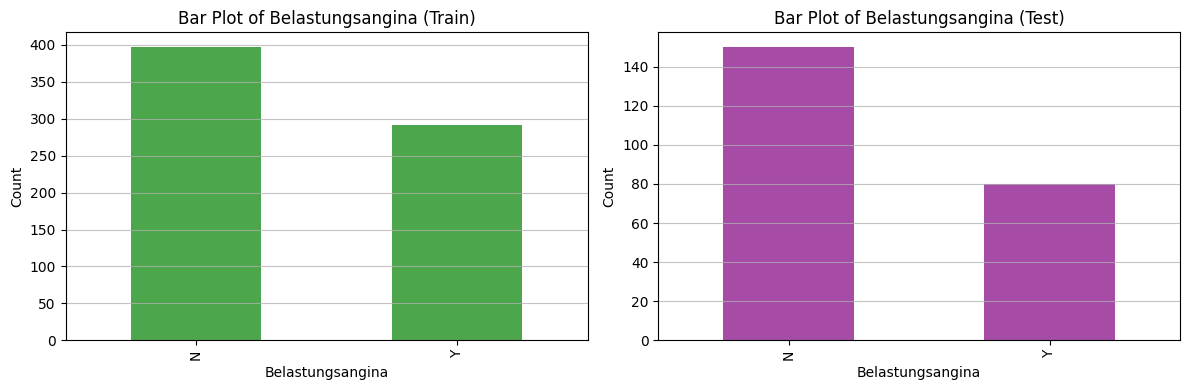

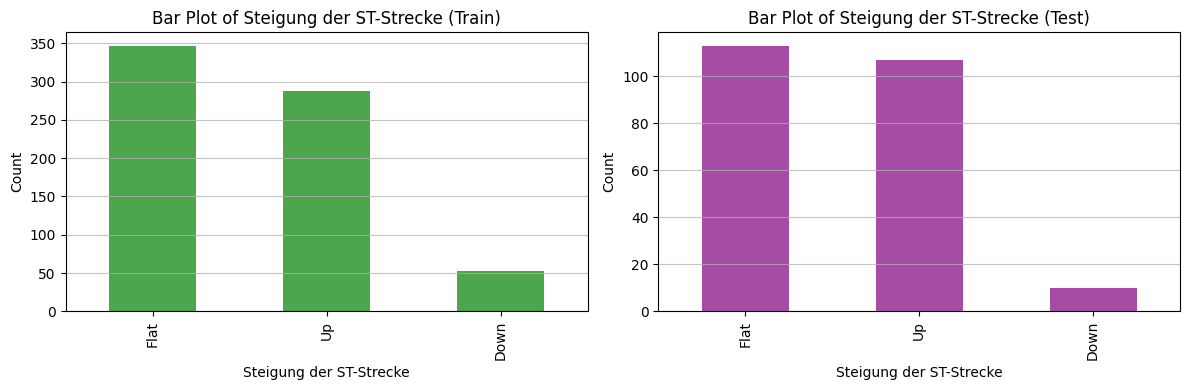

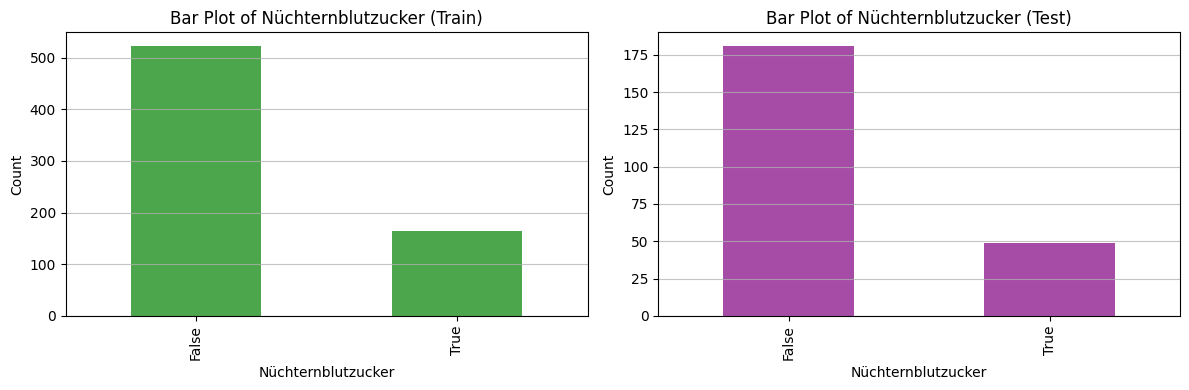

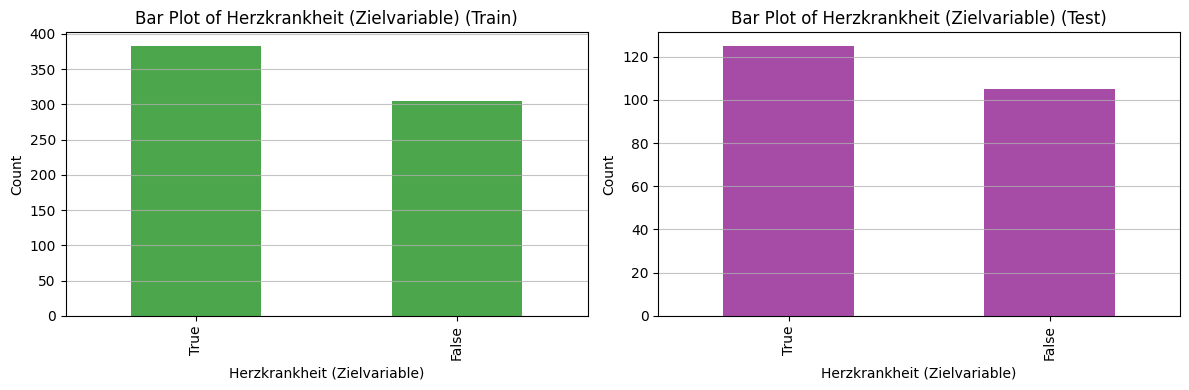

In [12]:
# Bar plots for categorical columns (2 plots side-by-side: Train | Test)
for col in categorical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    for ax, (df, name) in zip(axes, df_list):
        counts = df[col].value_counts(dropna=False)

        # Barplot zeichnen und Rückgabewerte ignorieren
        _ = counts.plot(
            kind="bar",
            ax=ax,
            color=("green" if name == "Train" else "purple"),
            alpha=0.7,
        )

        # Auch hier Rückgaben unterdrücken
        _ = ax.set_title(f"Bar Plot of {col} ({name})")
        _ = ax.set_xlabel(col)
        _ = ax.set_ylabel("Count")

        ax.grid(axis="y", alpha=0.75)

    plt.tight_layout()
    plt.show()
    plt.close(fig)

#### Bivariate Plots

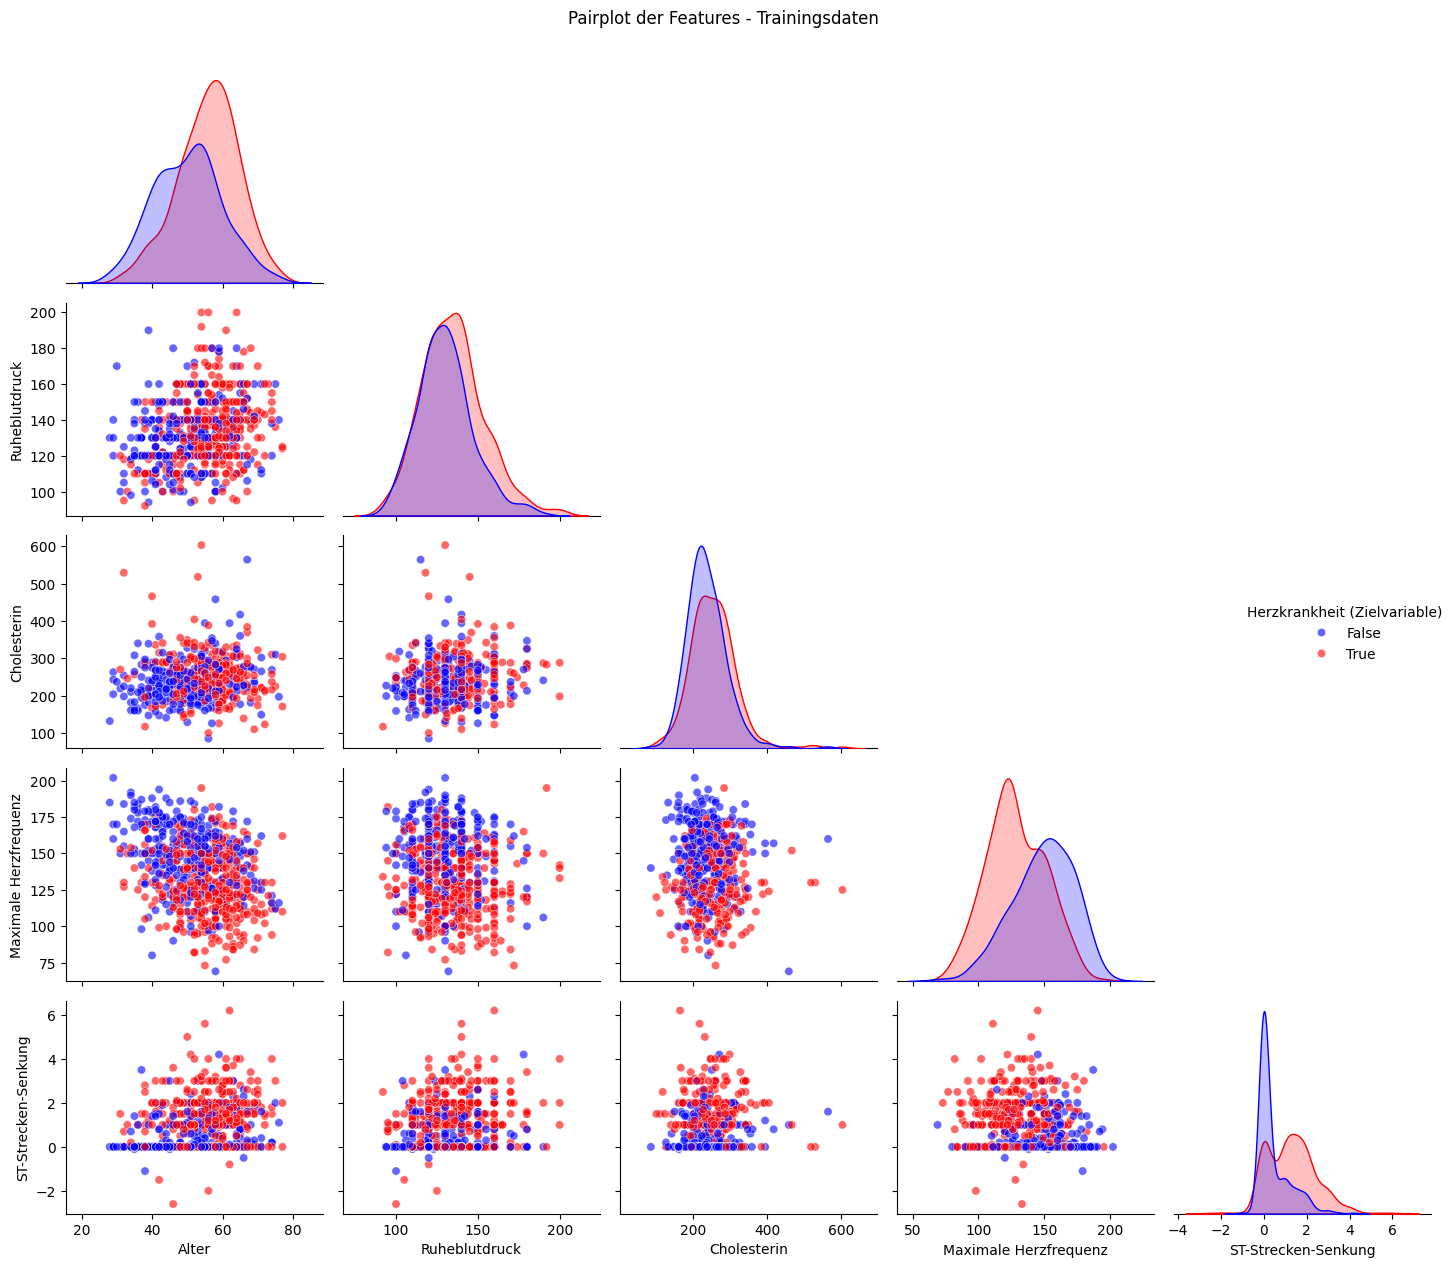

In [13]:
# Pairplot mit Farbcodierung nach Zielvariable
_ = sns.pairplot(
    train[continuous_cols + ["Herzkrankheit (Zielvariable)"]],
    hue="Herzkrankheit (Zielvariable)",
    diag_kind="kde",
    plot_kws={"alpha": 0.6},
    palette={True: "red", False: "blue"},
    corner=True,
)
_ = plt.suptitle("Pairplot der Features - Trainingsdaten", y=1.01)
plt.tight_layout()
plt.show()

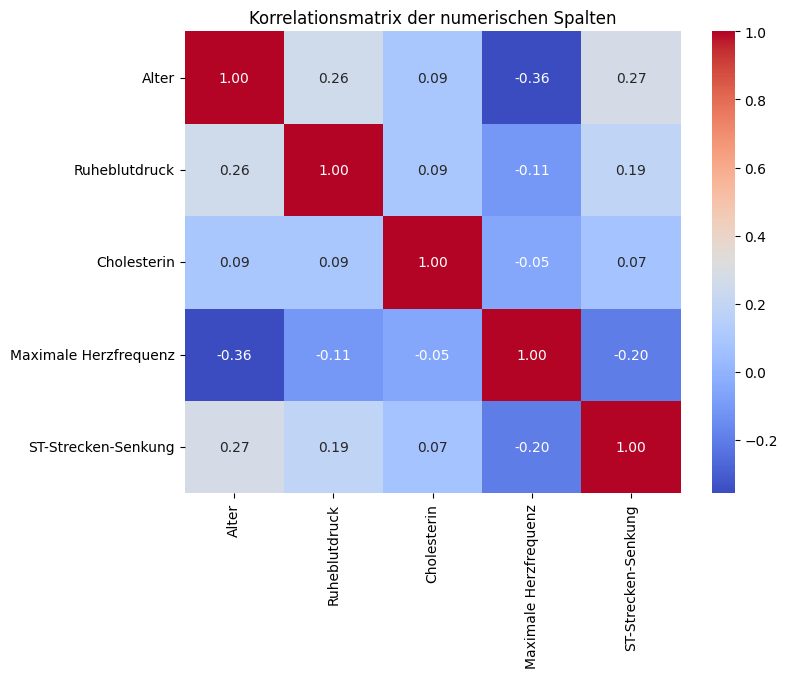

In [14]:
# Korrelationsmatrix für numerische Spalten
correlation_matrix = train[continuous_cols].corr()
_ = plt.figure(figsize=(8, 6))
_ = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
_ = plt.title("Korrelationsmatrix der numerischen Spalten")
plt.show()

# Antwort zu Aufgabe 1: Explorative Datenanalyse des HerzCheck-Datensatzes

## 1. Überblick über den Datensatz

Der Datensatz umfasst **688 Trainings-** und **230 Testbeobachtungen** mit **12 Merkmalen** (11 Prädiktoren + 1 Zielvariable). Es liegen keine fehlenden Werte vor, allerdings sind einige **Datenqualitätsprobleme** erkennbar.

### Deskriptive Statistik - Zentrale Erkenntnisse:

**Zielvariable (Herzkrankheit):**
- Die Klassen sind relativ **balanciert**: ~55.7% haben eine Herzkrankheit im Trainingsdatensatz, ~54.3% im Testdatensatz
- Dies ist günstig für die Modellierung und erfordert keine spezielle Behandlung von Klassenungleichgewicht

**Numerische Merkmale:**
- **Alter**: Durchschnitt ~53 Jahre, normalverteilt zwischen 28-77 Jahren
- **Ruheblutdruck**: Mittelwert ~133 mmHg, jedoch **Ausreißer bei 0 mmHg** (physiologisch unmöglich)
- **Cholesterin**: Mittelwert ~199 mg/dl, aber **über 120 Nullwerte im Train-Set** – deutliches Datenqualitätsproblem
- **Maximale Herzfrequenz**: Durchschnitt ~137 bpm, normalverteilt
- **ST-Strecken-Senkung**: Rechtsschiefe Verteilung, Median bei 0.7, viele Werte konzentriert bei 0

## 2. Auffälligkeiten aus den Visualisierungen

### Numerische Features:

**Boxplots und Histogramme zeigen:**
- **Cholesterin**: Massive Häufung bei 0 mg/dl (>100 Fälle) – vermutlich fehlende Messwerte, die als 0 kodiert wurden
- **Ruheblutdruck**: Einige Nullwerte im Testdatensatz, Ausreißer bis 200 mmHg
- **ST-Strecken-Senkung**: Stark rechtsschiefe Verteilung, viele Werte bei exakt 0
- **Alter** und **Maximale Herzfrequenz**: Beide relativ normalverteilt, Train- und Test-Set zeigen ähnliche Verteilungen (gutes Zeichen)

### Kategorische Features:

**Balkendiagramme zeigen:**
- **Geschlechtsverteilung**: Deutliches Ungleichgewicht – ca. 75% männlich, 25% weiblich
- **Art der Brustschmerzen**: ASY (asymptomatisch) mit Abstand am häufigsten (~50%), gefolgt von NAP, ATA und TA
- **Ruhe-EKG**: Normal dominiert (~60%), ST und LVH etwa gleichhäufig
- **Belastungsangina**: Relativ ausgewogen (ca. 55% N, 45% Y)
- **Steigung der ST-Strecke**: Flat am häufigsten, Up mittel, Down selten
- **Nüchternblutzucker**: Ca. 75% haben normale Werte (<120 mg/dl)

### Korrelationsanalyse:

Die **Korrelationsmatrix** der numerischen Features zeigt wichtige Zusammenhänge:

**Stärkste Korrelationen:**
- **Alter ↔ Maximale Herzfrequenz**: r = -0.36 (moderat negativ) – ältere Patienten erreichen niedrigere maximale Herzfrequenzen
- **Alter ↔ ST-Strecken-Senkung**: r = 0.27 (schwach positiv) – mit dem Alter steigt die ST-Senkung
- **Maximale Herzfrequenz ↔ ST-Strecken-Senkung**: r = -0.20 (schwach negativ) – niedrigere Herzfrequenz assoziiert mit höherer ST-Senkung

**Schwache Korrelationen:**
- **Cholesterin** zeigt sehr schwache Korrelationen zu allen anderen Features (r < 0.20), was teilweise auf die vielen Nullwerte zurückzuführen sein könnte
- **Ruheblutdruck** korreliert nur schwach mit anderen Features

**Andere Erkenntnisse**
- **Cholesterin** Die vielen Nullwerte bei Cholesterin sind mehrheitlich bei Patienten mit Herzkrankheit zu finden, was auf eine mögliche Verzerrung hinweist. Dies macht es um so wichtiger, dass die Nullwerte sorgfältig behandelt werden.

**Interpretation**: Die Korrelationen sind insgesamt moderat bis schwach, was auf geringe **Multikollinearität** hindeutet – ein positiver Aspekt für die Modellierung. Die Features liefern weitgehend unabhängige Information.

### Diskrepanz zwischen ST-Senkung und ST-Streckenneigung:

Eine **kritische Unstimmigkeit** wurde identifiziert:

**Trainingsdaten:**
- Nur **8 negative Werte** bei "ST-Strecken-Senkung (Oldpeak)", aber **53 "Down"-Werte** bei "Steigung der ST-Strecke"
- **275 Null-Werte** bei ST-Senkung, aber **347 "Flat"-Werte** bei ST-Steigung
- **405 positive Werte** bei ST-Senkung, aber nur **288 "Up"-Werte** bei ST-Steigung

**Testdaten:**
- Nur **5 negative Werte** bei ST-Senkung, aber **10 "Down"-Werte** bei ST-Steigung
- **93 Null-Werte** bei ST-Senkung, aber **113 "Flat"-Werte** bei ST-Steigung
- **132 positive Werte** bei ST-Senkung, aber nur **107 "Up"-Werte** bei ST-Steigung

**Analyse der Diskrepanz:**

Diese Zahlen zeigen, dass die beiden Features **nicht direkt zusammenhängen**, obwohl ihre Namen dies vermuten lassen könnten. Die "Steigung der ST-Strecke" (Up/Flat/Down) beschreibt offenbar den **qualitativen Verlauf** der ST-Strecke im Belastungs-EKG, während "ST-Senkung (Oldpeak)" die **quantitative Absenkung in mV** misst.

Ein "Down"-Wert bedeutet nicht automatisch einen negativen Oldpeak-Wert. Vielmehr kann die Steigung auch bei positivem oder Null-Oldpeak "Down" sein, wenn die ST-Strecke einen abfallenden Verlauf zeigt. Dies sind zwei **komplementäre, aber unabhängige medizinische Messungen** desselben EKG-Parameters:
- **Oldpeak**: Absolute Verschiebung der ST-Strecke (quantitativ)
- **ST-Slope**: Form/Verlauf der ST-Strecke (qualitativ)

**Implikation für die Modellierung**: Beide Features sollten **beibehalten** werden, da sie unterschiedliche diagnostische Information liefern und sich gegenseitig ergänzen.

### Pairplot-Analyse:

Der Pairplot zeigt **vielversprechende Trennungsmuster** zwischen gesunden (blau) und kranken Patienten (rot):
- **Maximale Herzfrequenz**: Kranke Patienten tendieren zu niedrigeren Werten
- **ST-Strecken-Senkung**: Höhere Werte korrelieren mit Herzkrankheit
- **Alter**: Leichte Tendenz zu höherem Alter bei Kranken
- **Cholesterin-Nullwerte**: Betreffen beide Klassen, aber nicht gleichmäßig

## 3. Erwartungen zur Modellierung

### Positive Aspekte:
- **Balancierte Zielvariable** erleichtert die Modellierung
- **Mehrere Features zeigen klare Trennmuster** (Maximale Herzfrequenz, ST-Strecken-Senkung, Alter)
- **Geringe Multikollinearität** zwischen numerischen Features
- **Train-Test-Split** erscheint repräsentativ (ähnliche Verteilungen)
- **Keine fehlenden Werte** im technischen Sinne

### Herausforderungen:
- **Datenqualität**: Nullwerte bei Cholesterin und Ruheblutdruck sind problematisch und müssen behandelt werden
- **Unbalancierte kategorische Features**: Geschlechtsungleichgewicht könnte zu Bias führen
- **Potenzielle Ausreisser**: Extreme Werte bei Cholesterin und Ruheblutdruck
- **Komplexe Beziehung** zwischen ST-Senkung und ST-Steigung erfordert sorgfältige Feature-Behandlung

### Erwartete Modellleistung:
Basierend auf den klaren Trennmustern im Pairplot und der Korrelationsanalyse erwarte ich eine **gute bis sehr gute Klassifikationsgenauigkeit** (70-85%). Features wie Maximale Herzfrequenz, ST-Strecken-Senkung, Belastungsangina und Steigung der ST-Strecke dürften die wichtigsten Prädiktoren sein.

## 4. Notwendige Datenvorbereitung

### A) Behandlung der Nullwerte:

**Cholesterin (0 mg/dl):**
- **Option 1: Median/Mittelwert-Imputation** (stratifiziert nach Zielvariable und ggf. Geschlecht)
- **Option 2: Separate Indikator-Variable** erstellen (zusätzliches binäres Feature "Cholesterin_gemessen"), um die Information "nicht gemessen" zu erhalten
- **Option 3: Entfernen** der betroffenen Zeilen (führt zu Datenverlust von ~17% – nicht empfehlenswert)
- **Option 4: KNN-Imputation oder andere Imputationstechniken** Nutzt Ähnlichkeit zu anderen Patienten basierend auf allen verfügbaren Features zur Schätzung fehlender Werte. Diese klassenbasierte Methode kann medizinisch plausiblere Werte liefern als einfache statistische Imputation.
- **Empfehlung**: Option 4 (KNN-Imputation) oder Option 2, um maximale Information zu erhalten

**Ruheblutdruck (0 mmHg):**
- Ähnliche Behandlung wie Cholesterin, aber weniger kritisch (nur wenige Fälle)
- **Empfehlung**: KNN-Imputation oder Median-Imputation stratifiziert nach Geschlecht und Alter

### B) Encoding kategorischer Variablen:

Alle kategorialen Variablen sollten One-Hot-Encoded werden.

### C) Feature Scaling:

Da die numerischen Features unterschiedliche Skalen haben (Alter: 28-77, Cholesterin: 0-603), ist **Standardisierung oder Normalisierung** erforderlich.

### D) Ausreisser-Behandlung:

**Vorsichtige Behandlung empfohlen:**
- Extreme Werte könnten medizinisch relevant sein
- **Winsorizing** statt Entfernung (Capping bei 1. und 99. Perzentil)
- Besondere Aufmerksamkeit bei Cholesterin > 400 mg/dl und Ruheblutdruck > 180 mmHg

### E) Feature Engineering (optional):

Mögliche neue Features zur Verbesserung der Modellleistung:
- **Alter-Gruppen** (Binning in medizinisch relevante Kategorien)
- **Herzfrequenz-Reserve** (maximale Herzfrequenz relativ zum Alter)
- **Risiko-Scores** (Kombination mehrerer Risikofaktoren)
- **Polynomial Features** für nicht-lineare Beziehungen

### F) Train-Test-Validation Split:

Der Test-Set ist bereits vorgegeben. Aus dem Trainings-Set sollte ein **Validierungs-Set** (ca. 15-20% von Train) abgespalten werden für:
- Hyperparameter-Tuning
- Modellselektion
- Vermeidung von Overfitting

Alternativ: **Kreuzvalidierung** (k-fold CV) auf dem Trainings-Set zur robusteren Modellbewertung.


**Zusammenfassung**: Der Datensatz ist grundsätzlich gut strukturiert und zeigt vielversprechende Muster für die Klassifikation. Die geringe Multikollinearität zwischen Features ist vorteilhaft. Die Hauptaufgaben in der Vorbereitung liegen in der intelligenten Behandlung der Nullwerte bei Cholesterin und Ruheblutdruck (bevorzugt mittels KNN-Imputation), im korrekten Encoding der kategorischen Variablen, und im Verständnis der Beziehung zwischen ST-Senkung und ST-Steigung. Mit sorgfältiger Vorbereitung sollte ein robustes Klassifikationsmodell mit guter Vorhersagekraft entstehen können.

### Aufgabe 2 - Testdaten (4 Punkte)

Untersuche mit Visualisierungen und deskriptiver Statistik, ob die Testdaten geeignet sind zur Evaluation unserer Modelle.  

Diskutiere deine Einsichten.

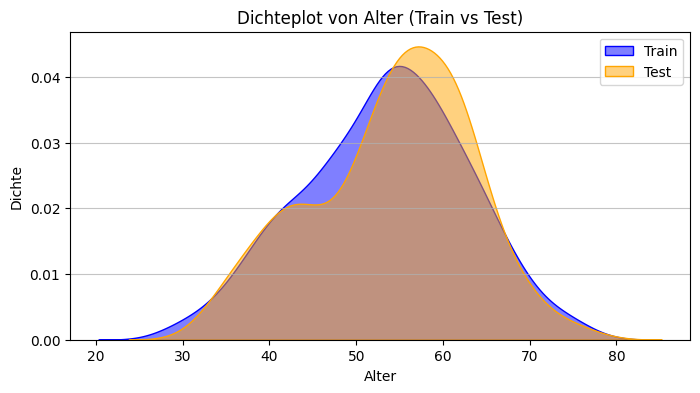

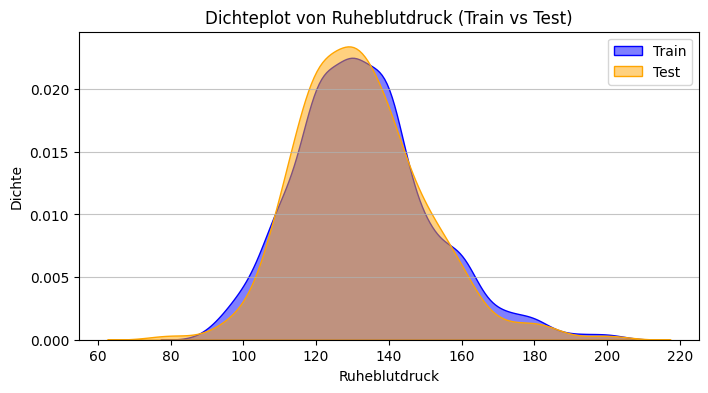

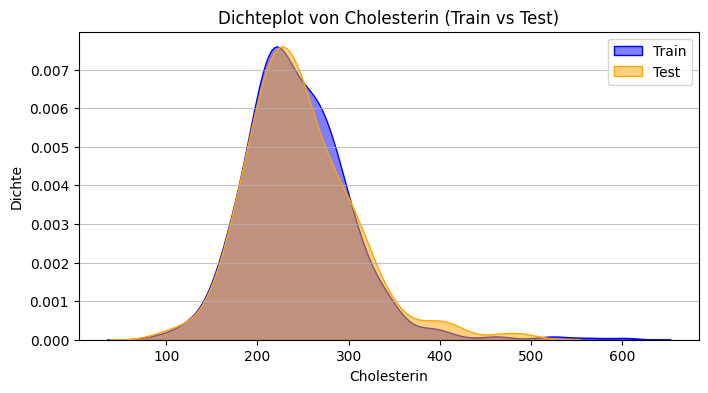

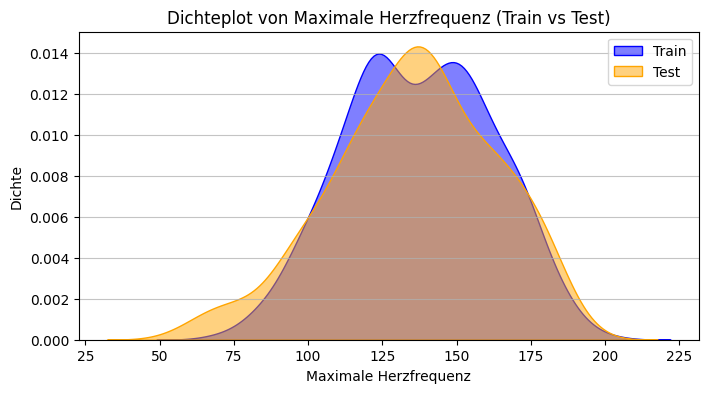

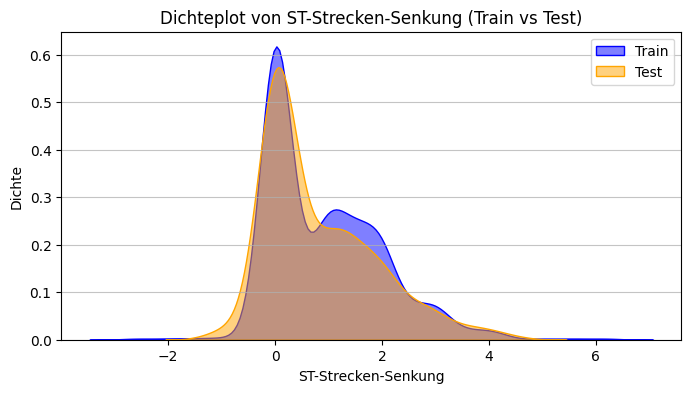

In [15]:
# Dichteplots um kontinuierliche Verteilungen zu vergleichen zwischen Train und Test
for col in continuous_cols:
    _ = plt.figure(figsize=(8, 4))
    _ = sns.kdeplot(
        train[col].dropna(),
        label="Train",
        color="blue",
        fill=True,
        alpha=0.5,
    )
    _ = sns.kdeplot(
        test[col].dropna(),
        label="Test",
        color="orange",
        fill=True,
        alpha=0.5,
    )
    _ = plt.title(f"Dichteplot von {col} (Train vs Test)")
    _ = plt.xlabel(col)
    _ = plt.ylabel("Dichte")
    _ = plt.legend()
    plt.grid(axis="y", alpha=0.75)
    plt.show()

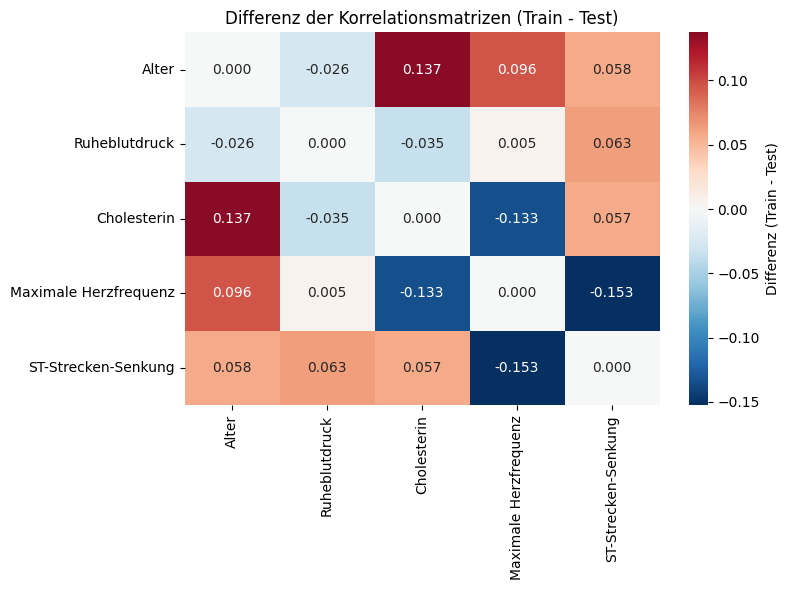

Maximale absolute Differenz in Korrelationen: 0.1527


In [16]:
# Korrelationsmatrizen für Train und Test berechnen
corr_train = train[continuous_cols].corr()
corr_test = test[continuous_cols].corr()

# Differenz zwischen Train und Test Korrelation berechnen
corr_diff = corr_train - corr_test

_ = plt.figure(figsize=(8, 6))
_ = sns.heatmap(
    corr_diff,
    annot=True,
    cmap="RdBu_r",
    fmt=".3f",
    center=0,
    cbar_kws={"label": "Differenz (Train - Test)"},
)
_ = plt.title("Differenz der Korrelationsmatrizen (Train - Test)")
plt.tight_layout()
plt.show()

# Maximale absolute Differenz ausgeben
max_diff = np.abs(corr_diff.values).max()
print(f"Maximale absolute Differenz in Korrelationen: {max_diff:.4f}")

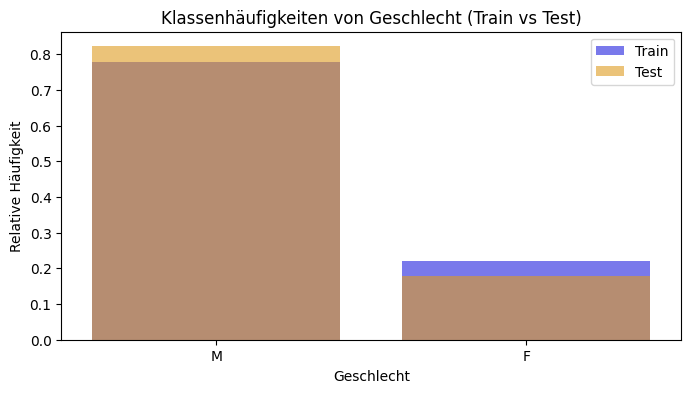

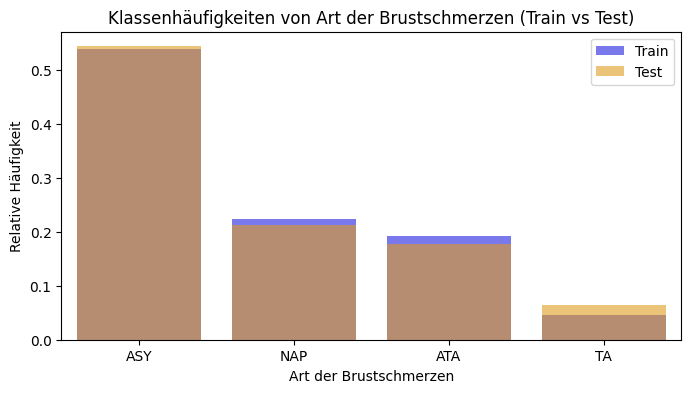

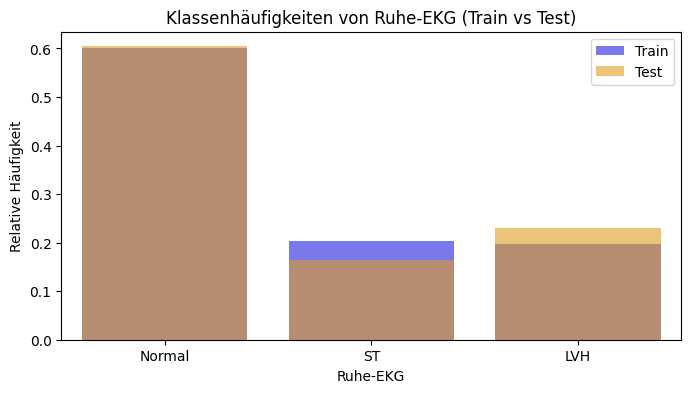

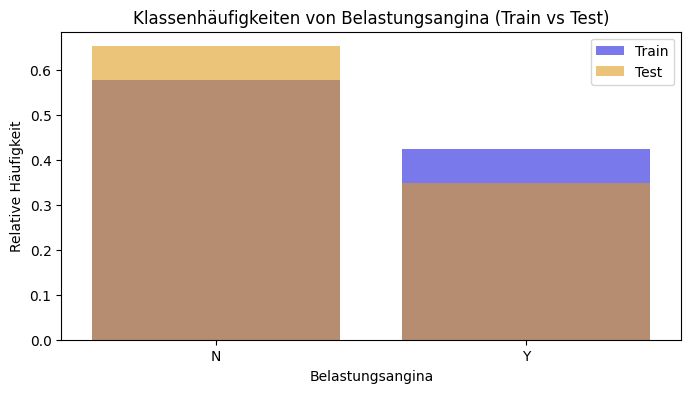

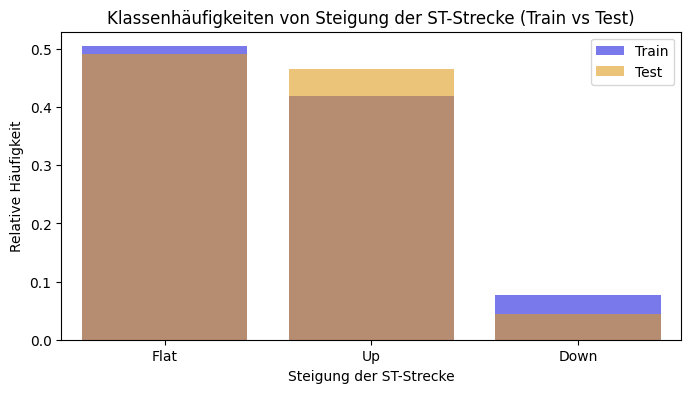

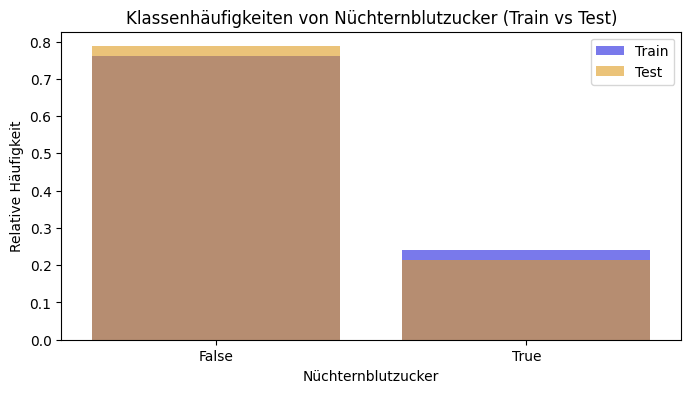

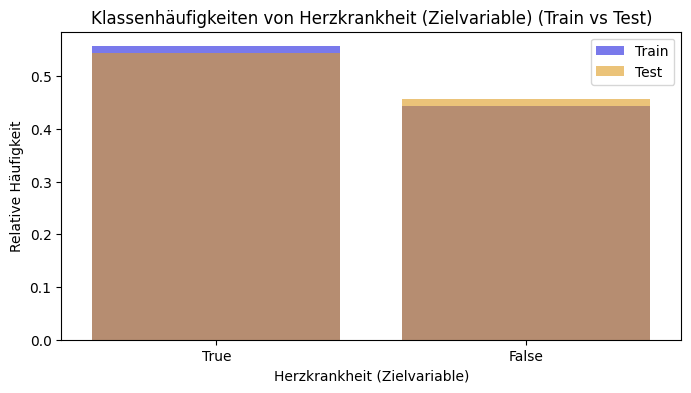

In [17]:
# Erstelle mir eine Klassenhäufigkeiten Barplot für alle kategorialen Variablen in Train und Test
for col in categorical_cols:
    _ = plt.figure(figsize=(8, 4))
    # Train
    train_counts = train[col].value_counts(normalize=True, dropna=False)
    _ = sns.barplot(
        x=train_counts.index.astype(str),
        y=train_counts.values,
        color="blue",
        alpha=0.6,
        label="Train",
    )
    # Test
    test_counts = test[col].value_counts(normalize=True, dropna=False)
    _ = sns.barplot(
        x=test_counts.index.astype(str),
        y=test_counts.values,
        color="orange",
        alpha=0.6,
        label="Test",
    )
    _ = plt.title(f"Klassenhäufigkeiten von {col} (Train vs Test)")
    _ = plt.xlabel(col)
    _ = plt.ylabel("Relative Häufigkeit")

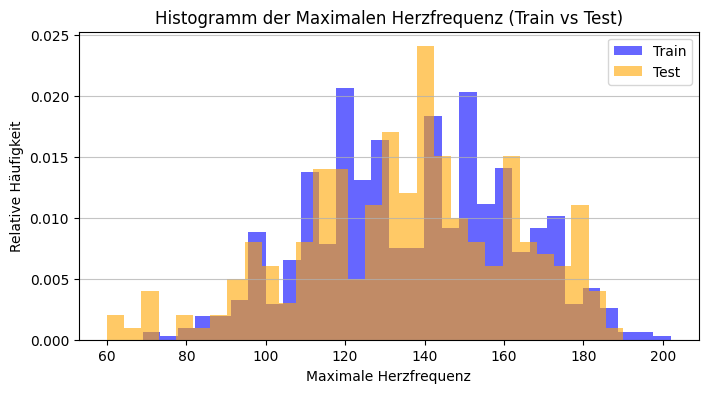

In [18]:
# Histogramm von Maximale Herzfrequenz der relativen Häufigkeiten (Train | Test übereinander)
_ = plt.figure(figsize=(8, 4))
# Train
_counts_train, _bins_train, _patches_train = plt.hist(
    train["Maximale Herzfrequenz"].dropna(),
    bins=30,
    color="blue",
    alpha=0.6,
    label="Train",
    density=True,
)
# Test
_counts_test, _bins_test, _patches_test = plt.hist(
    test["Maximale Herzfrequenz"].dropna(),
    bins=30,
    color="orange",
    alpha=0.6,
    label="Test",
    density=True,
)
_ = plt.title("Histogramm der Maximalen Herzfrequenz (Train vs Test)")
_ = plt.xlabel("Maximale Herzfrequenz")
_ = plt.ylabel("Relative Häufigkeit")
_ = plt.legend()
plt.grid(axis="y", alpha=0.75)
plt.show()

## Positive Aspekte (Gut übereinstimmende Verteilungen)

### Kontinuierliche Variablen
- **Ruheblutdruck**: Die Verteilungen sind nahezu identisch – ein ideales Szenario für die Evaluation
- **Cholesterin**: Beide Datensätze zeigen die charakteristische bimodale Verteilung mit sehr guter Übereinstimmung
- **ST-Strecken-Senkung**: Die Verteilungen stimmen gut überein, trotz der komplexen multimodalen Struktur
- **Alter**: Leichte Verschiebung zu höheren Altersgruppen im Test-Set, aber insgesamt akzeptabel

### Kategoriale Variablen
- **Geschlecht**: Nahezu identische Verteilung (~80% männlich, ~20% weiblich)
- **Art der Brustschmerzen**: ASY-Typ dominiert in beiden Sets ähnlich stark
- **Nüchternblutzucker**: Fast perfekte Übereinstimmung
- **Ruhe-EKG**: "Normal" dominiert in beiden Sets ähnlich

### Zielvariable (kritisch!)
- **Herzkrankheit**: Die Klassenverteilung ist in Train und Test nahezu identisch (~55% krank, ~45% gesund)
- Dies ist besonders wichtig, da eine ausgeglichene Zielverteilung eine faire Evaluation ermöglicht

## Problematische Unterschiede

### 1. Maximale Herzfrequenz (signifikant)
- **Train**: Zeigt zwei ausgeprägte Modi bei ~125 und ~150 bpm
- **Test**: Zeigt nur einen dominanten Peak bei ~137 bpm. 
- **Implikation**: Patienten mit höherer Belastbarkeit (höhere max. Herzfrequenz) sind im Test-Set unterrepräsentiert. Dies könnte die Modellleistung bei dieser Subgruppe verzerren.

### 2. Belastungsangina
- **Train**: ~58% ohne Belastungsangina (N), ~42% mit (Y)
- **Test**: ~65% ohne (N), ~35% mit (Y)
- **Implikation**: Der Test-Set hat einen höheren Anteil von Patienten mit Belastungsangina. Dies könnte zu einer Überschätzung der Modellleistung führen, wenn Belastungsangina ein starker Prädiktor ist.

### 3. Steigung der ST-Strecke (moderat)
- Test-Set hat einen höheren Anteil "Up" (~47% vs. ~41%) und weniger "Flat" (~49% vs. ~50%)
- Dieser Unterschied ist kleiner, aber könnte dennoch relevant sein

### 4. Ruhe-EKG (gering)
- Leicht mehr "LVH" (linksventrikuläre Hypertrophie) im Test-Set
- Dieser Unterschied ist minimal und wahrscheinlich vernachlässigbar

## Korrelationsstruktur

Die **Differenz der Korrelationsmatrizen** zeigt insgesamt kleine Abweichungen:
- Die meisten Differenzen liegen unter 0.1, was als akzeptabel gilt
- Die größte Differenz beträgt ~0.15 (zwischen Maximaler Herzfrequenz und ST-Strecken-Senkung)
- Dies deutet darauf hin, dass die grundlegenden Beziehungen zwischen Features in beiden Sets ähnlich sind

## Empfehlungen

1. **Die Testdaten sind grundsätzlich verwendbar**, da die Zielvariable und die meisten Features gut übereinstimmen
2. **Vorsicht bei der Interpretation**: Die Modellleistung könnte für bestimmte Subgruppen (hohe Herzfrequenz, ohne Belastungsangina) über- oder unterschätzt werden


## Fazit

Die Testdaten sind **bedingt geeignet** für die Modellevaluation. Während die meisten Merkmale und insbesondere die Zielvariable gut repräsentiert sind, zeigen sich bei der maximalen Herzfrequenz und der Belastungsangina relevante Verteilungsunterschiede. Die Evaluation sollte daher mit **Bewusstsein für diese Limitationen** interpretiert werden. Eine zusätzliche stratifizierte Analyse und ggf. Cross-Validation würden die Robustheit der Ergebnisse erhöhen.

### Aufgabe 3 - Logistic Regression (5 Punkte)

Als Baseline-Modell zur Vorhersage unserer Zielvariable verwenden wir logistische Regression.  

Setze einen einfachen, sinnvoll regularisierten, rein linearen logistischen Regressionsansatz um. Optimiere für F1.  
Verwende dazu scikit-learn.  

Evaluiere das Modell auf dem Testdatensatz im Sinne von F1 und Accuracy und zeichne die Confusion Matrix.  

Diskutiere das Ergebnis.

### Vorbereitung der Cholesterin Imputation

Basierend auf diesem Beitrag wähle ich meine Imputationsmethode für die fehlenden Cholesterinwerte aus:  (Missing at Random) [A Comprehensive Guide to Data Imputation: Techniques, Strategies, and Best Practices](https://medium.com/@tarangds/a-comprehensive-guide-to-data-imputation-techniques-strategies-and-best-practices-152a10fee543)
- Die fehlenden Werte bei Cholesterin bestimme ich als MAR (Missing at Random)
- Es handelt sich um eine kontinuierliche Variable
- Es fehlen 18.6% der Werte im Trainingsdatensatz und 19.1% im Testdatensatz

Basierend auf diesem Artikel würde eine Multiple Imputation by Chained Equations (MICE) oder KNN-Imputation in Frage kommen. Jedoch ist der Aufwand für MICE oder KNN-Imputation in diesem Fall zu hoch. Aus diesem Grund entscheide ich mich für eine Median-Imputation. Dafür analysiere ich die Verteilungen von Cholesterin mit den anderen Variablen, damit ich relevantestenen Einflussfaktoren für die Median-Imputation bestimmen kann.

Cholesterin                     1.000000
Ruheblutdruck                   0.124148
Maximale Herzfrequenz           0.079952
Nüchternblutzucker              0.043400
ST-Strecken-Senkung             0.015857
Herzkrankheit (Zielvariable)   -0.015569
Alter                          -0.046149
Name: Cholesterin, dtype: float64

Median Cholesterin nach Geschlecht:
Geschlecht
F    244.0
M    234.0
Name: Cholesterin, dtype: float64

Median Cholesterin nach Art der Brustschmerzen:
Art der Brustschmerzen
ASY    246.0
ATA    236.5
NAP    228.0
TA     233.0
Name: Cholesterin, dtype: float64

Median Cholesterin nach Ruhe-EKG:
Ruhe-EKG
LVH       256.0
Normal    233.0
ST        223.0
Name: Cholesterin, dtype: float64

Median Cholesterin nach Belastungsangina:
Belastungsangina
N    232.0
Y    246.0
Name: Cholesterin, dtype: float64

Median Cholesterin nach Steigung der ST-Strecke:
Steigung der ST-Strecke
Down    240.0
Flat    244.5
Up      230.0
Name: Cholesterin, dtype: float64

Median Cholesterin nach 

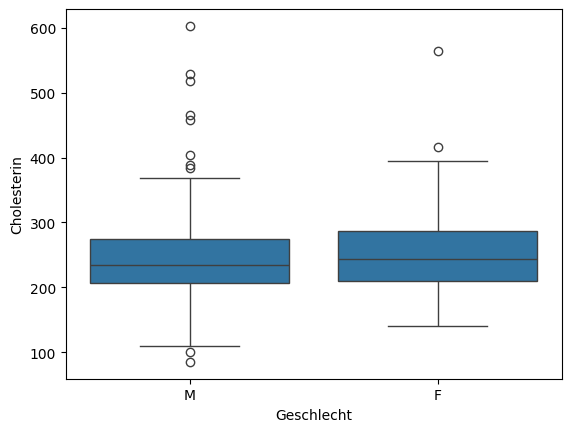

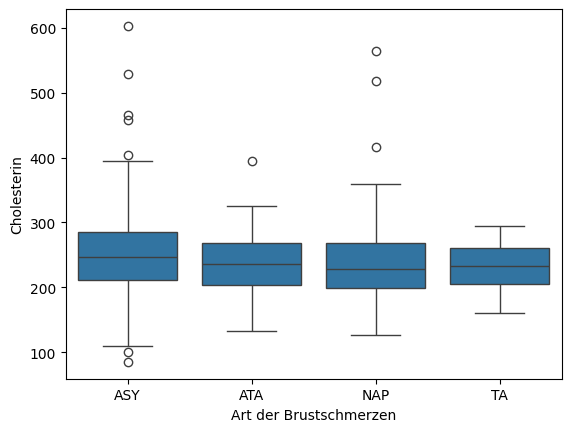

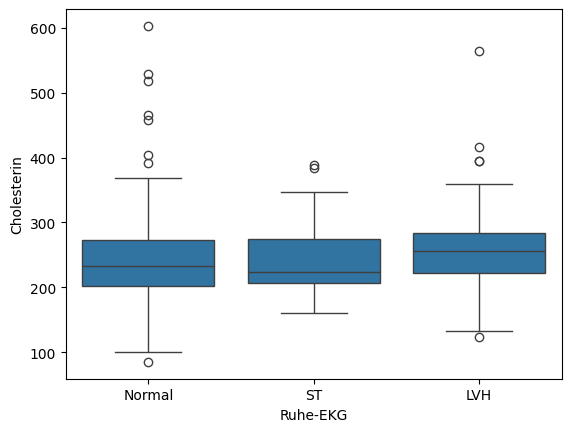

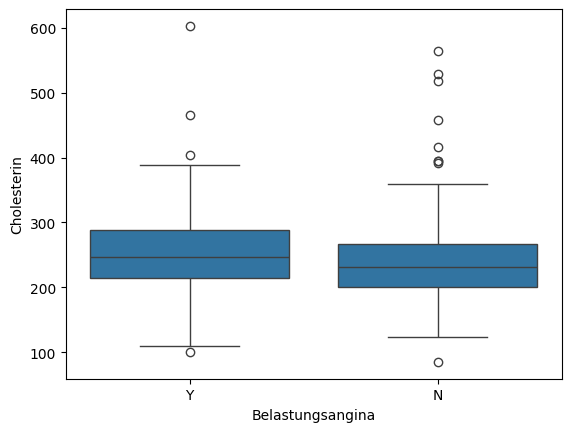

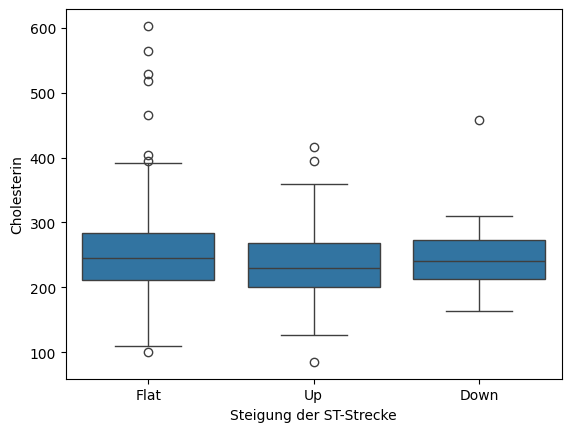

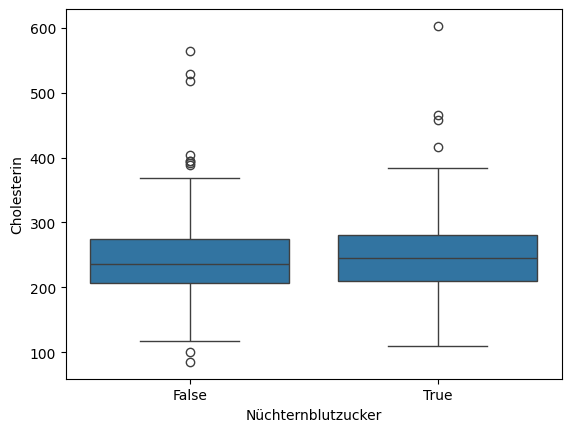

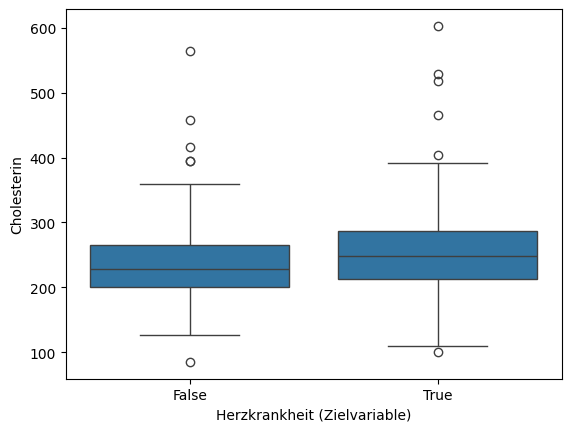

In [19]:
# Korrelation von Cholesterin mit anderen numerischen Variablen
df_corr = df.corr(numeric_only=True)
chol_corr = df_corr["Cholesterin"].sort_values(ascending=False)
print(chol_corr)

# Median Cholesterin für jede Kategorie in den kategorialen Variablen
for col in categorical_cols:
    print(80 * "=")
    print(f"\nMedian Cholesterin nach {col}:")
    print(train.groupby(col)["Cholesterin"].median())


for col in categorical_cols:
    _ = sns.boxplot(x=col, y="Cholesterin", data=train)
    plt.show()

Die NaN Werte bei Cholesterin werden gruppiert nach Ruhe-EKG und Art der Brustschmerzen, da diese Merkmale die Cholesterinwerte maximal beeinflussen könnten. Innerhalb dieser Gruppen wird der Medianwert berechnet und zur Imputation verwendet.

In [20]:
# Gruppengrössen für die Imputation analysieren
train[train["Cholesterin"] > 0].groupby(["Ruhe-EKG", "Art der Brustschmerzen"]).size()

test[test["Cholesterin"] > 0].groupby(["Ruhe-EKG", "Art der Brustschmerzen"]).size()

Ruhe-EKG  Art der Brustschmerzen
LVH       ASY                        68
          ATA                        18
          NAP                        27
          TA                         12
Normal    ASY                       150
          ATA                        92
          NAP                        82
          TA                          9
ST        ASY                        58
          ATA                        18
          NAP                        20
          TA                          6
dtype: int64

Ruhe-EKG  Art der Brustschmerzen
LVH       ASY                       28
          ATA                        5
          NAP                       16
          TA                         2
Normal    ASY                       51
          ATA                       27
          NAP                       23
          TA                        11
ST        ASY                       15
          ATA                        6
          NAP                        1
          TA                         1
dtype: int64

Da es Gruppen geben kann, die eine kleine Anzahl von Beobachtungen haben, entwickle ich eine Fallback-Strategie. 

1. Median pro Gruppe (Ruhe-EKG, Art der Brustschmerzen), insofern die Gruppe mindestens 15 Beobachtungen hat.
2. Median pro Gruppe (Ruhe-EKG), insofern die Gruppe mindestens 15 Beobachtungen hat.
3. Globaler Median des Cholesterinwerts.

In [21]:
def impute_cholesterin(df, N=15):
    """
    1. Fügt einem DataFrame eine neue boolische Zeile hinzu namens 'imputed_cholesterin', die angibt, ob der Cholesterinwert imputiert wurde.
    2. Führt die Imputation Strategie durch:
       1. Median pro Gruppe (Ruhe-EKG, Art der Brustschmerzen), insofern die Gruppe mindestens N Beobachtungen hat.
       2. Median pro Gruppe (Ruhe-EKG), insofern die Gruppe mindestens N Beobachtungen hat.
       3. Globaler Median des Cholesterinwerts.
    """
    # Erstelle Indikator für imputierte Werte
    df["imputed_cholesterin"] = df["Cholesterin"].isna()

    # Berechne globalen Median (nur von nicht-NaN Werten)
    global_median = df[df["Cholesterin"].notna()]["Cholesterin"].median()

    # Berechne Median pro Gruppe (Ruhe-EKG, Art der Brustschmerzen)
    group_median_double = (
        df[df["Cholesterin"].notna()]
        .groupby(["Ruhe-EKG", "Art der Brustschmerzen"])["Cholesterin"]
        .median()
    )

    # Berechne Median pro Gruppe (Ruhe-EKG)
    group_median_single = (
        df[df["Cholesterin"].notna()].groupby("Ruhe-EKG")["Cholesterin"].median()
    )

    # Berechne Gruppengrössen für (Ruhe-EKG, Art der Brustschmerzen)
    group_sizes_double = (
        df[df["Cholesterin"].notna()]
        .groupby(["Ruhe-EKG", "Art der Brustschmerzen"])
        .size()
    )

    # Berechne Gruppengrössen für (Ruhe-EKG)
    group_sizes_single = df[df["Cholesterin"].notna()].groupby("Ruhe-EKG").size()

    # Imputation durchführen
    for idx in df[df["Cholesterin"].isna()].index:
        ruhe_ekg = df.loc[idx, "Ruhe-EKG"]
        brustschmerzen = df.loc[idx, "Art der Brustschmerzen"]

        # Strategie 1: Median pro (Ruhe-EKG, Art der Brustschmerzen)
        if (ruhe_ekg, brustschmerzen) in group_sizes_double.index:
            if group_sizes_double[(ruhe_ekg, brustschmerzen)] >= N:
                df.loc[idx, "Cholesterin"] = group_median_double[
                    (ruhe_ekg, brustschmerzen)
                ]
                continue

        # Strategie 2: Median pro Ruhe-EKG
        if ruhe_ekg in group_sizes_single.index:
            if group_sizes_single[ruhe_ekg] >= N:
                df.loc[idx, "Cholesterin"] = group_median_single[ruhe_ekg]
                continue

        # Strategie 3: Globaler Median
        df.loc[idx, "Cholesterin"] = global_median

    return df

In [22]:
# Imputation durchführen
train = impute_cholesterin(train)
test = impute_cholesterin(test)

# NaN bei Ruheblutdruck löschen im Testset (nur eine Beobachtung)
test = test.dropna(subset=["Ruheblutdruck"])

### Logistic Regression Model

TRAINING MIT 5-FOLD CROSS-VALIDATION
Getestete C-Parameter: [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Anzahl Kombinationen: 10
Gesamte Trainingsläufe: 50


/Users/lucamanna/Documents/00_Coding/fhnw/05_MachineLearning/gml/gml/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/lucamanna/Documents/00_Coding/fhnw/05_MachineLearning/gml/gml/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/lucamanna/Documents/00_Coding/fhnw/05_MachineLearning/gml/gml/venv/lib/python3.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Alter',
                                                                          'Ruheblutdruck',
                                                                          'Cholesterin',
                                                                          'Maximale '
                                                                          'Herzfrequenz',
                                                                          'ST-Strecken-Senkung']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_ou...
                                                                          'Nüchternblutzucker'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           penalty='l2',
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'classifier__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             return_train_score=True, scoring='f1')

CROSS-VALIDATION ERGEBNISSE
Bester C-Parameter: 0.3593813663804626
Bester F1-Score (CV): 0.8803

Detaillierte 5-Fold CV Ergebnisse:
 C-Parameter  Mean F1 (Test)  Std F1 (Test)  Mean F1 (Train)  Std F1 (Train)
    0.000100        0.827300       0.045001         0.828631        0.009373
    0.000774        0.829260       0.039652         0.831292        0.009127
    0.005995        0.844308       0.034140         0.847629        0.009690
    0.046416        0.865990       0.023744         0.870296        0.007772
    0.359381        0.880324       0.035958         0.889017        0.006787
    2.782559        0.877137       0.040546         0.888104        0.006684
   21.544347        0.877511       0.037069         0.888243        0.007331
  166.810054        0.877511       0.037069         0.888243        0.007331
 1291.549665        0.877511       0.037069         0.888243        0.007331
10000.000000        0.877511       0.037069         0.888243        0.007331


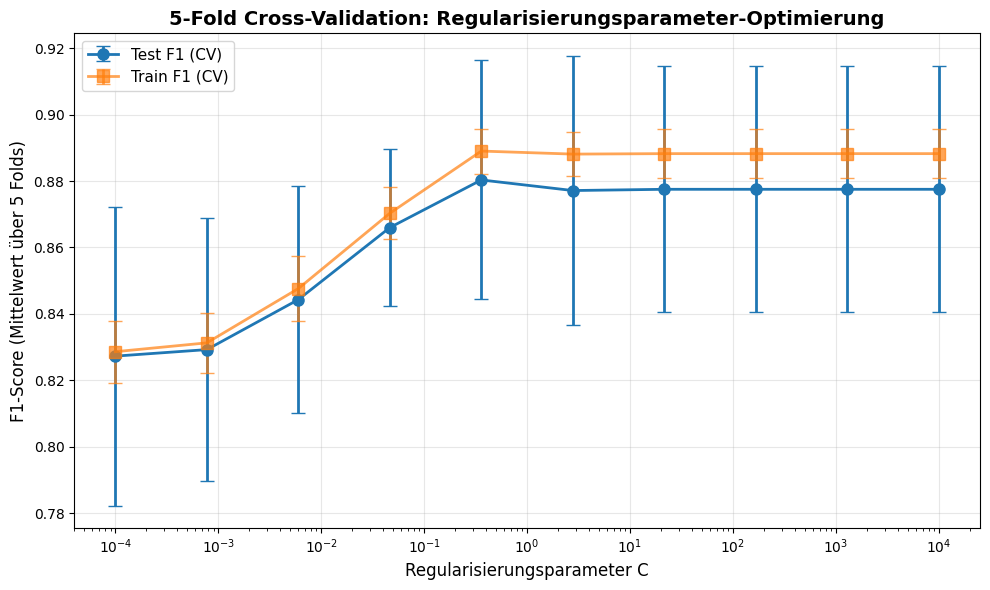

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# ============================================
# 1. DATEN VORBEREITEN
# ============================================

# Zielvariable definieren
target_col = "Herzkrankheit (Zielvariable)"

# Features und Zielvariable trennen
X_train = train.drop(columns=[target_col])
y_train = train[target_col]

X_test = test.drop(columns=[target_col])
y_test = test[target_col]

# Zielvariable aus ALLEN Feature-Listen entfernen
continuous_features = [col for col in continuous_cols if col != target_col]
categorical_features = [col for col in categorical_cols if col != target_col]
binary_features = [col for col in binary_cols if col != target_col]

# ============================================
# 2. PREPROCESSING PIPELINE
# ============================================

# Preprocessing für verschiedene Feature-Typen
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), continuous_features),
        (
            "cat",
            OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"),
            categorical_features,
        ),
    ],
    remainder="passthrough",  # Falls es Features gibt, die weder num noch cat sind
)

# ============================================
# 3. K-FOLD CROSS-VALIDATION SETUP
# ============================================

# Anzahl der Folds definieren
k_folds = 5  # Kann angepasst werden (typisch: 5 oder 10)

# StratifiedKFold für balancierte Klassenverteilung in jedem Fold
cv_strategy = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# ============================================
# 4. LOGISTISCHE REGRESSION MIT HYPERPARAMETER-TUNING
# ============================================

# Pipeline erstellen
pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "classifier",
            LogisticRegression(
                penalty="l2",  # L2-Regularisierung
                solver="liblinear",  # Coordinate Descent
                max_iter=1000,  # Maximale Iterationen
                random_state=42,
            ),
        ),
    ]
)

# Hyperparameter-Grid für C (inverse Regularisierungsstärke)
# Kleinere C = stärkere Regularisierung
param_grid = {"classifier__C": np.logspace(-4, 4, 10)}

# GridSearchCV mit k-Fold CV und F1-Score als Optimierungsmetrik
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv_strategy,  # Verwende stratified K-Fold Cross-Validation
    scoring="f1",  # Optimierung auf F1-Score
    return_train_score=True,  # Auch Training Scores zurückgeben
)

print("=" * 80)
print(f"TRAINING MIT {k_folds}-FOLD CROSS-VALIDATION")
print("=" * 80)
print(f"Getestete C-Parameter: {param_grid['classifier__C']}")
print(f"Anzahl Kombinationen: {len(param_grid['classifier__C'])}")
print(f"Gesamte Trainingsläufe: {len(param_grid['classifier__C']) * k_folds}")

# Training
grid_search.fit(X_train, y_train)

# Beste Parameter ausgeben
print("=" * 80)
print("CROSS-VALIDATION ERGEBNISSE")
print("=" * 80)
print(f"Bester C-Parameter: {grid_search.best_params_['classifier__C']}")
print(f"Bester F1-Score (CV): {grid_search.best_score_:.4f}")

# Detaillierte CV-Ergebnisse
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_summary = cv_results[
    [
        "param_classifier__C",
        "mean_test_score",
        "std_test_score",
        "mean_train_score",
        "std_train_score",
    ]
].copy()
cv_summary.columns = [
    "C-Parameter",
    "Mean F1 (Test)",
    "Std F1 (Test)",
    "Mean F1 (Train)",
    "Std F1 (Train)",
]

print(f"\nDetaillierte {k_folds}-Fold CV Ergebnisse:")
print(cv_summary.to_string(index=False))

# Visualisierung der CV-Ergebnisse
_ = plt.figure(figsize=(10, 6))
_ = plt.errorbar(
    cv_results["param_classifier__C"],
    cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
    marker="o",
    label="Test F1 (CV)",
    capsize=5,
    linewidth=2,
    markersize=8,
)
_ = plt.errorbar(
    cv_results["param_classifier__C"],
    cv_results["mean_train_score"],
    yerr=cv_results["std_train_score"],
    marker="s",
    label="Train F1 (CV)",
    capsize=5,
    linewidth=2,
    markersize=8,
    alpha=0.7,
)
_ = plt.xscale("log")
_ = plt.xlabel("Regularisierungsparameter C", fontsize=12)
_ = plt.ylabel(f"F1-Score (Mittelwert über {k_folds} Folds)", fontsize=12)
_ = plt.title(
    f"{k_folds}-Fold Cross-Validation: Regularisierungsparameter-Optimierung",
    fontsize=14,
    fontweight="bold",
)
_ = plt.legend(fontsize=11)
_ = plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
# ============================================
# 5. EVALUATION AUF TESTDATEN
# ============================================

print("\n" + "=" * 80)
print("EVALUATION AUF TESTDATEN")
print("=" * 80)

# Vorhersagen auf Testdaten
y_pred = grid_search.predict(X_test)

# Metriken berechnen
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nF1-Score (Test): {f1:.4f}")
print(f"Accuracy (Test): {accuracy:.4f}")
print(f"\nVergleich CV vs. Test:")
print(f"F1-Score (CV):   {grid_search.best_score_:.4f}")
print(f"F1-Score (Test): {f1:.4f}")
print(f"Differenz:       {abs(grid_search.best_score_ - f1):.4f}")


EVALUATION AUF TESTDATEN

F1-Score (Test): 0.9048
Accuracy (Test): 0.8952

Vergleich CV vs. Test:
F1-Score (CV):   0.8803
F1-Score (Test): 0.9048
Differenz:       0.0244


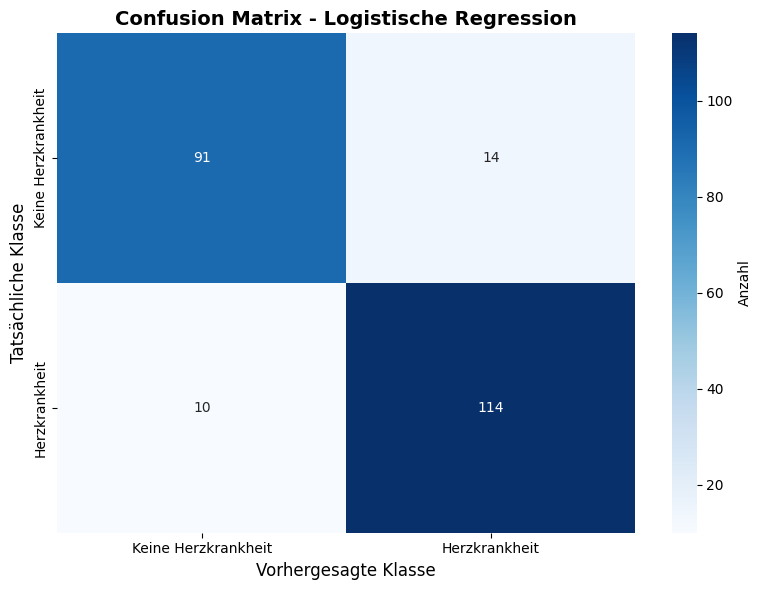

In [25]:
from sklearn.metrics import confusion_matrix

# ============================================
# 6. CONFUSION MATRIX VISUALISIERUNG
# ============================================

# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred)

# Visualisierung
_ = plt.figure(figsize=(8, 6))
_ = sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Keine Herzkrankheit", "Herzkrankheit"],
    yticklabels=["Keine Herzkrankheit", "Herzkrankheit"],
    cbar_kws={"label": "Anzahl"},
)
_ = plt.title(
    "Confusion Matrix - Logistische Regression", fontsize=14, fontweight="bold"
)
_ = plt.ylabel("Tatsächliche Klasse", fontsize=12)
_ = plt.xlabel("Vorhergesagte Klasse", fontsize=12)
plt.tight_layout()
plt.show()

## Implementation
- Die Features wurden mittels StandardScaler skaliert oder mittels One-Hot-Encoding für kategoriale Variablen transformiert.
- Es wurde 5-fache Cross-Validation verwendet, um die Hyperparameter zu optimieren.
  - Dabei wurde strategie "stratifiziert" verwendet, um die Klassenverteilung in den Folds beizubehalten.
- Es wurden 10 Parameterkombinationen für die Regularisierung (C-Wert) getestet welche sich in dem Berreich 10^-4 bis 10^4 befinden.
- Es wurde die F1-Metrik zur Optimierung verwendet.

## Ergebnisse

- Das erstellte Model erreicht einen F1-Score von 0.9048 auf dem Testdatensatz und einer Accuracy von 89.52%.
- Die minimale Differenz zwischen Cross-Validation (0.9048) und Testperformance (0.0244) deutet auf ein gut generalisierendes Modell hin.
- Der Regularisierungsparameter C wurde auf 0.359 optimiert, was auf eine moderate Regularisierung hinweist. Es soll jedoch gesagt werden, dass die Performance bei C-Werten zwischen 0.3593813663804626 und 1000 relativ stabil bleibt.
- Es werden 205 Observationen korrekt klassifiziert, während 24 falsch klassifiziert werden (10 False Positives, 14 False Negatives).

## Limitationen und Kritische Reflexionen

### Linearitätsannahme

Logistische Regression nimmt **lineare Beziehungen** zwischen Features und Log-Odds an. Medizinische Zusammenhänge sind jedoch oft **nicht-linear**:

- **Alter:** U-förmiger Zusammenhang möglich (sehr jung + sehr alt = höheres Risiko)
- **Cholesterin:** Möglicherweise Schwellenwert-Effekte
- **Interaktionen:** Z.B. Geschlecht × Alter (Risiko bei Männern steigt früher)

### Fehlende Interaktionsterme
Das aktuelle Modell erfasst keine Feature-Interaktionen:

- Geschlecht × Cholesterin: Cholesterin-Effekt könnte bei Männern stärker sein
- Alter × Belastungsangina: Symptome bei jüngeren Patienten alarmierender
- ST-Strecke × Brustschmerz-Typ: Kombinationseffekte

Diese könnten manuell hinzugefügt oder durch nicht-lineare Modelle automatisch gelernt werden.

### Multi-Layer Perceptron

Über die nächsten Aufgaben implementieren wir ein *Multi-Layer Perceptron*. Folgende Vorgaben sollen erfüllt werden:

- Das MLP soll ein _Multi-Class Classification_ Problem mit $k$ Klassen modellieren können.
- Vollständige Konfigurierbarkeit: Architektur (# layers / # units per layer), Regularisierung ($\lambda$), Learning Rate ($\eta$)
- Aktivierungsfunktion in Hidden-Layers soll $ReLU$ oder $Sigmoid$ sein können.
- Initialisiere die Gewichte zufällig mit kleinen Werten, z.B. aus dem Intervall $[-0.7, 0.7]$. 
- Reproduzierbarkeit: Setze _random seeds_ um die Initialisierung der Gewichte reproduzierbar zu machen [siehe numpy](https://numpy.org/doc/stable/reference/random/index.html#random-quick-start).
- Erstelle / ergänze die bereitgestellten Klassen. Du kannst auch neue Methoden oder Argumente hinzufügen.
- score() soll die Accuracy berechnen.
- Die Operationen müssen vektorisiert implementiert werden.
- Implementiere das Modell gemäss sklearn-API.


Es soll folgende Kostenfunktion $J$ minimiert werden (_negative log likelihood_ / _cross-entropy_ mit Regularisierung):

\begin{align}
J(\theta) &= \frac{1}{n}\sum_{i=1}^{n} \sum_{j=1}^{k} \Big(- y_j^{(i)} \log \hat{y}_j^{(i)} \Big) + C \\
C &= \frac{\lambda}{2} \sum_{l=1}^{L} \sum_{i=1}^{u^{(l-1)}} \sum_{j=1}^{u^{(l)}} (\mathbf{W}^{(l)}_{ij})^2
\end{align}

Im folgenden einige Hinweise:

#### Notation

- $n$: Anzahl Datenpunkte
- $L$: Anzahl Layer (ohne Input-Layer)
- $k$: Anzahl Klassen
- $p$: Anzahl Input Features
- $\lambda$: Regularisierungsfaktor
- $\mathbf{a}^{(l)}$ Aktivierungen im Layer $l$ (l=0 ist Input-Layer)
- $\mathbf{z}^{(l)}$ pre-activations / logits im Layer $l$
- $\mathbf{y}^{(i)} \in \{0, 1\}$: One-hot encoded Vektor mit Dimensionalität $\mathbb{R}^k$,  Eintrag 1 indiziert die Klassenzugehörigkeit
- $\hat{y}_k^{(i)}$ Prediction für Klasse $k$, $P(Y=k| x^{(i)})$ 
- $w^{(l)}_{ij}$: Gewicht / Parameter $ij$ von Layer $l$
- $W^{(l)}$ Parameter von Layer $l$ mit $\in \mathbb{R}^{u^{(l-1)} \times u^{(l)}}$
- $b^{(l)}$ Bias Term von Layer $l$ mit $\in \mathbb{R}^{u^{(l)}}$
- $u^{(l)}$: Anzahl Nodes (units) im Layer $l$
- $g()$: Aktivierungsfunktion

#### Struktur eines MLPs

Als Layer bezeichnet man die Kombination aus linearer Transformation und Aktivierungsfunktion: 
\begin{align}
\mathbf{a}^{(l)} &= g\big(\mathbf{a}^{(l-1)T}W^{(l)}  + b^{(l)}\big) 
\end{align}

Hidden-Layers sind dabei Layer die weder direkt mit Input noch Output verbunden sind. Als Input-Layer bezeichnet man die Daten selbst. Als Output-Layer bezeichnet man den letzten Layer.

![Neural Network](./nn.png)

#### Forward Pass

Als forward pass bezeichnet man das Prozessieren eines / mehrerer Datenpunkte vom Input zum Output.

Exemplarisch für einen Datenpunk $\mathbf{x}^{(i)}$.

\begin{align*}
\mathbf{a}^{(0)} &= \mathbf{x}^{(i)} \\
\mathbf{z}^{(1)} &= \mathbf{a}^{(0)T}W^{(1)} + b^{(1)T} \\
\mathbf{a}^{(1)} &= g(\mathbf{z}^{(1)})\\
.. &= .. \\
\mathbf{z}^{(l)} &= \mathbf{a}^{(l-1)T}W^{(l)}  + b^{(l)T} \\
\mathbf{a}^{(l)} &= g(\mathbf{z}^{(l)}) \\
.. &= .. \\
\mathbf{\hat{y}}_k^{(i)} &= a_k^{(L)} 
\end{align*}

Wobei:

\begin{align*}
g(\mathbf{z}^{(l)}) &=  \text{ReLU}(z^{(l)}) & \text{ReLU Aktivierungsfunktion für Hidden-Layers } (l \lt L)  \\
a_i^{(L)} &=  \text{softmax}(z^{(l)})  & \text{ Softmax-Funktion for } l = L
\end{align*}

#### Backpropagation

Backpropagation ist der zentrale Algorithmus beim Trainieren von neuronalen Netzwerken um die partiellen Ableitung der Loss-Funktion bezüglich der Parameter zu berechnen. Dabei wird der Gradient der Loss-Funktion $\nabla_{\theta} J$ vom Output des Netzwerkes mit Hilfe der Kettenregel zurückpropagiert. Sie sollten diesen Algorithmus anwenden um alle $\frac{\partial J}{\partial \mathbf{w_{ij}^{(l)}}}$ sowie $\frac{\partial J}{\partial \mathbf{b_{j}^{(l)}}}$ zu bestimmen. Folgende Zusammenhänge sind hilfreich bei der Implementation und zeigen die Situation bei $n=1$.

\begin{align*}
\frac{\partial \mathbf{a}^{(l)}}{\partial \mathbf{z}^{(l)}} &= \begin{cases}
1, & \text{where } \mathbf{z}^{(l)} \gt 0 \\
0, & \text{where } \mathbf{z}^{(l)} \leq 0
\end{cases} & \text{for } l \lt L \text{ if } g(x)=\text{ReLU}\\
\frac{\partial \mathbf{z}^{(l)}}{\partial \mathbf{a}^{(l-1)}} &= \mathbf{W}^{(l)} \\
\frac{\partial \mathbf{z}^{(l)}}{\partial \mathbf{w}^{(l)}} &= \mathbf{a}_i^{(l-1)}
\end{align*}


Man kann den Gradienten der Kostenfunktion bezüglich der Gewichte $W$ rekursiv bestimmen:

\begin{align*}
\frac{\partial J}{\partial \mathbf{z}^{(L)}} = \frac{\partial J}{\partial \mathbf{a}^{(L)}} &= \delta^{(L)} = \mathbf{\hat{y}} - \mathbf{y} & \text{initialize back-prop with this}\\
\frac{\partial J}{\partial \mathbf{a}^{(l-1)}}  = \delta^{(l-1)} &= \Big( \delta^{(l)} \odot \frac{\partial \mathbf{a}^{(l)}}{\partial \mathbf{z}^{(l)}} \Big) \Big(\frac{\partial \mathbf{z}^{(l)}}{\partial \mathbf{a}^{(l-1)}}\Big)^T & \text{for backpropagation}\\
\frac{\partial J}{\partial \mathbf{W}^{(l)}} &=  \big(\frac{\partial \mathbf{z}^{(l)}}{\partial W^{(l)}}\big)^T \big(\delta^{(l)} \odot \frac{\partial \mathbf{a}^{(l)}}{\partial \mathbf{z}^{(l)}}\big)  & \text{gradients for the weights, this is what we want!} \\
\frac{\partial J}{\partial \mathbf{b}^{(l)}} &=  \big(\delta^{(l)} \odot \frac{\partial \mathbf{a}^{(l)}}{\partial \mathbf{z}^{(l)}}\big)   & \text{gradients for the biases, this is what we want!}
\end{align*}


Die analytische Herleitung des Algorithmus sprengt den Rahmen hier. Wenn du aber mehr dazu lesen möchten, findest du eine gute Herleitung hier:

- [CS229 Stanford](https://cs229.stanford.edu/notes2020spring/cs229-notes-deep_learning.pdf)

Zum Thema Backpropagation gibt es ausserdem ausgezeichnete Videos:

- [3Blue1Brown Video 1](https://youtu.be/IHZwWFHWa-w)

- [3Blue1Brown Video 2](https://youtu.be/Ilg3gGewQ5U)



#### Vektorisierung

Wir können den Forward-Pass und die Backpropagation effizient berechnen, indem wir die Operationen vektorisieren. Wir berechnen die Aktivierungen direkt für alle $n$ Datenpunkte. Auch die Backpropagation lässt sich vektorisieren, wir berechnen dann **_den mittleren Gradienten_** über alle Datenpunkte. Ohne Vektorisierung wird ihre Implementation zu langsam sein. Hier der Ablauf für die Forward-Propagation:


\begin{align*}
\mathbf{X} & \in \mathbb{R}^{n \times p} \\
\mathbf{A}^{(l)} & \in \mathbb{R}^{n \times u_{l}} \\
\mathbf{W}^{(l)} & \in \mathbb{R}^{u_{l-1} \times u_{l}} \\
\mathbf{b}^{(l)} & \in \mathbb{R}^{u_{l} \times 1}
\end{align*}

Allgemein formuliert wäre das:

\begin{align*}
\mathbf{Z}^{(l-1)} &= \mathbf{A}^{(l-1)} \mathbf{W}^{(l)} + \mathbf{b}^{(l)T} \\
\mathbf{A}^{(l)} &= g( \mathbf{Z}^{(l-1)})
\end{align*}

Wobei $\mathbf{A}^{(0)} = \mathbf{X}$.


### Aufgabe 4 -  MLP Module (8 Punkte)
Als erstes implementierst du verschiedene Python-Klassen, die Komponenten / Module in unserem MLP repräsentieren. Diese Vorgehensweise ist angelehnt an _Deep Learning Frameworks_, wie z.B. `PyTorch`. Wie immer, werden wir danach einen `sklearn`-kompatiblen _Estimator_ implementieren.
Vervollständige die folgenden Klassen:

- ReluActivation
- SigmoidActivation
- LinearLayer
- Softmax

Die `forward()` Methode definiert jeweils die _Forward Propagation_ durch die entsprechende Operation.

Die `backward()` Methode definiert jeweils die _Backpropagation_ durch den entsprechenden Operation.


Die Ableitung der ReLU kannst folgendermassen implementieren:

\begin{equation}
\frac{d \text{ReLU}(x)}{d x} = \begin{cases}
1, & \text{if } x \gt 0 \\
0, & \text{if } x \leq 0
\end{cases}
\end{equation}

Die Funktionalität für SigmoidActivation recherchierst du selber.

Für Softmax gilt:

- `backward()`: soll den Gradienten der _negative loglikelihood_ Kostenfunktion $\frac{\partial J}{\partial \mathbf{z}^{(l)}} = \text{softmax}(\mathbf{z}^{(l)}) - \mathbf{y}$ ausgeben. Damit wird _backpropagation_ gestartet.
- Implementiere eine numerisch stabile Version von Softmax. Lese dazu folgenden Abschnitt: [Link](https://ogunlao.github.io/2020/04/26/you_dont_really_know_softmax.html#numerical-stability-of-softmax)


In [27]:
from typing import Union, Tuple

import numpy as np


class Module:
    """Defines a component of a Neural Network."""

    def __init__(self):
        pass

    def forward(self, x: np.ndarray) -> np.ndarray:
        """Forward Pass.

        Args:
            x: the input to the module in the forward pass

        Returns:
            The output of the module during the forward pass

        """
        raise NotImplementedError

    def backward(self, x: np.ndarray) -> np.ndarray:
        """Backpropagation.

        Args:
            x: the upstream gradient during backpropagation

        Returns:
            The gradient with respect to the inputs from the forward pass
        """
        raise NotImplementedError


class ReluActivation(Module):
    """ReLU Activation Function."""

    def forward(self, x: np.ndarray) -> np.ndarray:
        """Gibt x zurück insofern x > 0 oder wenn x<0 wird 0 zurückgegeben

        Args:
            x (np.ndarray): _description_

        Returns:
            np.ndarray: _description_
        """
        # Speichern für backward (nur Inputs notwendig)
        self.input = x

        return np.maximum(0, x)

    def backward(self, x: np.ndarray) -> np.ndarray:
        """Berechnet den Gradienten für ReLU Aktivierung

        Args:
            x (np.ndarray): Upstream Gradient

        Returns:
            np.ndarray: Gradient mit Respekt zu den Inputs
        """
        grad_input = np.where(self.input > 0, 1, 0)
        return x * grad_input


class SigmoidActivation(Module):
    """Sigmoid Activation Function."""

    def forward(self, x: np.ndarray) -> np.ndarray:
        """Berechnet die Sigmoid Aktivierung

        Args:
            x (np.ndarray): Input

        Returns:
            np.ndarray: Sigmoid Output
        """
        # Speichern für backward (nur Outputs notwendig)
        self.output = 1 / (1 + np.exp(-x))
        return self.output

    def backward(self, x: np.ndarray) -> np.ndarray:
        """Berechnet den Gradienten für Sigmoid Aktivierung

        Args:
            x (np.ndarray): Upstream Gradient

        Returns:
            np.ndarray: Gradient mit Respekt zu den Inputs
        """
        grad_input = self.output * (1 - self.output)
        return x * grad_input


class LinearLayer(Module):
    """Linear Layer."""

    def __init__(self, input_dim: int, output_dim: int, random_seed: int = 42):
        """
        Args:
            input_dim: Anzahl Input Features (u^(l-1))
            output_dim: Anzahl Output Features (u^(l))
            random_seed: Seed für Reproduzierbarkeit
        """
        # Initialize base Module class
        super().__init__()

        # Reproduzierbarkeit sicherstellen
        np.random.seed(random_seed)

        # Initialisiere Gewichte zufällig aus [-0.7, 0.7]
        self.weights_ = np.random.uniform(-0.7, 0.7, size=(input_dim, output_dim))

        # Initialisiere Bias mit Nullen
        self.biases_ = np.zeros(output_dim)

        # Platzhalter für Gradienten (werden in backward berechnet)
        self.grad_weights_ = None
        self.grad_biases_ = None

        # Platzhalter für gespeicherte Werte
        self.input = None

    def forward(self, x: np.ndarray) -> np.ndarray:
        """Forward Pass: Z = A · W + b

        Args:
            x: Input Matrix (n × input_dim)

        Returns:
            Output Matrix (n × output_dim)
        """
        # Speichern für backward
        self.input = x

        # Lineare Transformation durchführen
        return x @ self.weights_ + self.biases_

    def backward(self, upstream_grad: np.ndarray) -> np.ndarray:
        """Backpropagation durch den Linear Layer

        Args:
            upstream_grad: Gradient von der nächsten Schicht (n × output_dim)

        Returns:
            Gradient bzgl. Input (n × input_dim)
        """

        n = self.input.shape[0]  # Anzahl Datenpunkte

        # 1. Gradient bzgl. Gewichten: ∂J/∂W = A^T · ∂J/∂Z
        #    (input_dim × n) @ (n × output_dim) = (input_dim × output_dim)
        self.grad_weights_ = (self.input.T @ upstream_grad) / n

        # 2. Gradient bzgl. Bias: ∂J/∂b = Σ ∂J/∂Z (über alle Datenpunkte)
        #    Summiere über Dimension 0 (die n Datenpunkte)
        #    (n × output_dim) -> (output_dim,)
        self.grad_biases_ = np.sum(upstream_grad, axis=0) / n

        # 3. Gradient bzgl. Input (für weitere Backpropagation): ∂J/∂A = ∂J/∂Z · W^T
        #    (n × output_dim) @ (output_dim × input_dim) = (n × input_dim)
        grad_input = upstream_grad @ self.weights_.T

        return grad_input


class Softmax(Module):
    """Softmax Activation."""

    def __init__(self):
        """Initialisiere Softmax Layer"""
        super().__init__()
        self.output = None

    def forward(self, x: np.ndarray) -> np.ndarray:
        """Numerisch stabile Softmax Berechnung

        Args:
            x: Input Logits (n × k)
               n = Anzahl Datenpunkte
               k = Anzahl Klassen

        Returns:
            Softmax Wahrscheinlichkeiten (n × k)
            Jede Zeile summiert zu 1
        """

        # Numerisch stabile Softmax Berechnung: https://ogunlao.github.io/2020/04/26/you_dont_really_know_softmax.html#numerical-stability-of-softmax
        # subtrahiere Maximum pro Zeile
        max_x = np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x - max_x)
        sum_exp_x = np.sum(exp_x, axis=1, keepdims=True)
        self.output = exp_x / sum_exp_x
        return self.output

    def backward(self, y_true: np.ndarray) -> np.ndarray:
        """Berechnet Gradient für Softmax + Cross-Entropy Loss

        Args:
            y_true: One-hot encoded Labels (n × k)
                    z.B. [0, 1, 0] für Klasse 1

        Returns:
            Gradient ∂J/∂z = ŷ - y (n × k)
        """
        # Laut Aufgabe: ∂J/∂z^(L) = softmax(z^(L)) - y
        # Das ist der Gradient der negative log-likelihood
        return self.output - y_true

### Aufgabe 5 - Tests (4 Punkte)

Die folgende Zelle definiert einige Tests. Berechne jeweils die Outputs Ihrer Komponenten auf Basis der vorgegebenen Parameter und Inputs. Speichere die Outputs in den entsprechenden Variablen ab.

Du darfst grundsätzlich alles anpassen, damit die Tests für ihre Implementation durchgeführt werden können (z.B.  Biases in _Weights Matrix_ integriert oder andere Argumente / Outputs ihrer Methoden). Geprüft werden nur die folgenden Outputs / Variablen:

- `dense_layer_forward_actual`: $\mathbf{Z}^{(l)} \in \mathbb{R}^{n \times u_l}$
- `dense_layer_delta_actual`: $\delta^{(l-1)} \in \mathbb{R}^{n \times u_{(l-1)}}$
- `softmax_output_actual`: $\hat{\mathbf{Y}} \in \mathbb{R}^{n \times k}$
- `softmax_delta_actual`: $\delta^{(L)} \in \mathbb{R}^{n \times k}$


In [28]:
####################################
# Dense Layer - Test forward()
####################################

# Inputs and Layer Parameters
# (2 input neurons, 2 output neurons, 2 biases)
dense_layer_weights = np.array([[1, 2], [1, 2]]).reshape(2, 2)
dense_layer_biases = np.array([8, 2]).reshape(1, 2)
dense_layer_input_activations = np.array([[0, 8]]).reshape(1, 2)

# Adapt the following lines according to your implementation
dense = LinearLayer(input_dim=2, output_dim=2)
dense.weights_ = dense_layer_weights
dense.biases_ = dense_layer_biases
dense_layer_forward_actual = dense.forward(dense_layer_input_activations)

# the variable "dense_layer_forward_actual" will be tested - shape (n, num_output_neurons)


####################################
# Dense Layer - Test backward()
####################################

# Inputs and Layer Parameters
# (2 input neurons, 2 output neurons, 2 biases)

dense_layer_weights = np.array([[1, 2], [1, 2]]).reshape(2, 2)
dense_layer_biases = np.array([8, 2]).reshape(1, 2)
dense_layer_input_activations = np.array([[0, 8]]).reshape(1, 2)
dense_layer_delta_upstream = np.array([[0.12, -0.12]]).reshape(1, 2)

# Adapt the following lines according to your implementation
dense = LinearLayer(input_dim=2, output_dim=2)
dense.weights_ = dense_layer_weights
dense.biases_ = dense_layer_biases
x_output = dense.forward(dense_layer_input_activations)
dense_layer_delta_actual = dense.backward(dense_layer_delta_upstream)

# the variable "dense_layer_delta_actual" will be tested - shape (n, num_output_neurons)


####################################
# Softmax - Test forward()
####################################

# Inputs (n, num_classes)
softmax_input = np.array([[16, 18]]).reshape(1, 2)

# Adapt the following lines according to your implementation
softmax = Softmax()
softmax_output_actual = softmax.forward(softmax_input)

# the variable "softmax_output_actual" will be tested - shape (n, num_classes)


####################################
# Softmax - Test backward()
####################################

# Inputs (n, num_classes)
y_true = np.array([[0, 1]]).reshape(1, 2)
softmax_input = np.array([[16, 18]]).reshape(1, 2)

# Adapt the following lines according to your implementation
softmax = Softmax()
softmax_forward = softmax.forward(softmax_input)
softmax_delta_actual = softmax.backward(y_true)

# the variable "softmax_delta_actuall" will be tested - shape (n, num_classes)

# Passe die Tests an Ihre Implementierung an, falls nötig, ansonsten musst du
# nichts weiter hinzufügen
# YOUR CODE HERE

In [29]:
# TESTS - DO NOT CHANGE

import traceback

dense_layer_forward_expected = np.array([[16, 18]])
try:
    np.testing.assert_equal(dense_layer_forward_actual, dense_layer_forward_expected)
except AssertionError:
    print(f"Dense Forward Test Failed")
    traceback.print_exc()


dense_layer_delta_expected = np.array([[-0.12, -0.12]])
try:
    np.testing.assert_equal(dense_layer_delta_actual, dense_layer_delta_expected)
except AssertionError:
    print(f"Dense Backward Test Failed")
    traceback.print_exc()


softmax_output_expected = np.array([[0.12, 0.88]])

try:
    np.testing.assert_almost_equal(
        softmax_output_actual, softmax_output_expected, decimal=3
    )
except AssertionError:
    print(f"Softmax forward failed")
    traceback.print_exc()


softmax_delta_expected = np.array([[0.12, -0.12]])
try:
    np.testing.assert_almost_equal(
        softmax_delta_actual, softmax_delta_expected, decimal=3
    )
except AssertionError:
    print(f"Softmax backward failed")
    traceback.print_exc()

### Aufgabe 6 - MLPClassifier (8 Punkte)

Vervollständige die Klasse `MLPClassifier`. Benutze Objekte der Klassen `ReluActivation`, `SigmoidActivation`, `DenseLayer` und `Softmax` um das Netzwerk zu implementieren, sowie deren `forward()` und `backward()` Methoden für Forward Propagation und Backpropagation. Durch die Verwendung von `ClassifierMixin` musst du `score()` nicht selber implementieren.

In [30]:
import copy
from collections import defaultdict
from typing import Type


from sklearn.base import BaseEstimator, ClassifierMixin
from tqdm.notebook import tqdm

tqdm.monitor_interval = 0


class MLPClassifier(BaseEstimator, ClassifierMixin):
    """
    Multi-Layer Perceptron for Classification.

    Args:
    -----
        num_input_neurons: number of input neurons (number of features: p)
        num_hidden_neurons: list with the number of neurons in the hidden layers (l < L)
        num_output_neurons: number of neurons in the output layer (l=L)
        activation_function: the activation function in the hidden layers, a Module class
        lr: Learning Rate
        alpha: L2 Regularization strength (lambda)
        max_num_steps: maximum number of steps after which to terminate optimization
        theta_init_range: The interval on which the thetas will be randomly initialized
        batch_size: the number of observations to use for one step of gradient descent
        seed: random seed for reproducibility
        suppress_output: whether to suppress print / progress bar
    """

    def __init__(
        self,
        num_input_neurons: int,
        num_hidden_neurons: list[int],
        num_output_neurons: int,
        activation_function: Type[Module],
        lr: float = 0.01,
        alpha: float = 0.0,
        max_num_steps: int = 1000,
        theta_init_range: Tuple[float, float] = (-0.7, 0.7),
        batch_size: int | None = None,
        suppress_output: bool = True,
        seed: int = 123,
    ):
        self.num_input_neurons = num_input_neurons
        self.num_hidden_neurons = num_hidden_neurons
        self.num_output_neurons = num_output_neurons
        self.activation_function = activation_function
        self.lr = lr
        self.alpha = alpha
        self.max_num_steps = max_num_steps
        self.theta_init_range = theta_init_range
        self.batch_size = batch_size
        self.seed = seed
        self.suppress_output = suppress_output

        self.classes_ = [i for i in range(0, num_output_neurons)]

    def _initialize_network(self):
        """Initialize the network modules."""
        self.network_layers = []

        # Edge Case: Keine Hidden Layers
        if len(self.num_hidden_neurons) == 0:
            # Direktverbindung: Input -> Output
            self.network_layers.append(
                (
                    LinearLayer(
                        self.num_input_neurons, self.num_output_neurons, self.seed
                    ),
                    "Output Layer",
                )
            )
            self.network_layers.append((Softmax(), "Softmax"))
            return

        # Track current dimension
        current_dim = self.num_input_neurons

        # Hidden Layers: Iteriere über ALLE Einträge
        for i, num_neurons in enumerate(self.num_hidden_neurons):
            # Linear Layer
            self.network_layers.append(
                (
                    LinearLayer(current_dim, num_neurons, self.seed + i),
                    f"Hidden Layer {i+1}",
                )
            )
            # Activation
            self.network_layers.append(
                (self.activation_function(), f"Activation {i+1}")
            )
            # Update dimension für nächsten Layer
            current_dim = num_neurons

        # Output Layer
        self.network_layers.append(
            (
                LinearLayer(
                    current_dim,
                    self.num_output_neurons,
                    self.seed + len(self.num_hidden_neurons),
                ),
                "Output Layer",
            )
        )
        self.network_layers.append((Softmax(), "Softmax"))

    def fit(self, X: np.ndarray, y: np.ndarray, weights=None):
        """Fit Model Parameters.

        Args:
        -----
            X: (n, p)
            y: (n, )

        Returns:
        --------
            self

        """
        # ========================================
        # 1. Reproduzierbarkeit sicherstellen
        # ========================================
        np.random.seed(self.seed)

        # ========================================
        # 2. One-Hot Encoding der Labels
        # ========================================
        one_hot_encoder = OneHotEncoder(
            categories="auto", sparse_output=False, drop=None
        )
        y_arr = np.asarray(y).reshape(
            -1, 1
        )  # <-- sicher in ein numpy-array konvertieren
        y_arr = np.asarray(y).reshape(-1, 1)
        y_one_hot = one_hot_encoder.fit_transform(y_arr)

        # ========================================
        # 3. Batch Size bestimmen
        # ========================================
        n = X.shape[0]
        if self.batch_size is None:
            batch_size = n  # Full Batch Gradient Descent
        else:
            batch_size = min(self.batch_size, n)

        # ========================================
        # 4. Netzwerk initialisieren
        # ========================================
        self._initialize_network()

        # ========================================
        # 5. Loss History initialisieren
        # ========================================
        self.loss_history = []

        # ========================================
        # 6. Training Loop
        # ========================================
        step = 0
        epoch = 0

        # Progress Bar Setup
        if not self.suppress_output:
            pbar = tqdm(total=self.max_num_steps, desc="Training MLP")

        while step < self.max_num_steps:
            # Shuffle Daten zu Beginn jeder Epoche
            perm = np.random.permutation(n)
            X_shuffled = X[perm]
            y_shuffled = y_one_hot[perm]

            # Mini-Batch / Full-Batch Gradient Descent
            for start_idx in range(0, n, batch_size):
                # Stop wenn max_num_steps erreicht
                if step >= self.max_num_steps:
                    break

                end_idx = start_idx + batch_size
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]

                # ========================================
                # 6.1 Forward Pass
                # ========================================
                output = X_batch
                for layer, _ in self.network_layers:
                    output = layer.forward(output)

                # ========================================
                # 6.2 Loss berechnen (Könnte theoretisch auch ausserhalb der Schleife gemacht werden)
                # ========================================
                cost = self.calculate_cost(y_batch, output)
                self.loss_history.append(cost)

                # ========================================
                # 6.3 Backward Pass
                # ========================================
                # Initialisiere Backpropagation mit Softmax Gradient
                upstream_grad = self.network_layers[-1][0].backward(y_batch)

                # Rückwärts durch alle Layer
                for layer, _ in reversed(self.network_layers[:-1]):
                    upstream_grad = layer.backward(upstream_grad)

                # ========================================
                # 6.4 Parameter Update mit L2 Regularisierung
                # ========================================
                for layer, _ in self.network_layers:
                    if isinstance(layer, LinearLayer):
                        # Gewichte mit L2 Regularisierung updaten
                        layer.weights_ -= self.lr * (
                            layer.grad_weights_ + self.alpha * layer.weights_
                        )
                        # Biases updaten
                        layer.biases_ -= self.lr * layer.grad_biases_

                # ========================================
                # 6.5 Progress Step erhöhen
                # ========================================
                step += 1

                if not self.suppress_output:
                    pbar.update(1)
                    pbar.set_postfix({"Loss": f"{cost:.4f}", "Epoch": epoch})

            epoch += 1

            # Schließe Progress Bar
        if not self.suppress_output:
            pbar.close()

        return self

    def calculate_cost(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """Calculate Negative Log Likelihood costs.

        Args:
        -----
            y_true: (n, k)
            y_pred: (n, k)

        Returns:
        --------
            total cost

        """
        n = y_true.shape[0]

        # ========================================
        # 1. Negative Log Likelihood Loss
        # ========================================
        # Epsilon für numerische Stabilität (verhindert log(0))
        epsilon = 1e-15
        log_likelihood = -np.sum(y_true * np.log(y_pred + epsilon)) / n

        # ========================================
        # 2. L2 Regularization Term
        # ========================================
        l2_term = 0.0
        for layer, _ in self.network_layers:
            if isinstance(layer, LinearLayer):
                l2_term += np.sum(layer.weights_**2)

        l2_term *= self.alpha / 2

        # ========================================
        # 3. Total Cost
        # ========================================
        total_cost = log_likelihood + l2_term

        return total_cost

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """All class probabilities per sample.

        Args:
        -----
            X: (n, p)

        Returns:
        --------
            (n, k)
        """
        for layer, _ in self.network_layers:
            X = layer.forward(X)
        return X

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Return most likely class per sample

        Args:
        -----
            X: (n, p)

        Returns:
        --------
            (n, )
        """
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

### Aufgabe 7 - Entwicklungsdatensatz (8 Punkte)

Zeige anhand des kleinen Entwicklungsdatensatzes (`dev_data.csv`), dass deine Implementierung funktioniert, indem du die Output-Variable $y \in \{0, 1, 2\}$ anhand der Input-Variablen $\mathbf{x} = \left(x_1, x_2\right)$ vorhersagen können.  
Erzeuge dazu ein Netzwerk mit 2 Hidden Layern mit 30 und 20 Units/Nodes und optimiere die Modell-Koeffizienten, bis der Wert der Kostenfunktion sichtbar stagniert. 

Berechne und printe für das trainierte Modell:

- die Accuracy auf dem Datensatz mit `score()`
- den Wert der Kostenfunktion mit `calculate_cost()`
- die Wahrscheinlichkeiten für alle Klassen für die **ersten 10 Beobachtungen** mit `predict_proba()`
- die Vorhersage für die **ersten 10 Beobachtungen** mit `predict()`

Zeichne:

- die Entwicklung der Kostenfunktion über das Gradient Descent Verfahren hinweg (Learning Curve)
- die Confusion Matrix

Du darfst `sklearn.metrics.confusion_matrix` und `sklearn.metrics.ConfusionMatrixDisplay` verwenden.

DATENSATZ INFORMATIONEN
Training Samples: 1600
Test Samples: 1600
Features: 2
Klassen: [0 1 2]

MODELL TRAINING


/Users/lucamanna/Documents/00_Coding/fhnw/05_MachineLearning/gml/gml/venv/lib/python3.11/site-packages/sklearn/externals/_numpydoc/docscrape.py:420: UserWarning: Unknown section Args:
  self[section] = content


MLPClassifier(activation_function=<class '__main__.ReluActivation'>,
              alpha=0.0001, batch_size=256, lr=0.1, max_num_steps=5000,
              num_hidden_neurons=[30, 20], num_input_neurons=2,
              num_output_neurons=3, seed=42)


MODELL EVALUATION
Accuracy auf Testdaten: 0.8712
Wert der Kostenfunktion: 0.302066

--------------------------------------------------------------------------------
ERSTE 10 BEOBACHTUNGEN
--------------------------------------------------------------------------------

Wahrscheinlichkeiten (predict_proba):
Klasse 1:0.4291344907268516	 Klasse 2:0.00048461534815349896	 Klasse 3:0.4291344907268516
Klasse 1:2.2491284004896294e-06	 Klasse 2:0.9999975499138694	 Klasse 3:2.2491284004896294e-06
Klasse 1:0.0034957194125234295	 Klasse 2:0.9964123429303832	 Klasse 3:0.0034957194125234295
Klasse 1:0.07505130266611486	 Klasse 2:0.9195032885619449	 Klasse 3:0.07505130266611486
Klasse 1:0.0011252059319466934	 Klasse 2:1.7219083410610466e-05	 Klasse 3:0.0011252059319466934
Klasse 1:0.057600497703594676	 Klasse 2:0.0002682174712217347	 Klasse 3:0.057600497703594676
Klasse 1:0.5943843736648835	 Klasse 2:0.012185773818987595	 Klasse 3:0.5943843736648835
Klasse 1:0.5215802048745082	 Klasse 2:0.0006646472

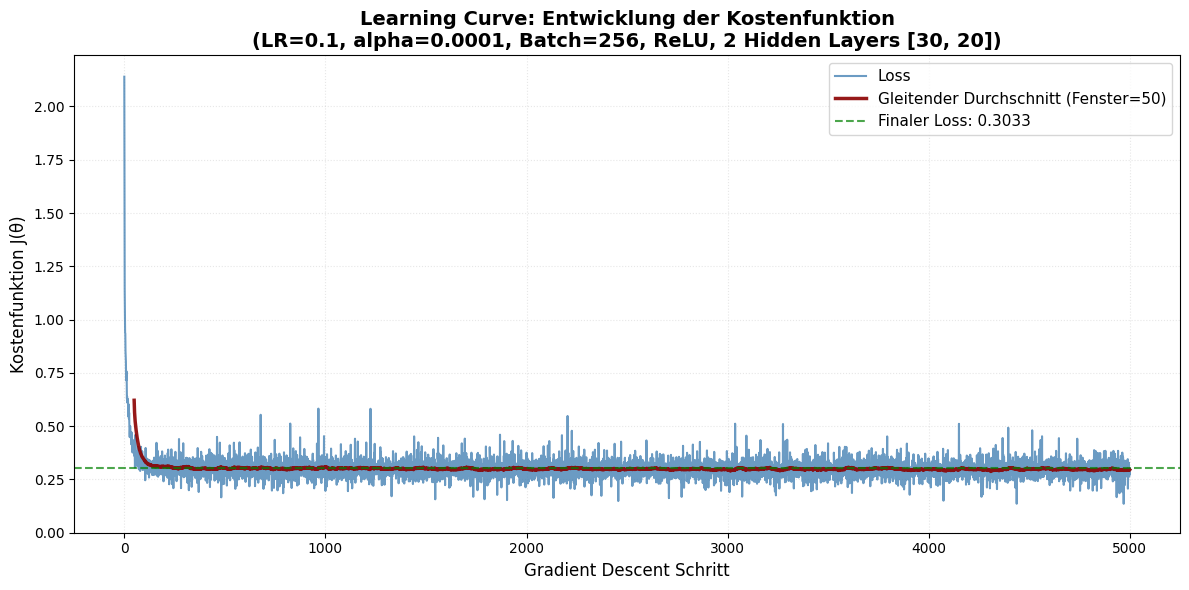

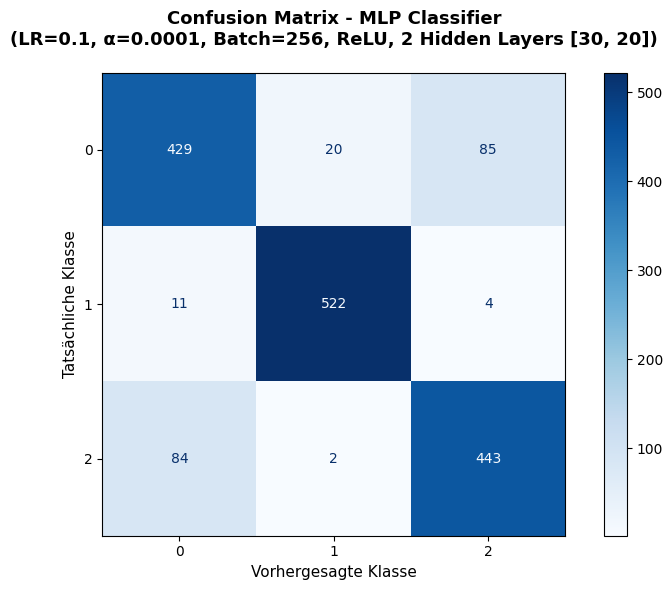

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay


# ========================================
# Daten laden
# ========================================
dev_df = pd.read_csv("./data/dev_data.csv")

dev_X = dev_df.drop(columns=["y"]).values
dev_y = dev_df["y"].values

n = dev_X.shape[0]

# Train-Test Split (80/20)
dev_X_train = dev_X[: int(0.8 * n)]
dev_y_train = dev_y[: int(0.8 * n)]

dev_X_test = dev_X[int(0.2 * n) :]
dev_y_test = dev_y[int(0.2 * n) :]

print("=" * 80)
print("DATENSATZ INFORMATIONEN")
print("=" * 80)
print(f"Training Samples: {len(dev_X_train)}")
print(f"Test Samples: {len(dev_X_test)}")
print(f"Features: {dev_X_train.shape[1]}")
print(f"Klassen: {np.unique(dev_y)}")
print()

# ========================================
# MLP Modell initialisieren und trainieren
# ========================================
print("=" * 80)
print("MODELL TRAINING")
print("=" * 80)

mlp = MLPClassifier(
    num_input_neurons=dev_X_train.shape[1],
    num_hidden_neurons=[30, 20],
    num_output_neurons=3,
    activation_function=ReluActivation,
    lr=0.1,
    alpha=0.0001,
    max_num_steps=5000,
    batch_size=256,
    suppress_output=True,  # Zeige Progress Bar
    seed=42,
)

# Modell trainieren
mlp.fit(dev_X_train, dev_y_train)

# ========================================
# Modell Evaluation
# ========================================
print("\n" + "=" * 80)
print("MODELL EVALUATION")
print("=" * 80)

# Accuracy auf dem Testdatensatz
accuracy = mlp.score(dev_X_test, dev_y_test)
print(f"Accuracy auf Testdaten: {accuracy:.4f}")

# One-Hot Encoding für calculate_cost
one_hot_encoder = OneHotEncoder(categories="auto", sparse_output=False, drop=None)
dev_y_test_one_hot = one_hot_encoder.fit_transform(dev_y_test.reshape(-1, 1))

# Wert der Kostenfunktion
y_pred_proba = mlp.predict_proba(dev_X_test)
cost = mlp.calculate_cost(dev_y_test_one_hot, y_pred_proba)
print(f"Wert der Kostenfunktion: {cost:.6f}")

print("\n" + "-" * 80)
print("ERSTE 10 BEOBACHTUNGEN")
print("-" * 80)

# Wahrscheinlichkeiten für erste 10 Beobachtungen
proba_first_10 = mlp.predict_proba(dev_X_test[:10])
print("\nWahrscheinlichkeiten (predict_proba):")
for prob in proba_first_10:
    print(f"Klasse 1:{prob[0]}\t Klasse 2:{prob[1]}\t Klasse 3:{prob[0]}")

# Vorhersagen für erste 10 Beobachtungen
predictions_first_10 = mlp.predict(dev_X_test[:10])
print("\nVorhersagen (predict):")
print(predictions_first_10)

print("\nTatsächliche Labels:")
print(dev_y_test[:10])

# ========================================
# Learning Curve plotten
# ========================================
print("\n" + "=" * 80)
print("LEARNING CURVE STATISTIKEN")
print("=" * 80)
print(f"Initialer Loss:          {mlp.loss_history[0]:.6f}")
print(f"Finaler Loss:            {mlp.loss_history[-1]:.6f}")
print(f"Minimaler Loss:          {min(mlp.loss_history):.6f}")
print(f"Maximaler Loss:          {max(mlp.loss_history):.6f}")
print(f"Durchschnittlicher Loss: {np.mean(mlp.loss_history):.6f}")
print(f"Anzahl Trainingsschritte: {len(mlp.loss_history)}")
print(
    f"Verbesserung (initial → final): "
    f"{mlp.loss_history[0] - mlp.loss_history[-1]:.6f}"
)

fig, ax = plt.subplots(figsize=(12, 6))

# Loss History plotten
_ = ax.plot(mlp.loss_history, color="steelblue", linewidth=1.5, alpha=0.8, label="Loss")

# Gleitender Durchschnitt
_ = window_size = 50
if len(mlp.loss_history) > window_size:
    moving_avg = np.convolve(
        mlp.loss_history, np.ones(window_size) / window_size, mode="valid"
    )
    _ = ax.plot(
        range(window_size - 1, len(mlp.loss_history)),
        moving_avg,
        color="darkred",
        linewidth=2.5,
        label=f"Gleitender Durchschnitt (Fenster={window_size})",
        alpha=0.9,
    )

# Finaler Loss markieren
final_loss = mlp.loss_history[-1]
_ = ax.axhline(
    y=final_loss,
    color="green",
    linestyle="--",
    linewidth=1.5,
    alpha=0.7,
    label=f"Finaler Loss: {final_loss:.4f}",
)

# Achsenbeschriftungen und Titel
_ = ax.set_xlabel("Gradient Descent Schritt", fontsize=12)
_ = ax.set_ylabel("Kostenfunktion J(θ)", fontsize=12)
_ = ax.set_title(
    "Learning Curve: Entwicklung der Kostenfunktion\n"
    "(LR=0.1, alpha=0.0001, Batch=256, ReLU, 2 Hidden Layers [30, 20])",
    fontsize=14,
    fontweight="bold",
)

# Legende und Grid
_ = ax.legend(fontsize=11)
_ = ax.grid(True, alpha=0.3, linestyle=":", linewidth=0.8)
_ = ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

# ========================================
# Confusion Matrix
# ========================================
dev_y_pred = mlp.predict(dev_X_test)
cm = confusion_matrix(dev_y_test, dev_y_pred)

fig, ax = plt.subplots(figsize=(8, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
_ = disp.plot(cmap="Blues", ax=ax, values_format="d", colorbar=True)

_ = ax.set_title(
    "Confusion Matrix - MLP Classifier\n"
    "(LR=0.1, α=0.0001, Batch=256, ReLU, 2 Hidden Layers [30, 20])",
    fontsize=13,
    fontweight="bold",
    pad=20,
)
_ = ax.set_xlabel("Vorhergesagte Klasse", fontsize=11)
_ = ax.set_ylabel("Tatsächliche Klasse", fontsize=11)

plt.tight_layout()
plt.show()

### Aufgabe 8 - Activation Functions (5 Punkte)

Untersuche mit Hilfe des Entwicklungsdatensatzes den Effekt der beiden Aktivierungsfunktionen auf Konvergenzverhalten und Klassifikationsergebnis bei anderweitig gleicher Konfiguration und Hyperparametrisierung.  

Interpretiere und erkläre.


ACCURACY VERGLEICH
ReLU     - Train: 0.8631 | Test: 0.8588
Sigmoid  - Train: 0.8700 | Test: 0.8625


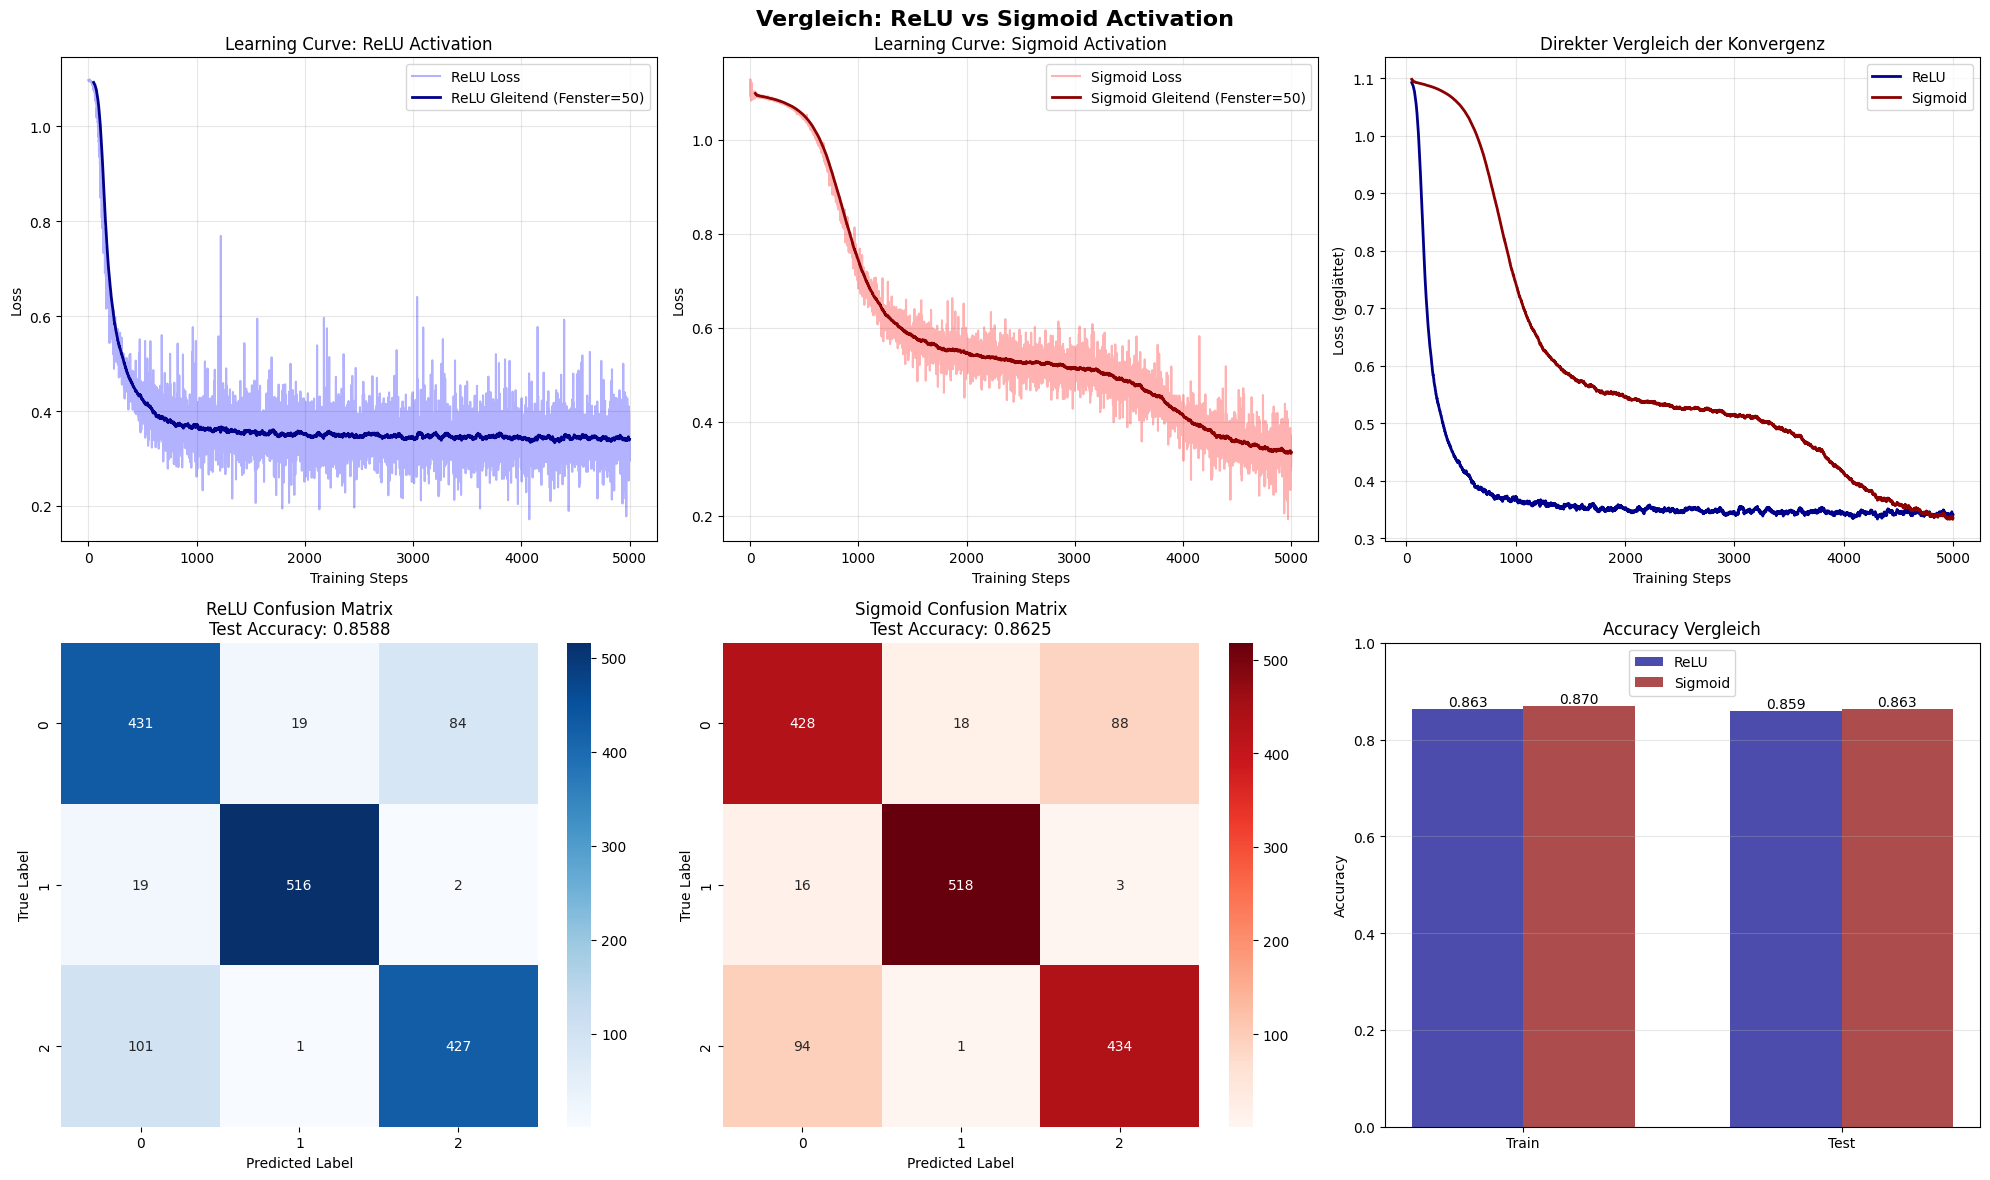


KONVERGENZ ANALYSE
ReLU Final Loss:    0.331338
Sigmoid Final Loss: 0.330677

ReLU Loss nach 100 Steps:    0.961544
Sigmoid Loss nach 100 Steps: 1.091932

ReLU Loss Reduktion:    0.766056
Sigmoid Loss Reduktion: 0.782498

ZUSAMMENFASSUNG
Metrik               ReLU            Sigmoid        
--------------------------------------------------
Train Accuracy       0.8631          0.8700         
Test Accuracy        0.8588          0.8625         
Final Loss           0.331338        0.330677       
Loss Reduktion       0.766056        0.782498       


In [33]:
mlp_ReLu = MLPClassifier(
    num_input_neurons=dev_X_train.shape[1],
    num_hidden_neurons=[2, 2],
    num_output_neurons=3,
    activation_function=ReluActivation,
    lr=0.1,
    alpha=0.0001,
    max_num_steps=5000,
    batch_size=256,
    suppress_output=True,
    seed=42,
)

mlp_SigmoidActivation = MLPClassifier(
    num_input_neurons=dev_X_train.shape[1],
    num_hidden_neurons=[2, 2],
    num_output_neurons=3,
    activation_function=SigmoidActivation,
    lr=0.1,
    alpha=0.0001,
    max_num_steps=5000,
    batch_size=256,
    suppress_output=True,
    seed=42,
)

# =============================================================================
# 1. MODELLE TRAINIEREN
# =============================================================================
_ = mlp_ReLu.fit(dev_X_train, dev_y_train)
_ = mlp_SigmoidActivation.fit(dev_X_train, dev_y_train)

# =============================================================================
# 2. PREDICTIONS ERSTELLEN
# =============================================================================

# Training Set Predictions
relu_train_pred = mlp_ReLu.predict(dev_X_train)
sigmoid_train_pred = mlp_SigmoidActivation.predict(dev_X_train)

# Test Set Predictions
relu_test_pred = mlp_ReLu.predict(dev_X_test)
sigmoid_test_pred = mlp_SigmoidActivation.predict(dev_X_test)

# =============================================================================
# 3. ACCURACY BERECHNEN
# =============================================================================

relu_train_acc = accuracy_score(dev_y_train, relu_train_pred)
relu_test_acc = accuracy_score(dev_y_test, relu_test_pred)

sigmoid_train_acc = accuracy_score(dev_y_train, sigmoid_train_pred)
sigmoid_test_acc = accuracy_score(dev_y_test, sigmoid_test_pred)

print("\n" + "=" * 60)
print("ACCURACY VERGLEICH")
print("=" * 60)
print(f"ReLU     - Train: {relu_train_acc:.4f} | Test: {relu_test_acc:.4f}")
print(f"Sigmoid  - Train: {sigmoid_train_acc:.4f} | Test: {sigmoid_test_acc:.4f}")
print("=" * 60)

# =============================================================================
# 4. VISUALISIERUNGEN ERSTELLEN
# =============================================================================

_ = plt.figure(figsize=(20, 12))

# -------------------------------------------------------------------------
# 4.1 Learning Curves (oben)
# -------------------------------------------------------------------------
ax1 = plt.subplot(2, 3, 1)
_ = ax1.plot(
    range(len(mlp_ReLu.loss_history)),
    mlp_ReLu.loss_history,
    alpha=0.3,
    color="blue",
    label="ReLU Loss",
)
# Gleitender Durchschnitt
window = 50
if len(mlp_ReLu.loss_history) > window:
    relu_smooth = np.convolve(
        mlp_ReLu.loss_history, np.ones(window) / window, mode="valid"
    )
    _ = ax1.plot(
        range(window - 1, len(mlp_ReLu.loss_history)),
        relu_smooth,
        color="darkblue",
        linewidth=2,
        label=f"ReLU Gleitend (Fenster={window})",
    )
_ = ax1.set_xlabel("Training Steps")
_ = ax1.set_ylabel("Loss")
_ = ax1.set_title("Learning Curve: ReLU Activation")
_ = ax1.legend()
_ = ax1.grid(True, alpha=0.3)

ax2 = plt.subplot(2, 3, 2)
_ = ax2.plot(
    range(len(mlp_SigmoidActivation.loss_history)),
    mlp_SigmoidActivation.loss_history,
    alpha=0.3,
    color="red",
    label="Sigmoid Loss",
)
# Gleitender Durchschnitt
if len(mlp_SigmoidActivation.loss_history) > window:
    sigmoid_smooth = np.convolve(
        mlp_SigmoidActivation.loss_history, np.ones(window) / window, mode="valid"
    )
    _ = ax2.plot(
        range(window - 1, len(mlp_SigmoidActivation.loss_history)),
        sigmoid_smooth,
        color="darkred",
        linewidth=2,
        label=f"Sigmoid Gleitend (Fenster={window})",
    )
_ = ax2.set_xlabel("Training Steps")
_ = ax2.set_ylabel("Loss")
_ = ax2.set_title("Learning Curve: Sigmoid Activation")
_ = ax2.legend()
_ = ax2.grid(True, alpha=0.3)

# Direkter Vergleich
ax3 = plt.subplot(2, 3, 3)
if len(mlp_ReLu.loss_history) > window:
    _ = ax3.plot(
        range(window - 1, len(mlp_ReLu.loss_history)),
        relu_smooth,
        color="darkblue",
        linewidth=2,
        label="ReLU",
    )
if len(mlp_SigmoidActivation.loss_history) > window:
    _ = ax3.plot(
        range(window - 1, len(mlp_SigmoidActivation.loss_history)),
        sigmoid_smooth,
        color="darkred",
        linewidth=2,
        label="Sigmoid",
    )
_ = ax3.set_xlabel("Training Steps")
_ = ax3.set_ylabel("Loss (geglättet)")
_ = ax3.set_title("Direkter Vergleich der Konvergenz")
_ = ax3.legend()
_ = ax3.grid(True, alpha=0.3)

# -------------------------------------------------------------------------
# 4.2 Confusion Matrices (unten)
# -------------------------------------------------------------------------

# ReLU Confusion Matrix
ax4 = plt.subplot(2, 3, 4)
cm_relu = confusion_matrix(dev_y_test, relu_test_pred)
_ = sns.heatmap(cm_relu, annot=True, fmt="d", cmap="Blues", ax=ax4)
_ = ax4.set_xlabel("Predicted Label")
_ = ax4.set_ylabel("True Label")
_ = ax4.set_title(f"ReLU Confusion Matrix\nTest Accuracy: {relu_test_acc:.4f}")

# Sigmoid Confusion Matrix
ax5 = plt.subplot(2, 3, 5)
cm_sigmoid = confusion_matrix(dev_y_test, sigmoid_test_pred)
_ = sns.heatmap(cm_sigmoid, annot=True, fmt="d", cmap="Reds", ax=ax5)
_ = ax5.set_xlabel("Predicted Label")
_ = ax5.set_ylabel("True Label")
_ = ax5.set_title(f"Sigmoid Confusion Matrix\nTest Accuracy: {sigmoid_test_acc:.4f}")

# Accuracy Vergleich als Barplot
ax6 = plt.subplot(2, 3, 6)
labels = ["Train", "Test"]
relu_scores = [relu_train_acc, relu_test_acc]
sigmoid_scores = [sigmoid_train_acc, sigmoid_test_acc]

x = np.arange(len(labels))
width = 0.35

bars1 = ax6.bar(
    x - width / 2, relu_scores, width, label="ReLU", color="darkblue", alpha=0.7
)
bars2 = ax6.bar(
    x + width / 2, sigmoid_scores, width, label="Sigmoid", color="darkred", alpha=0.7
)

# Werte auf Balken schreiben
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        _ = ax6.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

_ = ax6.set_ylabel("Accuracy")
_ = ax6.set_title("Accuracy Vergleich")
_ = ax6.set_xticks(x)
_ = ax6.set_xticklabels(labels)
_ = ax6.legend()
_ = ax6.set_ylim([0, 1.0])
_ = ax6.grid(True, alpha=0.3, axis="y")

_ = plt.suptitle(
    "Vergleich: ReLU vs Sigmoid Activation", fontsize=16, fontweight="bold"
)
_ = plt.tight_layout()
plt.show()


# =============================================================================
# 5. ZUSÄTZLICHE ANALYSEN
# =============================================================================

print("\n" + "=" * 60)
print("KONVERGENZ ANALYSE")
print("=" * 60)

# Final Loss
relu_final_loss = mlp_ReLu.loss_history[-1]
sigmoid_final_loss = mlp_SigmoidActivation.loss_history[-1]

print(f"ReLU Final Loss:    {relu_final_loss:.6f}")
print(f"Sigmoid Final Loss: {sigmoid_final_loss:.6f}")

# Loss nach ersten 100 Steps
if len(mlp_ReLu.loss_history) >= 100:
    print(f"\nReLU Loss nach 100 Steps:    {mlp_ReLu.loss_history[99]:.6f}")
    print(f"Sigmoid Loss nach 100 Steps: {mlp_SigmoidActivation.loss_history[99]:.6f}")

# Durchschnittliche Konvergenzgeschwindigkeit
relu_loss_reduction = mlp_ReLu.loss_history[0] - relu_final_loss
sigmoid_loss_reduction = mlp_SigmoidActivation.loss_history[0] - sigmoid_final_loss

print(f"\nReLU Loss Reduktion:    {relu_loss_reduction:.6f}")
print(f"Sigmoid Loss Reduktion: {sigmoid_loss_reduction:.6f}")

# =============================================================================
# 6. LOSS VERGLEICH - DETAILLIERTE TABELLE
# =============================================================================

print("\n" + "=" * 60)
print("ZUSAMMENFASSUNG")
print("=" * 60)

comparison_data = {
    "Metrik": ["Train Accuracy", "Test Accuracy", "Final Loss", "Loss Reduktion"],
    "ReLU": [
        f"{relu_train_acc:.4f}",
        f"{relu_test_acc:.4f}",
        f"{relu_final_loss:.6f}",
        f"{relu_loss_reduction:.6f}",
    ],
    "Sigmoid": [
        f"{sigmoid_train_acc:.4f}",
        f"{sigmoid_test_acc:.4f}",
        f"{sigmoid_final_loss:.6f}",
        f"{sigmoid_loss_reduction:.6f}",
    ],
}

print(f"{'Metrik':<20} {'ReLU':<15} {'Sigmoid':<15}")
print("-" * 50)
for i in range(len(comparison_data["Metrik"])):
    print(
        f"{comparison_data['Metrik'][i]:<20} "
        f"{comparison_data['ReLU'][i]:<15} "
        f"{comparison_data['Sigmoid'][i]:<15}"
    )

print("=" * 60)

### Konvergenzverhalten
Mit ReLU konvergiert das Modell deutlich schneller als mit Sigmoid. Der Grund liegt in der konstanten Ableitung von ReLU für positive Eingaben, die zu stabileren Gradienten führt. Sigmoid hingegen weist eine Sättigungseigenschaft auf, welche bei grossen oder kleinen Eingabewerten zu sehr kleinen Gradienten führt (Vanishing Gradient Problem (Murphy, 2022, Abschnitt 13.2.3)). Dies spiegelt sich in der Lernkurve wider: ReLU zeigt einen schnelleren Abfall der Kostenfunktion im Vergleich zu Sigmoid, was auf eine effizientere Optimierung hinweist. Dieses Konvergenzverhalten ist erwartungsgemäss.

Gleichzeitig sind in der Abbildung grössere Schwankungen bei ReLU erkennbar, die auf die nicht-saturierenden Gradienten (Ableitung = 1) zurückzuführen sind. Diese führen zu stärkeren Gewichtsupdates und höherer Batch-to-Batch Variabilität. Sigmoid hingegen zeigt eine glattere Lernkurve aufgrund der dämpfenden Wirkung ihrer Sättigung, allerdings mit langsamerer Kostenabnahme.


### Klassifikationsergebnis
Wenn nur die Testgenauigkeit für ein Modell (1x ReLu und 1x Sigmoid) analysiert wird dann kann dies die Aussage verfälschen. Deshalb wurde die Testgenauigkeit für verschiedene Netzwerkgrössen (Units) untersucht.

| Hidden Layers | ReLU Test Accuracy | Sigmoid Test Accuracy |
|----------------|----------------|------------------|
| [2, 2]       | 0.859           | 0.863           |
| [4, 4]       | 0.866           | 0.869           |
| [8, 8]       | 0.870           | 0.865           |
| [16, 16]       | 0.863           | 0.867           |
| [32, 32]       | 0.874           | 0.866           |
| [64, 64]       | 0.876           | 0.865           |
| [128, 128]       | 0.875           | 0.867           |

Die restlichen Hyperparameter wurden konstant gehalten 
- lr=0.1,
- alpha=0.0001,
- max_num_steps=5000,
- batch_size=256

Aus der Tabelle ist ersichtlich, dass beide Aktivierungsfunktionen vergleichbare Genauigkeiten erzielen. Sigmoid scheint jedoch leicht bessere Ergebnisse bei kleineren Netzwerken zu liefern, während ReLU bei grösseren Netzwerken tendenziell besser abschneidet. Insgesamt sind die Unterschiede jedoch minimal.

Dieses Phänomen kann durch die unterschiedlichen Eigenschaften der Aktivierungsfunktionen erklärt werden:
- **ReLU**: Bietet eine bessere Leistung in tieferen Netzwerken, da es die Vanishing Gradient Problematik reduziert und eine sparsere Aktivierung ermöglicht.
- **Sigmoid**: Kann in flacheren Netzwerken vorteilhaft sein, da es eine sanftere Aktivierung bietet und somit die Lernstabilität erhöht, eine Art Regularisierungseffekt.

### Vanishing Gradient Problem
Beim Training neuronaler Netze mit Backpropagation werden Gradienten von der letzten zur ersten Schicht zurückpropagiert. Dabei wird der Gradient durch die Ableitung jeder Aktivierungsfunktion multipliziert. Wenn diese Ableitungen klein sind, werden die Gradienten exponentiell kleiner - die frühen Layer lernen praktisch nicht mehr.

- **Sigmoid**: Die Ableitung der Sigmoid-Funktion ist maximal 0.25 (bei x=0) und wird für grosse positive oder negative Eingaben sehr klein. Dies führt dazu, dass die Gradienten in den frühen Schichten stark abnehmen, was das Lernen erschwert.
- **ReLU**: Die Ableitung der ReLU-Funktion ist entweder 0 (für negative Eingaben) oder 1 (für positive Eingaben). Dies bedeutet, dass die Gradienten in den frühen Schichten nicht so stark abnehmen, was das Lernen erleichtert.

### Aufgabe 9 - MLP Anwendung (8 Punkte)

In dieser Aufgabe wirst du deine MLP-Implementierung verwenden, um ein bestmögliches Modell für die Vorhersage der Zielvariable `Herzkrankheit` zu entwickeln.

Vergleiche dazu verschiedene Modelle und wähle das beste im Sinne von F1 mit einem geeigneten Verfahren aus.

Berechne weiter jeweils F1 und die Accuracy auf dem Testset und zeichne die Confusion Matrix für das beste Modell.  

Erkläre dein Vorgehen und diskutiere die Resultate.

Verwende `sklearn.pipeline`.

In [34]:
# Daten wurden bereits aufgeteilt
# in X_train, y_train, X_test, y_test
# Dazu gibt es noch die passenden Variablen continuous_features, categorical_features und binary_features. (Diese beinhalten die Zielvariable nicht!)
# Auch der Preprocessor wird von Aufgabe 3 übernommen. Dieser Standartskalisiert numerische Features und one-hot encodiert kategoriale Features.
# ============================================
# 1. K-FOLD CROSS-VALIDATION SETUP
# ============================================

# Anzahl der Folds definieren
k_folds = 5  # Kann angepasst werden (typisch: 5 oder 10)

# StratifiedKFold für balancierte Klassenverteilung in jedem Fold
cv_strategy = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# ============================================
# 2. HYPERPARAMETER-RAUM DEFINIEREN
# ============================================
lrs = np.logspace(0, -4, 5)
hidden_layers = [
    [32],
    [64],
    [32, 32],
    [64, 32],
    [64, 64],
]
activation_functions = [ReluActivation, SigmoidActivation]
alphas = np.logspace(-5, 0, 5)
max_num_steps = [1000, 5000]
batch_sizes = [64, 128, 256]

# Mittels ParameterGrid alle Kombinationen erstellen
param_grid = {
    "classifier__lr": lrs,
    "classifier__num_hidden_neurons": hidden_layers,
    "classifier__activation_function": activation_functions,
    "classifier__alpha": alphas,
    "classifier__max_num_steps": max_num_steps,
    "classifier__batch_size": batch_sizes,
}

In [35]:
# Stelle sicher, dass der Preprocessor auf den Trainingsdaten passt, damit wir die transformierte Dim kennen
preprocessor.fit(X_train)
n_input_after_preproc = preprocessor.transform(X_train).shape[1]

# Erstelle eine Basis-MLP-Instanz mit korrekter Input-Dimension (Platzhalter-Architektur)
base_mlp = MLPClassifier(
    num_input_neurons=n_input_after_preproc,  # <- hier die transformierte Dim verwenden
    num_hidden_neurons=[
        32
    ],  # Platzhalter, GridSearch überschreibt classifier__num_hidden_neurons
    num_output_neurons=len(np.unique(y_train)),
    activation_function=ReluActivation,
    lr=0.1,
    alpha=0.0,
    max_num_steps=1000,
    batch_size=256,
    suppress_output=True,
    seed=42,
)


pipeline_mlp = Pipeline([("preprocessor", preprocessor), ("classifier", base_mlp)])


grid_search_mlp = GridSearchCV(
    pipeline_mlp,
    param_grid,
    cv=cv_strategy,
    scoring="f1",
    return_train_score=True,
    n_jobs=-1,  # Nutze alle verfügbaren Kerne
)

# Fit einmal — GridSearchCV führt intern die CV über alle Kombinationen aus
grid_search_mlp.fit(X_train, y_train)

print("Best params:", grid_search_mlp.best_params_)
print("Best CV F1:", grid_search_mlp.best_score_)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Alter', 'Ruheblutdruck', 'Cholesterin',
                                  'Maximale Herzfrequenz',
                                  'ST-Strecken-Senkung']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Geschlecht', 'Art der Brustschmerzen',
                                  'Ruhe-EKG', 'Belastungsangina',
                                  'Steigung der ST-Strecke',
                                  'Nüchternblutzucker'])])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Alter',
                                                                          'Ruheblutdruck',
                                                                          'Cholesterin',
                                                                          'Maximale '
                                                                          'Herzfrequenz',
                                                                          'ST-Strecken-Senkung']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_ou...
                         'classifier__alpha': array([1.00000000e-05, 1.77827941e-04, 3.16227766e-03, 5.62341325e-02,
       1.00000000e+00]),
                         'classifier__batch_size': [64, 128, 256],
                         'classifier__lr': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'classifier__max_num_steps': [1000, 5000],
                         'classifier__num_hidden_neurons': [[32], [64],
                                                            [32, 32], [64, 32],
                                                            [64, 64]]},
             return_train_score=True, scoring='f1')

Best params: {'classifier__activation_function': <class '__main__.SigmoidActivation'>, 'classifier__alpha': np.float64(0.0031622776601683794), 'classifier__batch_size': 64, 'classifier__lr': np.float64(0.1), 'classifier__max_num_steps': 5000, 'classifier__num_hidden_neurons': [64]}
Best CV F1: 0.8885522338644497


In [36]:
# ============================================
# BESTES MODELL EXTRAHIEREN
# ============================================
best_model = grid_search_mlp.best_estimator_
best_params = grid_search_mlp.best_params_
best_cv_f1 = grid_search_mlp.best_score_

print("=" * 60)
print("BESTE HYPERPARAMETER-KONFIGURATION")
print("=" * 60)
for param, value in best_params.items():
    print(f"{param}: {value}")
print(f"\nBester CV F1-Score: {best_cv_f1:.4f}")

BESTE HYPERPARAMETER-KONFIGURATION
classifier__activation_function: <class '__main__.SigmoidActivation'>
classifier__alpha: 0.0031622776601683794
classifier__batch_size: 64
classifier__lr: 0.1
classifier__max_num_steps: 5000
classifier__num_hidden_neurons: [64]

Bester CV F1-Score: 0.8886


In [37]:
from sklearn.metrics import classification_report

# ============================================
# TESTSET-EVALUATION
# ============================================

# Vorhersagen auf Testset
y_pred = best_model.predict(X_test)

# Metriken berechnen
test_f1 = f1_score(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print("\n" + "=" * 60)
print("TESTSET-PERFORMANCE")
print("=" * 60)
print(f"F1-Score: {test_f1:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(
    classification_report(
        y_test, y_pred, target_names=["Keine Herzkrankheit", "Herzkrankheit"]
    )
)


TESTSET-PERFORMANCE
F1-Score: 0.8907
Accuracy: 0.8821

Classification Report:
                     precision    recall  f1-score   support

Keine Herzkrankheit       0.87      0.88      0.87       105
      Herzkrankheit       0.89      0.89      0.89       124

           accuracy                           0.88       229
          macro avg       0.88      0.88      0.88       229
       weighted avg       0.88      0.88      0.88       229



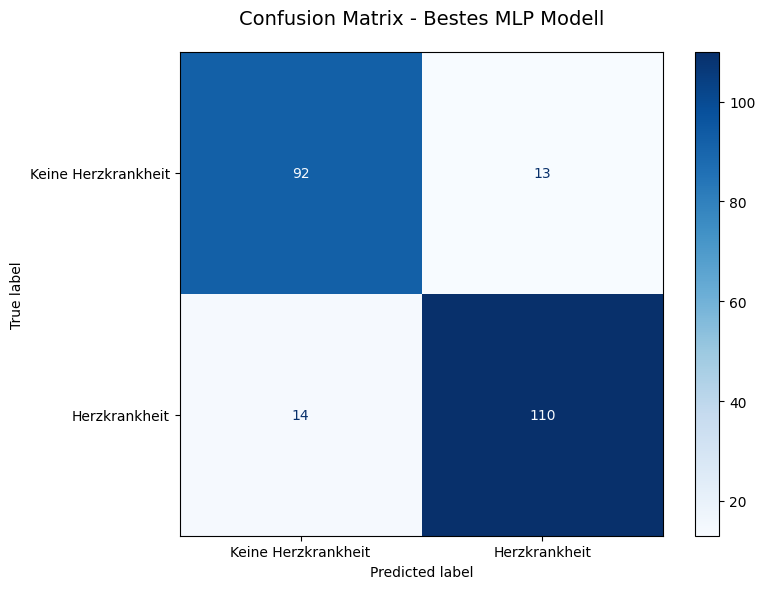

In [38]:
# ============================================
# CONFUSION MATRIX
# ============================================
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Keine Herzkrankheit", "Herzkrankheit"]
)
_ = disp.plot(ax=ax, cmap="Blues", values_format="d")
_ = ax.set_title("Confusion Matrix - Bestes MLP Modell", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [39]:
# ============================================
# 5. TESTSET-EVALUATION: LOGISTISCHE REGRESSION
# ============================================

# Bestes Modell aus GridSearch verwenden
best_logreg = grid_search.best_estimator_

# Vorhersagen auf Testset
y_pred_logreg = best_logreg.predict(X_test)

# Metriken berechnen
logreg_f1_test = f1_score(y_test, y_pred_logreg)
logreg_accuracy_test = accuracy_score(y_test, y_pred_logreg)

print("\n" + "=" * 80)
print("LOGISTISCHE REGRESSION - TESTSET PERFORMANCE")
print("=" * 80)
print(f"F1-Score:  {logreg_f1_test:.4f}")
print(f"Accuracy:  {logreg_accuracy_test:.4f}")

# ============================================
# 6. MLP: BESTES MODELL AUS GRIDSEARCH LADEN
# ============================================

# Bestes MLP Modell aus deinem MLP GridSearch
best_mlp = grid_search_mlp.best_estimator_

# Vorhersagen auf Testset
y_pred_mlp = best_mlp.predict(X_test)

# Metriken berechnen
mlp_f1_test = f1_score(y_test, y_pred_mlp)
mlp_accuracy_test = accuracy_score(y_test, y_pred_mlp)

print("\n" + "=" * 80)
print("MLP - TESTSET PERFORMANCE")
print("=" * 80)
print(f"Best Parameters: {grid_search_mlp.best_params_}")
print(f"Best CV F1-Score: {grid_search_mlp.best_score_:.4f}")
print(f"F1-Score (Test):  {mlp_f1_test:.4f}")
print(f"Accuracy (Test):  {mlp_accuracy_test:.4f}")

# ============================================
# 7. PLOT 2: MODELLVERGLEICH
# ============================================
# Erstelle DataFrame für Vergleich
models_comparison = pd.DataFrame(
    {
        "Modell": ["Logistische Regression", "MLP (Best)"],
        "F1-Score": [logreg_f1_test, mlp_f1_test],
        "Accuracy": [logreg_accuracy_test, mlp_accuracy_test],
        "CV F1-Score": [grid_search.best_score_, grid_search_mlp.best_score_],
    }
)

print("\n" + "=" * 80)
print("MODELLVERGLEICH: TESTSET PERFORMANCE")
print("=" * 80)
print(models_comparison.to_string(index=False))


LOGISTISCHE REGRESSION - TESTSET PERFORMANCE
F1-Score:  0.9048
Accuracy:  0.8952

MLP - TESTSET PERFORMANCE
Best Parameters: {'classifier__activation_function': <class '__main__.SigmoidActivation'>, 'classifier__alpha': np.float64(0.0031622776601683794), 'classifier__batch_size': 64, 'classifier__lr': np.float64(0.1), 'classifier__max_num_steps': 5000, 'classifier__num_hidden_neurons': [64]}
Best CV F1-Score: 0.8886
F1-Score (Test):  0.8907
Accuracy (Test):  0.8821

MODELLVERGLEICH: TESTSET PERFORMANCE
                Modell  F1-Score  Accuracy  CV F1-Score
Logistische Regression  0.904762  0.895197     0.880324
            MLP (Best)  0.890688  0.882096     0.888552


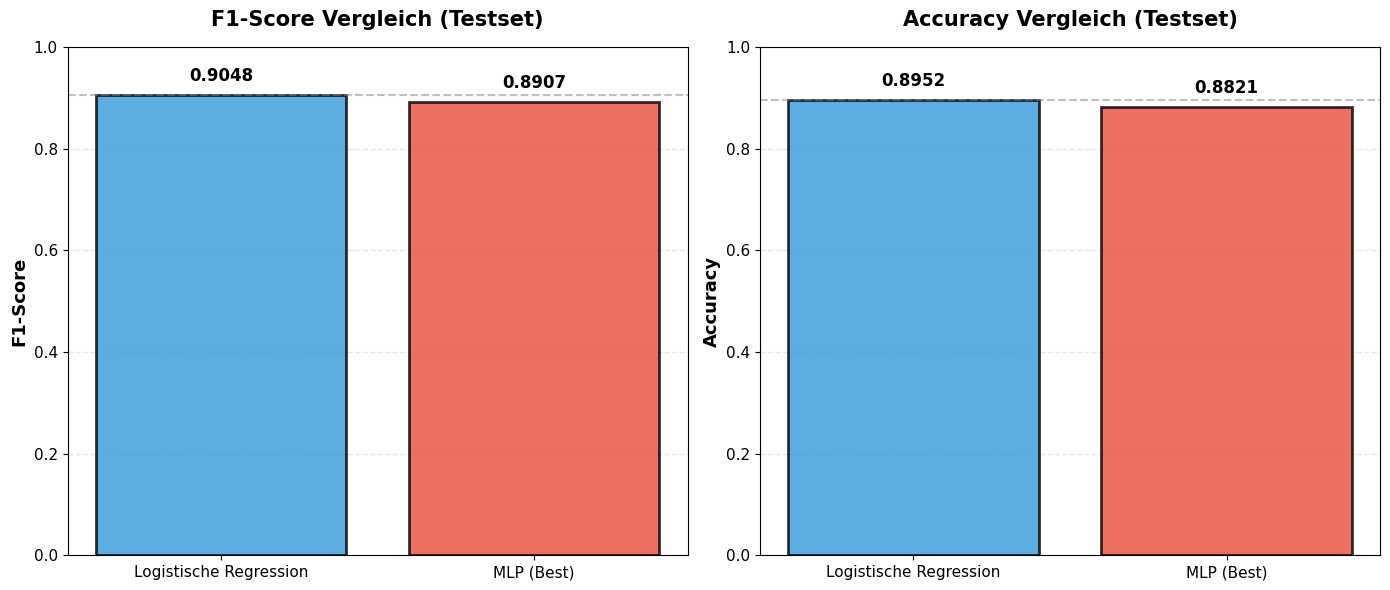

In [40]:
# Visualisierung: Zwei Subplots nebeneinander
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Farbschema
colors = ["#3498db", "#e74c3c"]  # Blau für LogReg, Rot für MLP

# ========================================
# SUBPLOT 1: F1-SCORE VERGLEICH
# ========================================
bars1 = ax1.bar(
    models_comparison["Modell"],
    models_comparison["F1-Score"],
    color=colors,
    edgecolor="black",
    linewidth=2,
    alpha=0.8,
)

_ = ax1.set_ylabel("F1-Score", fontsize=13, fontweight="bold")
_ = ax1.set_title(
    "F1-Score Vergleich (Testset)", fontsize=15, fontweight="bold", pad=15
)
_ = ax1.set_ylim([0, 1])
_ = ax1.grid(axis="y", alpha=0.3, linestyle="--", linewidth=1)
_ = ax1.set_axisbelow(True)

# Werte über Balken anzeigen
for i, (bar, val) in enumerate(zip(bars1, models_comparison["F1-Score"])):
    height = bar.get_height()
    _ = ax1.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.02,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=12,
    )

# Horizontale Linie bei LogReg Performance (als Referenz)
_ = ax1.axhline(
    y=logreg_f1_test,
    color="gray",
    linestyle="--",
    linewidth=1.5,
    alpha=0.5,
    label="LogReg Baseline",
)

# ========================================
# SUBPLOT 2: ACCURACY VERGLEICH
# ========================================
bars2 = ax2.bar(
    models_comparison["Modell"],
    models_comparison["Accuracy"],
    color=colors,
    edgecolor="black",
    linewidth=2,
    alpha=0.8,
)


_ = ax2.set_ylabel("Accuracy", fontsize=13, fontweight="bold")
_ = ax2.set_title(
    "Accuracy Vergleich (Testset)", fontsize=15, fontweight="bold", pad=15
)
_ = ax2.set_ylim([0, 1])
_ = ax2.grid(axis="y", alpha=0.3, linestyle="--", linewidth=1)
_ = ax2.set_axisbelow(True)

# Werte über Balken anzeigen
for i, (bar, val) in enumerate(zip(bars2, models_comparison["Accuracy"])):
    height = bar.get_height()
    _ = ax2.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.02,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=12,
    )

# Horizontale Linie bei LogReg Performance (als Referenz)
_ = ax2.axhline(
    y=logreg_accuracy_test,
    color="gray",
    linestyle="--",
    linewidth=1.5,
    alpha=0.5,
    label="LogReg Baseline",
)

# X-Achsen-Labels rotieren für bessere Lesbarkeit
for ax in [ax1, ax2]:
    ax.tick_params(axis="x", labelsize=11)
    ax.tick_params(axis="y", labelsize=11)

plt.tight_layout()
plt.show()


VERBESSERUNG DURCH MLP GEGENÜBER LOGISTISCHER REGRESSION
F1-Score:  -1.56% (Verschlechterung)
Accuracy:  -1.46% (Verschlechterung)

Absolute Differenzen:
ΔF1-Score:  -0.0141
ΔAccuracy:  -0.0131


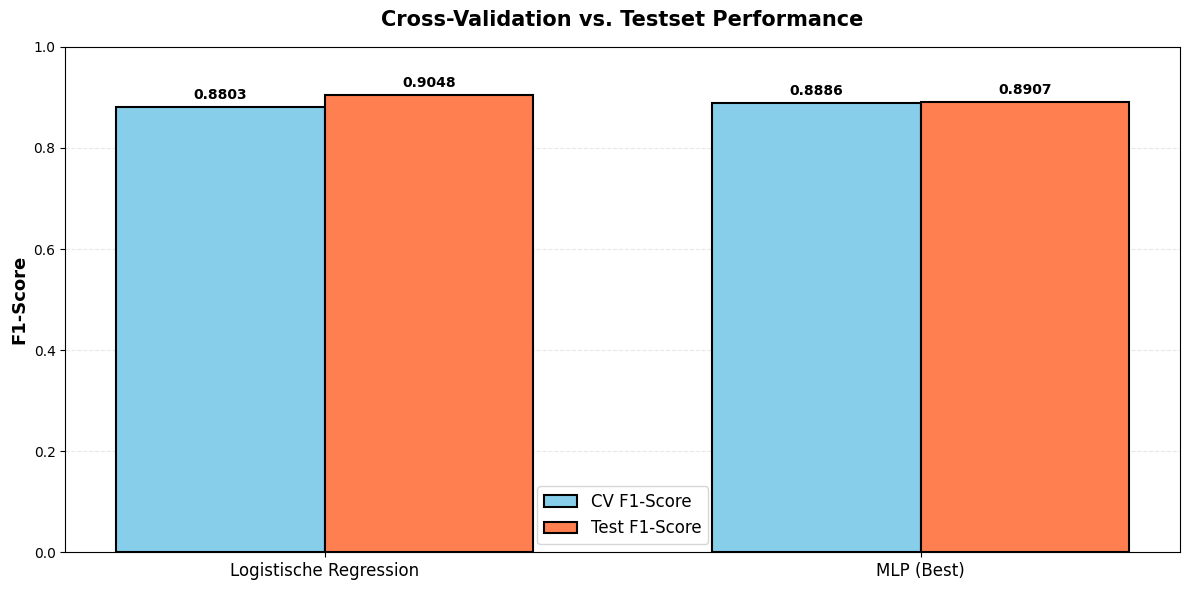


GENERALISIERUNGSFÄHIGKEIT (CV vs. Test)
Logistische Regression:
  CV F1:    0.8803
  Test F1:  0.9048
  Differenz: +0.0244 (gute Generalisierung)

MLP (Best):
  CV F1:    0.8886
  Test F1:  0.8907
  Differenz: +0.0021 (gute Generalisierung)



In [41]:
# ============================================
# 8. VERBESSERUNG BERECHNEN UND AUSGEBEN
# ============================================
f1_improvement = ((mlp_f1_test - logreg_f1_test) / logreg_f1_test) * 100
acc_improvement = (
    (mlp_accuracy_test - logreg_accuracy_test) / logreg_accuracy_test
) * 100

print("\n" + "=" * 80)
print("VERBESSERUNG DURCH MLP GEGENÜBER LOGISTISCHER REGRESSION")
print("=" * 80)
print(
    f"F1-Score:  {f1_improvement:+.2f}% {'(Verbesserung)' if f1_improvement > 0 else '(Verschlechterung)'}"
)
print(
    f"Accuracy:  {acc_improvement:+.2f}% {'(Verbesserung)' if acc_improvement > 0 else '(Verschlechterung)'}"
)

# Absolute Differenzen
print(f"\nAbsolute Differenzen:")
print(f"ΔF1-Score:  {mlp_f1_test - logreg_f1_test:+.4f}")
print(f"ΔAccuracy:  {mlp_accuracy_test - logreg_accuracy_test:+.4f}")

# ============================================
# 9. ZUSÄTZLICHER PLOT: CV vs. TEST PERFORMANCE
# ============================================
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(models_comparison["Modell"]))
width = 0.35

_ = bars1 = ax.bar(
    x - width / 2,
    models_comparison["CV F1-Score"],
    width,
    label="CV F1-Score",
    color="skyblue",
    edgecolor="black",
    linewidth=1.5,
)
_ = bars2 = ax.bar(
    x + width / 2,
    models_comparison["F1-Score"],
    width,
    label="Test F1-Score",
    color="coral",
    edgecolor="black",
    linewidth=1.5,
)

_ = ax.set_ylabel("F1-Score", fontsize=13, fontweight="bold")
_ = ax.set_title(
    "Cross-Validation vs. Testset Performance", fontsize=15, fontweight="bold", pad=15
)
_ = ax.set_xticks(x)
_ = ax.set_xticklabels(models_comparison["Modell"], fontsize=12)
_ = ax.legend(fontsize=12)
_ = ax.set_ylim([0, 1])
_ = ax.grid(axis="y", alpha=0.3, linestyle="--")
ax.set_axisbelow(True)

# Werte über Balken
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        _ = ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.01,
            f"{height:.4f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

plt.tight_layout()
plt.show()

# Generalisierungsfähigkeit prüfen
print("\n" + "=" * 80)
print("GENERALISIERUNGSFÄHIGKEIT (CV vs. Test)")
print("=" * 80)
for i, model in enumerate(models_comparison["Modell"]):
    cv_score = models_comparison["CV F1-Score"].iloc[i]
    test_score = models_comparison["F1-Score"].iloc[i]
    diff = test_score - cv_score
    print(f"{model}:")
    print(f"  CV F1:    {cv_score:.4f}")
    print(f"  Test F1:  {test_score:.4f}")
    print(
        f"  Differenz: {diff:+.4f} {'(leichtes Overfitting)' if diff < -0.02 else '(gute Generalisierung)' if diff > -0.02 else ''}"
    )
    print()


TOP 10 KONFIGURATIONEN
 param_classifier__lr param_classifier__num_hidden_neurons param_classifier__activation_function  param_classifier__alpha  mean_test_score  std_test_score
                 0.10                                 [64]  <class '__main__.SigmoidActivation'>                 0.003162         0.888552        0.023103
                 0.01                                 [64]  <class '__main__.SigmoidActivation'>                 0.000010         0.888073        0.029521
                 0.01                                 [64]  <class '__main__.SigmoidActivation'>                 0.000178         0.888073        0.029521
                 0.10                                 [64]  <class '__main__.SigmoidActivation'>                 0.000010         0.887530        0.029359
                 1.00                                 [64]  <class '__main__.SigmoidActivation'>                 0.003162         0.887216        0.020605
                 0.10                         

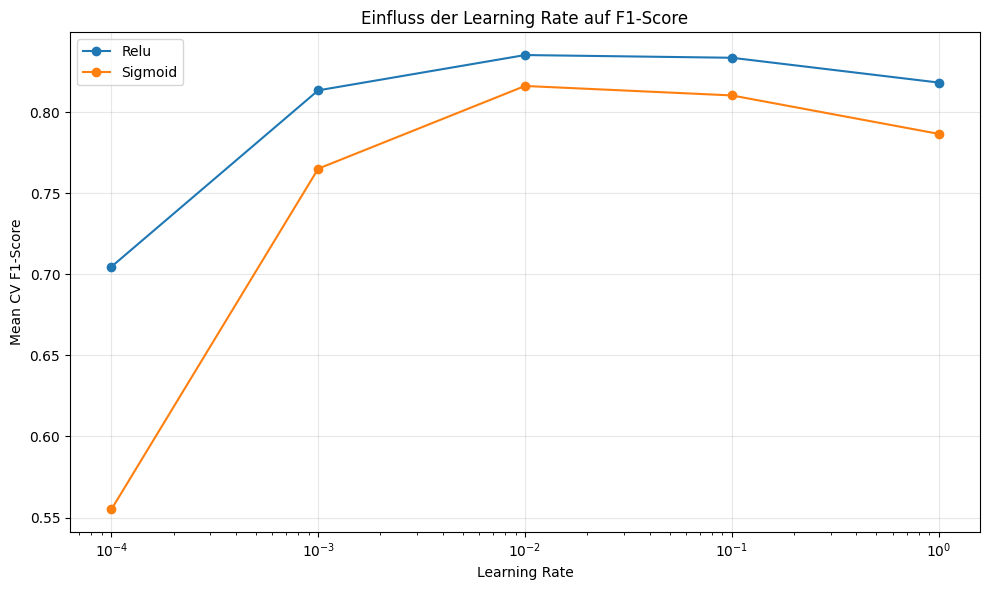

In [42]:
# ============================================
# HYPERPARAMETER-EINFLUSS ANALYSIEREN
# ============================================
cv_results = pd.DataFrame(grid_search_mlp.cv_results_)

# Top 10 Konfigurationen
top_10 = cv_results.nsmallest(10, "rank_test_score")[
    [
        "param_classifier__lr",
        "param_classifier__num_hidden_neurons",
        "param_classifier__activation_function",
        "param_classifier__alpha",
        "mean_test_score",
        "std_test_score",
    ]
].copy()

print("\n" + "=" * 60)
print("TOP 10 KONFIGURATIONEN")
print("=" * 60)
print(top_10.to_string(index=False))

# Visualisierung: Einfluss der Learning Rate
fig, ax = plt.subplots(figsize=(10, 6))
for activation in activation_functions:
    activation_name = activation.__name__.replace("Activation", "")
    mask = cv_results["param_classifier__activation_function"] == activation

    grouped = cv_results[mask].groupby("param_classifier__lr")["mean_test_score"].mean()
    _ = ax.plot(grouped.index, grouped.values, marker="o", label=activation_name)

_ = ax.set_xlabel("Learning Rate")
_ = ax.set_ylabel("Mean CV F1-Score")
_ = ax.set_title("Einfluss der Learning Rate auf F1-Score")
_ = ax.set_xscale("log")
_ = ax.legend()
_ = ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 1. Vorgehen zur Modellentwicklung
Das Vorgehen lässt sich in folgende Schritte unterteilen:
1. Setup: Die Daten wurden vorab in Trainings- ($X\_{train}, y\_{train}$) und Testdaten ($X\_{test}, y\_{test}$) aufgeteilt und ein Preprocessor zur Standardisierung numerischer und One-Hot-Enkodierung kategorialer Features definiert (ersichtlich in Aufgabe 3). Eine Pipeline wurde erstellt, um den Preprocessor und den MLPClassifier zu verketten, wodurch die Vorverarbeitung in die Validierung integriert wird.
2. Hyperparameter-Tuning: Es wurde eine umfassende Grid Search (GridSearchCV) in Kombination mit 5-facher stratifizierter Kreuzvalidierung (StratifiedKFold) auf den Trainingsdaten durchgeführt, um das beste Hyperparameter-Set zu finden. 
   1. Als Optimierungsziel wird der F1-Score (scoring="f1") verwendet.
   2. Der Hyperparameter-Raum umfasst:
      1. Lernraten ($lr$): 5 logarithmisch verteilte Werte von $10^0$ bis $10^{-4}$.
      2. Anzahl der versteckten Neuronen ($num\_{hidden}\_{neurons}$): 5 Architekturen (z.B. [32], [64, 64]).
      3. Aktivierungsfunktionen ($activation\_{function}$): Sigmoid und ReLU.
      4. Regularisierungsparameter ($\alpha$): 5 logarithmisch verteilte Werte von $10^{-5}$ bis $10^{-0}$.
      5. Maximale Anzahl an Trainingsschritten ($max\_{num}\_{steps}$) und Batch-Grössen ($batch\_{sizes}$).
3. Bestes Modell: Das Modell mit dem höchsten durchschnittlichen CV F1-Score wurde als bestes Modell ausgewählt.
4. Testset-Evaluation: Das beste Modell wurde abschliessend auf dem unabhängigen Testset evaluiert, um eine unverzerrte Schätzung der Generalisierungsfähigkeit zu erhalten.
5. Modellvergleich: Die Performance des besten MLP-Modells wurde mit den Testset-Ergebnissen eines Logistischen Regressionsmodells (Baseline) verglichen, welches in Aufgabe 3 entwickelt wurde.

### 2. Diskussion der Resultate
#### Bestes MLP-Modell
- Beste Hyperparameter: Das beste MLP-Modell erreichte einen CV F1-Score von 0.8886. Die Top-Performance wurde mit folgenden Parametern erzielt:
  - Aktivierungsfunktion: Sigmoid
  - Lernrate ($lr$): 0.1
  - Anzahl versteckter Layer: Eine einzelne Schicht mit 64 Neuronen ($\text{[64]}$).
  - Regularisierung ($\alpha$): Sehr klein 0.00316, was effektiv keiner Regularisierung entspricht.
- Testset Performance: Auf dem Testset zeigt das beste MLP-Modell eine Performance von F1-Score: 0.8907 und Accuracy: 0.8821.

#### Confusion Matrix (Konfusionsmatrix)
| True Label (Wahr) | Predicted: Keine Herzkrankheit (105) | Predicted: Herzkrankheit (124) |
|-------------------|--------------------------------------|-------------------------------|
| Keine Herzkrankheit | 92 (True Negatives, TN) | 13 (False Positives, FP) |
| Herzkrankheit | 14 (False Negatives, FN) | 110 (True Positives, TP) |

- Wahre Positive (TP = 110): 110 Patienten mit Herzkrankheit wurden korrekt erkannt (Recall / Sensitivität: $110/(110+14) \approx 0.887$).
- Wahre Negative (TN = 92): 92 gesunde Personen wurden korrekt als gesund eingestuft.
- Falsche Negative (FN = 14): 14 Patienten mit Herzkrankheit wurden fälschlicherweise als gesund eingestuft (Typ-II-Fehler).
- Falsche Positive (FP = 13): 13 gesunde Personen wurden fälschlicherweise als krank eingestuft (Typ-I-Fehler).

#### Vergleich mit der Logistischen Regression
Die Plots und die Tabelle zeigen den direkten Vergleich:
| Modell | CV F1-Score | Test F1-Score | Test Accuracy |
|--------|-------------|---------------|---------------|
| Logistische Regression | 0.8803 | 0.9048 | 0.8952 |
| MLP Classifier | 0.8886 | 0.8907 | 0.8821 |

- Ergebnis: Überraschenderweise schneidet die Logistische Regression auf dem Testset sowohl beim F1-Score (+0.0141 absoluter Unterschied) als auch bei der Accuracy (+0.0131 absoluter Unterschied) besser ab als das beste MLP-Modell.
- Fazit zum Vergleich: Obwohl das MLP-Modell in der Kreuzvalidierung (CV) das höhere Potenzial zeigte, bestätigt sich dieses Potenzial auf dem unabhängigen Testset nicht. Die Logistische Regression ist in diesem Fall das robustere und überlegene Modell zur Vorhersage von Herzkrankheiten.
  
### Mögliche Gründe, warum Logistische Regression besser ist:
- Daten-Komplexität: Das Dataset ist möglicherweise linear trennbar (oder fast linear trennbar). Die Logistische Regression ist ein lineares Modell. Wenn die Beziehung zwischen den Features und der Zielvariablen bereits linear gut modelliert werden kann, bieten komplexere, nicht-lineare Modelle wie das MLP **keinen** signifikanten Mehrwert. Die zusätzlichen Parameter des MLP (Gewichte und Biases in den Hidden Layern) führen dann eher zu Overfitting auf die feinen, möglicherweise irrelevanten Muster der Trainingsdaten.
- Optimales Feature Engineering: Da der Preprocessor für beide Modelle gleich ist (Standardisierung und One-Hot-Encoding), profitieren beide von einer gut vorbereiteten, normalisierten Feature-Repräsentation. Dies ist für die Logistische Regression oft ausreichend.

### Aufgabe 10 - Decision Tree Theorie (8 Punkte)

Erkläre kurz und präzis wie ein Entscheidungsbaum konstruiert wird. Was für eine Rolle spielen dabei das Unreinheitsmass, die maximale Tiefe, sowie Pruning?

### Entscheidungsbaum

Ein Entscheidungsbaum ist eine Baumstruktur, die zur Klassifikation oder Regression verwendet wird. Er besteht aus Knoten (Nodes), die Entscheidungen basierend auf den Eingabefeatures treffen, und Blättern, die die endgültigen Vorhersagen liefern (Leaf Nodes). Ein Entscheidungsbaum kann binär sein (jeder Knoten teilt in zwei Zweige) oder multiway-split sein. 

Ein Entscheidungsbaum wird durch einen rekursiven Prozess konstruiert, der als "Top-Down Induction" bezeichnet wird:
1. **Start**: Beginne mit dem gesamten Datensatz als Wurzelknoten (Root Node).
2. **Feature-Auswahl**: Wähle das Feature und den Schwellenwert aus, das die beste Aufteilung der Daten ermöglicht. Dies wird durch die Minimierung eines Unreinheitsmasses erreicht (Split).
3. **Aufteilung**: Teile die Daten in zwei oder mehrere Teilmengen basierend auf dem ausgewählten Feature und Schwellenwert.
4. **Rekursion**: Wiederhole die Schritte 2-3 für jede Teilmenge, bis ein Abbruchkriterium erreicht ist (z.B. maximale Tiefe, minimale Anzahl von Samples pro Blatt, oder wenn alle Datenpunkte in einem Knoten die gleiche Klasse haben).

### Unreinheitsmass
Das Unreinheitsmass gibt an wie "gemischt" die Klassen in einem Knoten sind. Bei jedem Split wird dasjenige Feature und der Schwellenwert gewählt, welche die gewichtete Unreinheit der Kind-Knoten am stärksten reduzieren. Ein reiner Knoten (nur eine Klasse) hat Unreinheit 0. Ein Knoten mit gleichverteilten Klassen hat die maximale Unreinheit. Die Rolle des Unreinheitsmass ist es, die Qualität eines Splits zu bewerten. Es wird immer der Split gewählt, der die Unreinheit am meisten reduziert (Informationsgewinn).

Häufig verwendete Unreinheitsmasse bei Klassifikationsbäumen sind:
- Gini-Index: $$\text{Gini} = 1 - \sum_{c=1}^C \hat{\pi}_{i,c}^2$$
- Entropie (Information Gain): $$\text{H}_i=-\sum_{c=1}^C \hat{\pi} \log(\hat{\pi}_{i,c})$$

$$\hat{\pi}_{i,c}
= \frac{\text{Anzahl Beispiele der Klasse } c \text{ im Node } i}
{\text{gesamt Anzahl Beispiele im Node } i}$$

### Maximale Tiefe
Die maximale Tiefe eines Entscheidungsbaums begrenzt die Anzahl der aufeinanderfolgenden Splits von der Wurzel bis zu den Blättern. Eine zu hohe Tiefe kann zu Overfitting führen, da der Baum dann zu sehr auf die Trainingsdaten angepasst wird und nicht gut generalisiert. Eine zu geringe Tiefe kann hingegen zu Underfitting führen, da der Baum nicht genügend Komplexität hat, um die zugrunde liegenden Muster in den Daten zu erfassen.

### Pruning
Pruning ist eine Technik zur Reduzierung der Komplexität eines Entscheidungsbaums, um Overfitting zu vermeiden. Es gibt zwei Hauptarten von Pruning:
- **Pre-Pruning**: Begrenzung der Baumwachstums während der Konstruktion, z.B. durch Festlegen einer maximalen Tiefe oder minimaler Samples pro Blatt.
- **Post-Pruning**: Entfernen von Knoten aus einem bereits konstruierten Baum, basierend auf der Leistung auf einem Validierungsdatensatz. Knoten, die die Leistung nicht verbessern, werden entfernt und durch Blätter ersetzt.



Konstruiere nun ein einfaches Beispiel, bei welchem die Wahl des Unreinheitsmasses zu einer unterschiedlichen Klassifikation führt bei anderweitig deterministischem Algorithmus und erkläre warum das so ist.

DATASET
 Feature1  Feature2 Class
        0         0     B
        0         1     B
        0         2     A
        0         3     A
        1         0     A
        1         1     B
        1         2     B
        1         3     B
        2         0     A
        2         1     B
        2         2     B
        2         3     A

Test-Punkt: Feature1=0.25, Feature2=0.75


DecisionTreeClassifier(max_depth=2, random_state=42)


GINI INDEX
Vorhersage für Test-Punkt: A
Wahrscheinlichkeiten: [0.66666667 0.33333333]


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)


ENTROPY (Information Gain)
Vorhersage für Test-Punkt: B
Wahrscheinlichkeiten: [0. 1.]

VERGLEICH
Unterschiedliche Klassifikation!
Gini:    A
Entropy: B


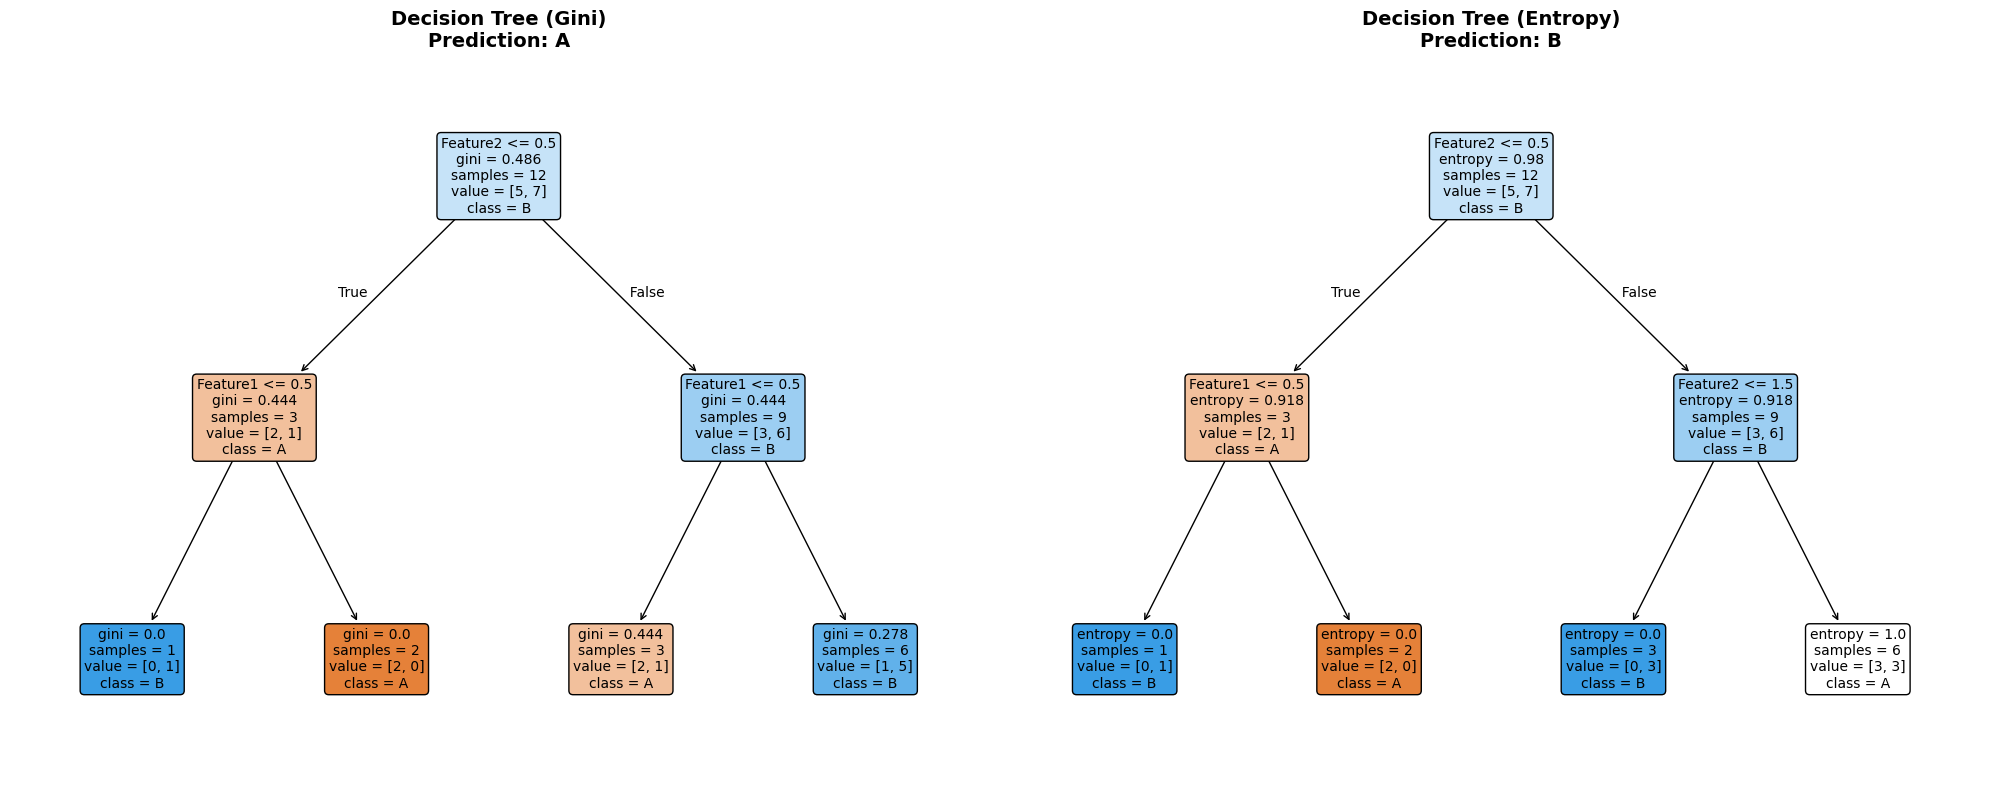

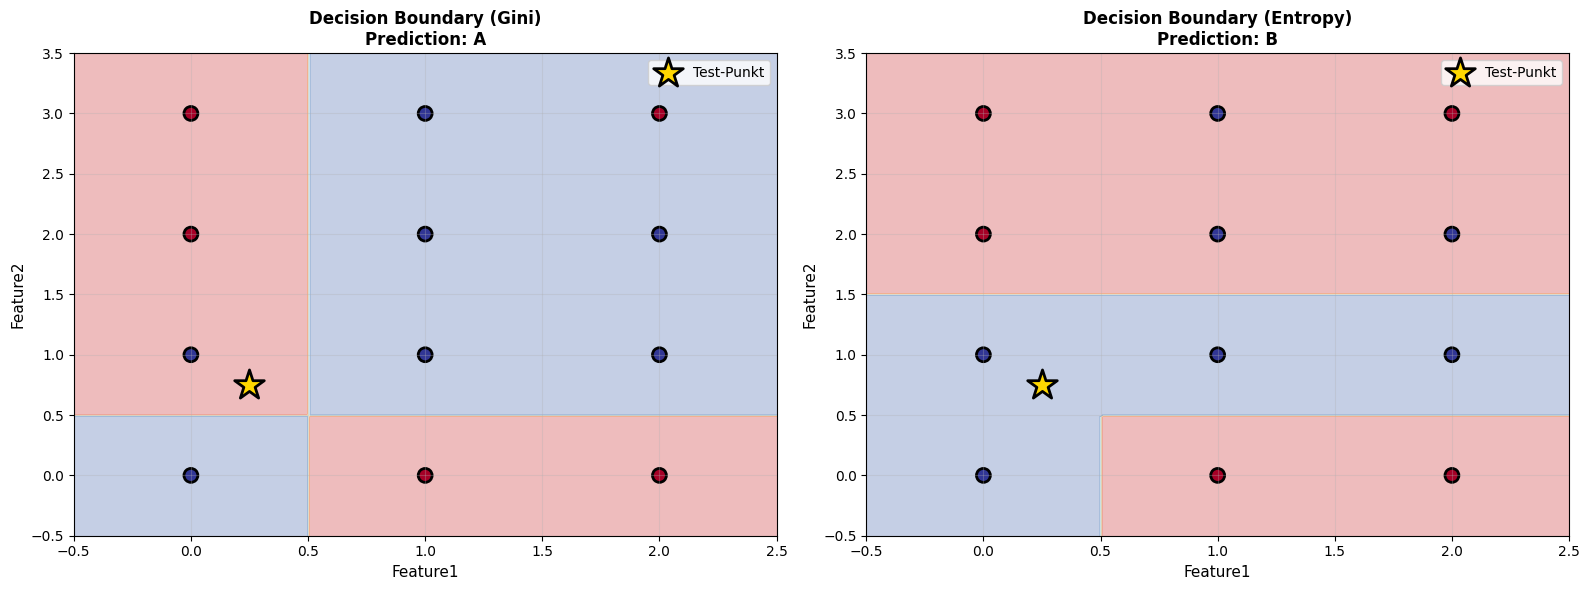

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# ============================================
# Synthetisches Beispiel konstruieren
# ============================================
np.random.seed(42)

# Einfaches Dataset wo Gini und Entropie unterschiedlich splitten
X_example = np.array(
    [
        [0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [1, 0],
        [1, 1],
        [1, 2],
        [1, 3],
        [2, 0],
        [2, 1],
        [2, 2],
        [2, 3],
    ]
)

y_example = np.array(["B", "B", "A", "A", "A", "B", "B", "B", "A", "B", "B", "A"])

# Test-Punkt der unterschiedlich klassifiziert werden könnte
X_test_example = np.array([[0.25, 0.75]])

print("=" * 60)
print("DATASET")
print("=" * 60)
df_example = pd.DataFrame(X_example, columns=["Feature1", "Feature2"])
df_example["Class"] = y_example
print(df_example.to_string(index=False))
print(f"\nTest-Punkt: Feature1={X_test_example[0,0]}, Feature2={X_test_example[0,1]}")

# ============================================
# 1. Decision Tree mit GINI
# ============================================
dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=42)
dt_gini.fit(X_example, y_example)
pred_gini = dt_gini.predict(X_test_example)

print("\n" + "=" * 60)
print("GINI INDEX")
print("=" * 60)
print(f"Vorhersage für Test-Punkt: {pred_gini[0]}")
print(f"Wahrscheinlichkeiten: {dt_gini.predict_proba(X_test_example)[0]}")

# ============================================
# 2. Decision Tree mit ENTROPY
# ============================================
dt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)
dt_entropy.fit(X_example, y_example)
pred_entropy = dt_entropy.predict(X_test_example)

print("\n" + "=" * 60)
print("ENTROPY (Information Gain)")
print("=" * 60)
print(f"Vorhersage für Test-Punkt: {pred_entropy[0]}")
print(f"Wahrscheinlichkeiten: {dt_entropy.predict_proba(X_test_example)[0]}")

# ============================================
# 3. Vergleich
# ============================================
print("\n" + "=" * 60)
print("VERGLEICH")
print("=" * 60)
if pred_gini[0] != pred_entropy[0]:
    print(f"Unterschiedliche Klassifikation!")
    print(f"Gini:    {pred_gini[0]}")
    print(f"Entropy: {pred_entropy[0]}")
else:
    print(f"Gleiche Klassifikation: {pred_gini[0]}")
    print("(Für dieses Beispiel sind die Bäume gleich)")

# ============================================
# 4. Visualisierung der Bäume
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Gini Tree
_ = plot_tree(
    dt_gini,
    ax=axes[0],
    feature_names=["Feature1", "Feature2"],
    class_names=["A", "B"],
    filled=True,
    rounded=True,
    fontsize=10,
)
_ = axes[0].set_title(
    f"Decision Tree (Gini)\nPrediction: {pred_gini[0]}", fontsize=14, fontweight="bold"
)

# Entropy Tree
_ = plot_tree(
    dt_entropy,
    ax=axes[1],
    feature_names=["Feature1", "Feature2"],
    class_names=["A", "B"],
    filled=True,
    rounded=True,
    fontsize=10,
)
_ = axes[1].set_title(
    f"Decision Tree (Entropy)\nPrediction: {pred_entropy[0]}",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()


# ============================================
# 5. Decision Boundaries visualisieren
# ============================================
def plot_decision_boundary(clf, X, y, ax, title):
    # Mesh grid erstellen
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Vorhersagen für alle Punkte
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.where(Z == "A", 0, 1)  # Convert to numeric
    Z = Z.reshape(xx.shape)

    # Decision Boundary plotten
    ax.contourf(xx, yy, Z, alpha=0.3, cmap="RdYlBu")

    # Datenpunkte plotten
    y_numeric = np.where(y == "A", 0, 1)
    scatter = ax.scatter(
        X[:, 0],
        X[:, 1],
        c=y_numeric,
        cmap="RdYlBu",
        edgecolors="black",
        s=100,
        linewidth=2,
    )

    # Test-Punkt plotten
    ax.scatter(
        X_test_example[:, 0],
        X_test_example[:, 1],
        marker="*",
        s=500,
        c="gold",
        edgecolors="black",
        linewidth=2,
        label="Test-Punkt",
    )

    ax.set_xlabel("Feature1", fontsize=11)
    ax.set_ylabel("Feature2", fontsize=11)
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.legend()
    ax.grid(alpha=0.3)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_decision_boundary(
    dt_gini,
    X_example,
    y_example,
    axes[0],
    f"Decision Boundary (Gini)\nPrediction: {pred_gini[0]}",
)
plot_decision_boundary(
    dt_entropy,
    X_example,
    y_example,
    axes[1],
    f"Decision Boundary (Entropy)\nPrediction: {pred_entropy[0]}",
)

plt.tight_layout()
plt.show()

Die beiden Unreinheitsmasse Gini-Index und Entropie können zu unterschiedlichen Splits führen, da sie unterschiedliche Sensitivitäten gegenüber der Klassenverteilung aufweisen:
- Gini-Index bevorzugt Splits, die grosse, relativ reine Partitionen erzeugen. Er ist weniger empfindlich gegenüber kleinen Unreinheiten. 
- Entropie reagiert aufgrund des Logarithmus empfindlicher auf gemischte Klassenverteilungen und bestraft Unreinheiten stärker. Dies kann zu anderen Split-Entscheidungen führen, besonders wenn mehrere Splits ähnliche, aber nicht identische Unreinheitswerte haben.


Hier ist eine kurze Erklärung für mein Beispiel:

**Gini-Tree:** 
- 1. Split: Feature2 <= 0.5
- 2. Split im rechten Zweig: **Feature1 <= 0.5**
- Test-Punkt (Feature2=0.75 > 0.5, Feature1=0.25 <= 0.5) → landet in Blatt mit **Klasse A**

**Entropy-Tree:**
- 1. Split: Feature2 <= 0.5
- 2. Split im rechten Zweig: **Feature2 <= 1.5**
- Test-Punkt (Feature2=0.75 <= 1.5) → landet in Blatt mit **Klasse B**


### Aufgabe 11 - Decision Tree Anwendung (6 Punkte)

Entwickle und evaluiere (analog zu Aufgabe 8) nun ein bestmögliches Decision Tree-Modell für die Vorhersage der Zielvariable.

Du darfst hierbei beliebige scikit-learn-Funktionen verwenden.

Zeichne den gefundenen Baum und erkläre ihn.

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# ============================================
# 1. K-FOLD CROSS-VALIDATION SETUP
# ============================================

k_folds = 5
cv_strategy = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# ============================================
# 2. HYPERPARAMETER-RAUM FÜR DECISION TREE
# ============================================

param_grid = {
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_depth": [5, 7, 10, 15, None],
    "classifier__min_samples_split": [5, 10, 20, 40],
    "classifier__min_samples_leaf": [1, 2, 4, 8, 16],
    "classifier__max_features": [None],
    "classifier__class_weight": ["balanced", None],
    "classifier__ccp_alpha": [
        0.0,
        0.0001,
        0.001,
        0.01,
        0.1,
        1.0,
    ],
}


# ============================================
# 3. PIPELINE ERSTELLEN
# ============================================

# Decision Trees können mit kategorialen Features umgehen,
# aber der Preprocessor schadet nicht (One-Hot-Encoding)
base_dt = DecisionTreeClassifier(random_state=42)

pipeline_dt = Pipeline([("preprocessor", preprocessor), ("classifier", base_dt)])

# ============================================
# 4. GRID SEARCH
# ============================================

grid_search_dt = GridSearchCV(
    pipeline_dt,
    param_grid,
    cv=cv_strategy,
    scoring="f1",
    return_train_score=True,
    n_jobs=-1,
    verbose=1,
)

# Training
grid_search_dt.fit(X_train, y_train)

print("Best params:", grid_search_dt.best_params_)
print("Best CV F1:", grid_search_dt.best_score_)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Alter',
                                                                          'Ruheblutdruck',
                                                                          'Cholesterin',
                                                                          'Maximale '
                                                                          'Herzfrequenz',
                                                                          'ST-Strecken-Senkung']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_ou...
             param_grid={'classifier__ccp_alpha': [0.0, 0.0001, 0.001, 0.01,
                                                   0.1, 1.0],
                         'classifier__class_weight': ['balanced', None],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [5, 7, 10, 15, None],
                         'classifier__max_features': [None],
                         'classifier__min_samples_leaf': [1, 2, 4, 8, 16],
                         'classifier__min_samples_split': [5, 10, 20, 40]},
             return_train_score=True, scoring='f1', verbose=1)

Best params: {'classifier__ccp_alpha': 0.0, 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__max_features': None, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 5}
Best CV F1: 0.8663043121087662



=== Test Set Performance ===
Test F1 Score: 0.8487
Test Accuracy: 0.8428

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.88      0.84       105
        True       0.89      0.81      0.85       124

    accuracy                           0.84       229
   macro avg       0.84      0.85      0.84       229
weighted avg       0.85      0.84      0.84       229



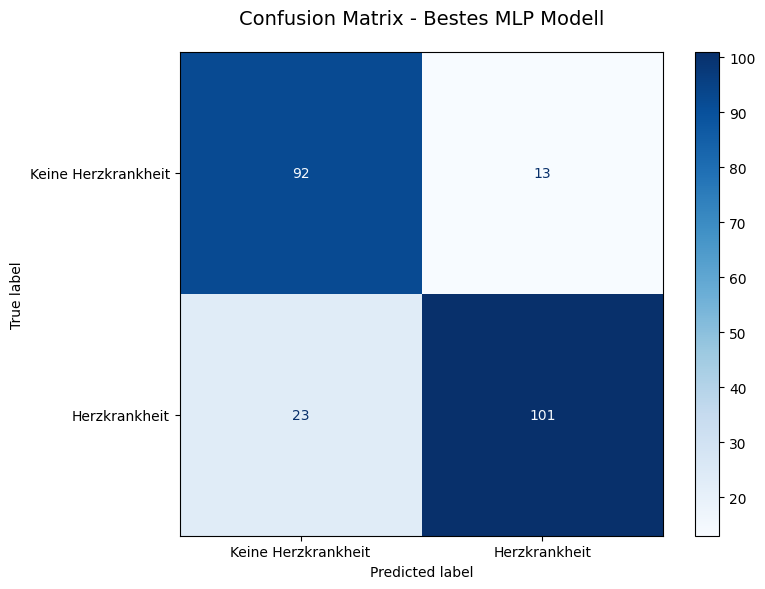

In [45]:
# ============================================
# 5. TEST-SET EVALUATION
# ============================================

y_pred = grid_search_dt.predict(X_test)

print("\n=== Test Set Performance ===")
print(f"Test F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Keine Herzkrankheit", "Herzkrankheit"]
)
_ = disp.plot(ax=ax, cmap="Blues", values_format="d")
_ = ax.set_title("Confusion Matrix - Bestes MLP Modell", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

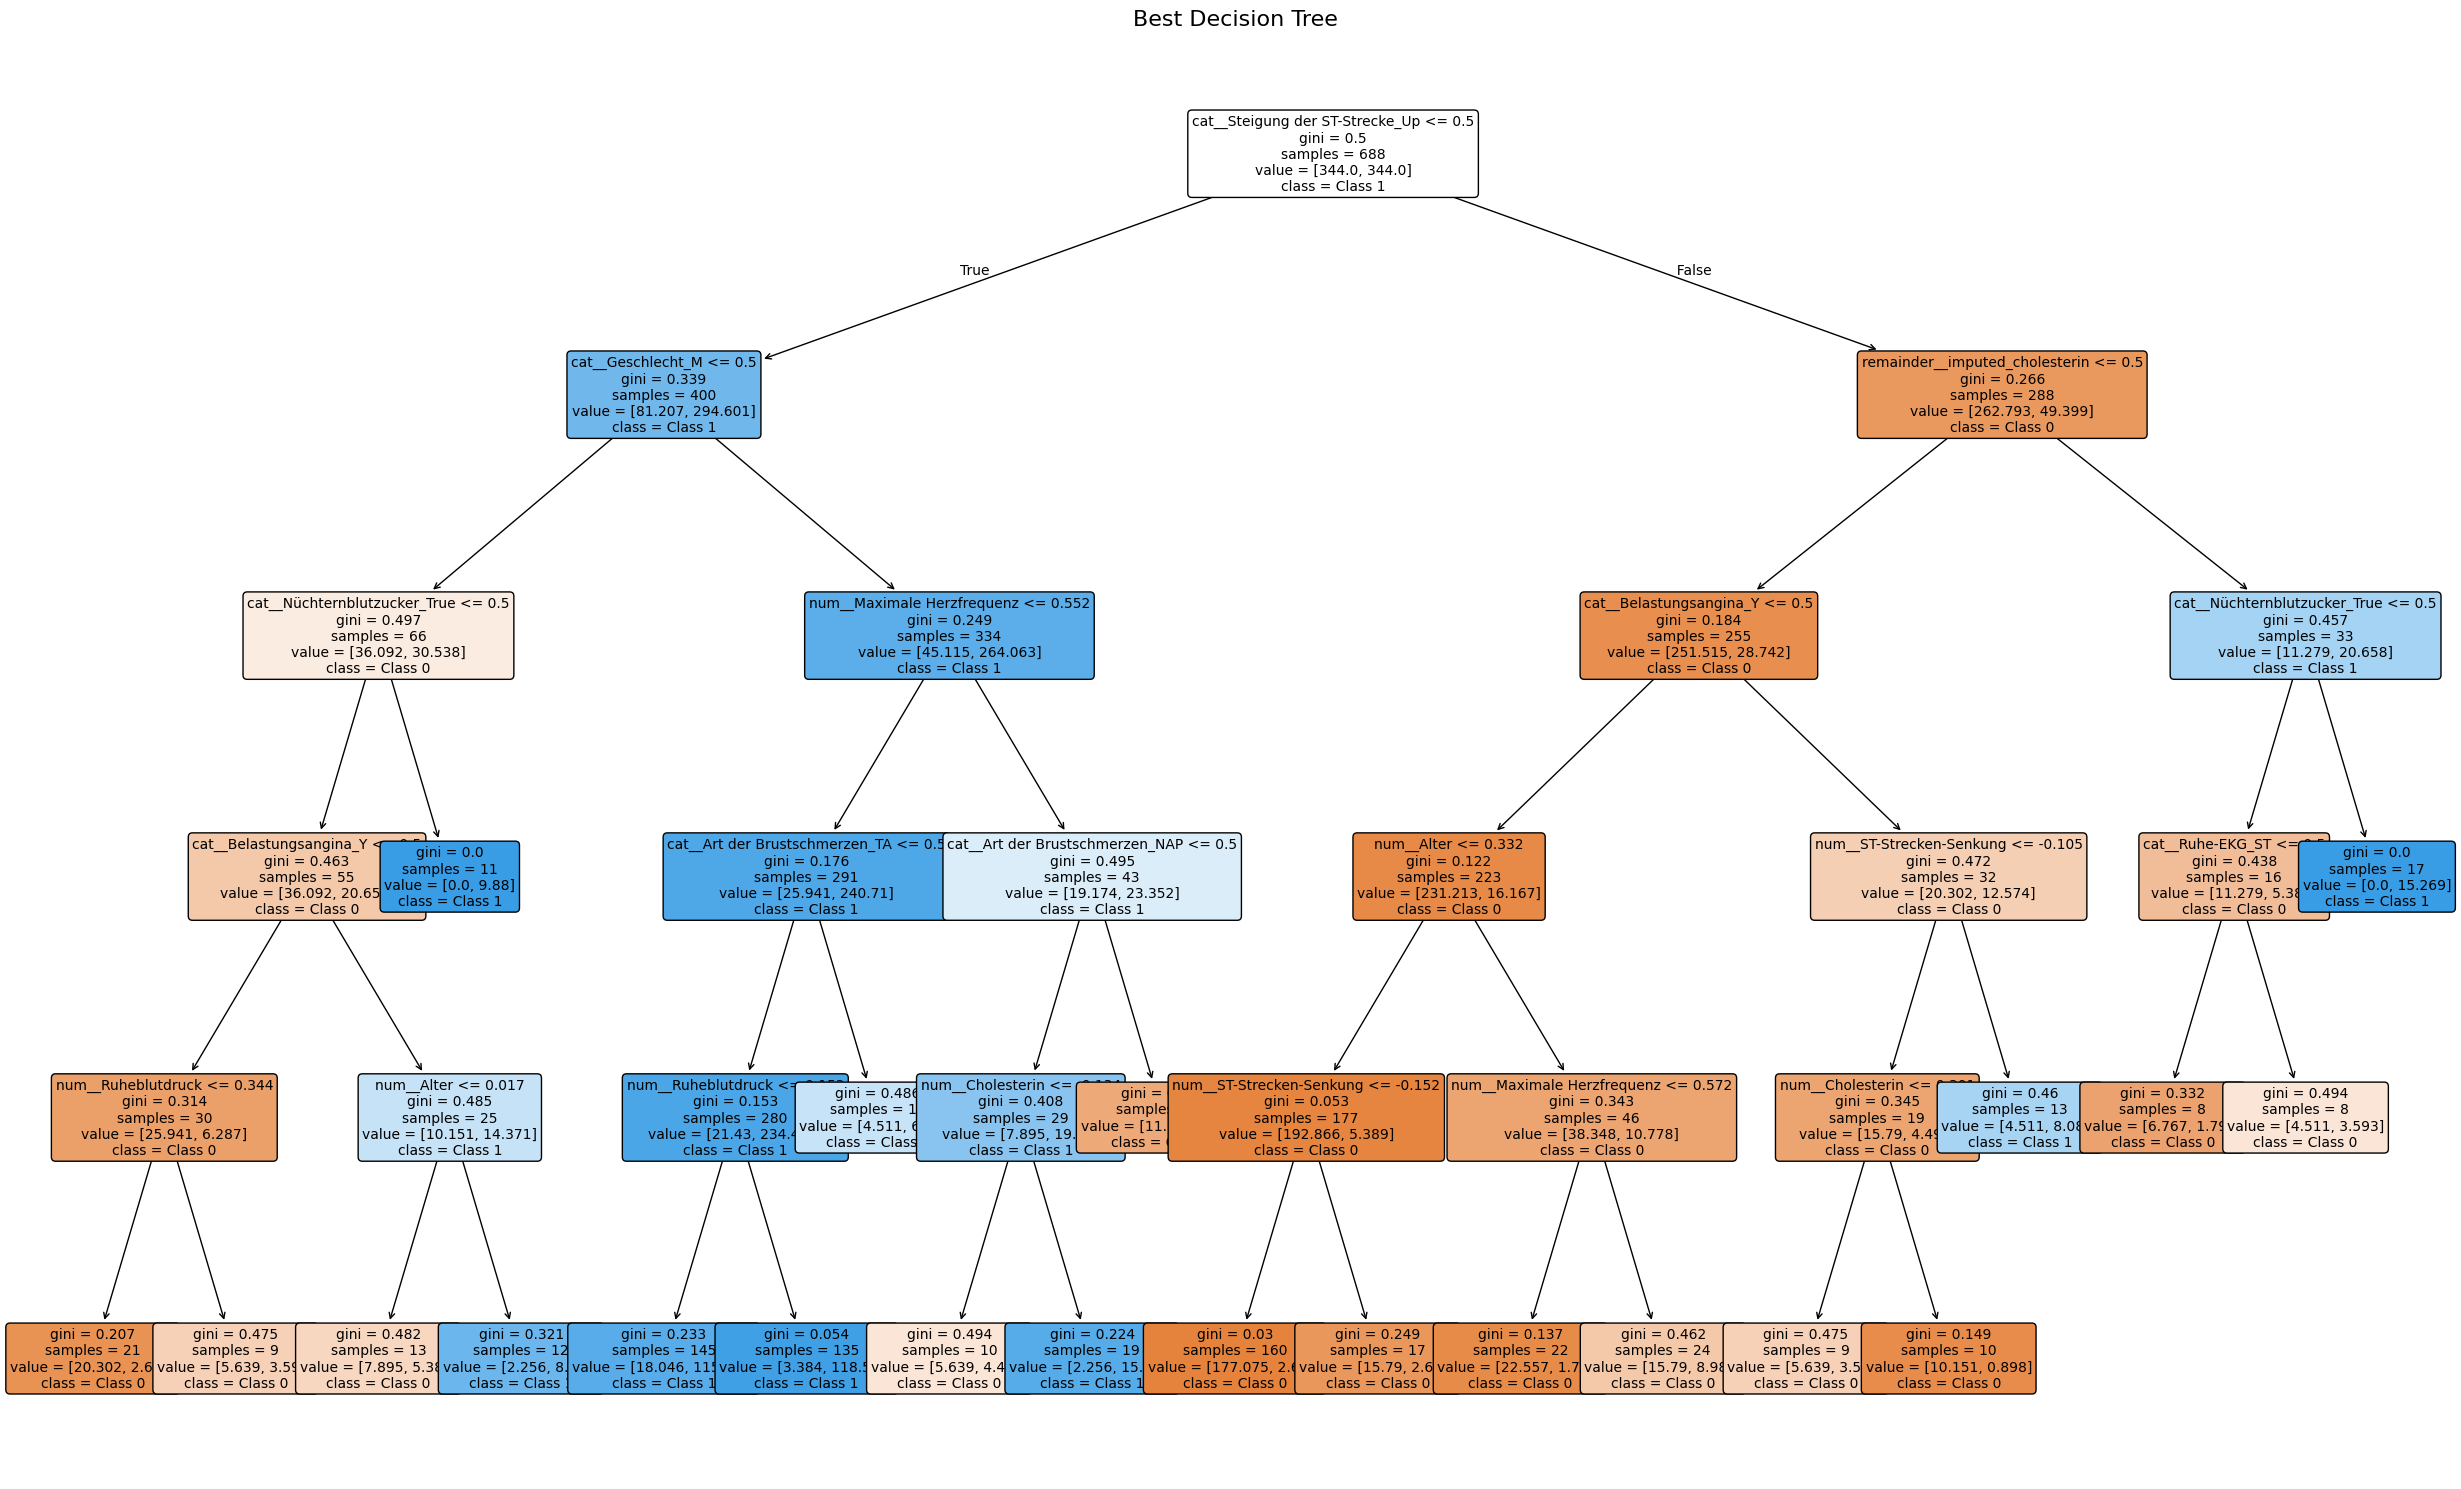

In [46]:
# ============================================
# 6. BAUM VISUALISIEREN
# ============================================

# Hole das beste Modell
best_model = grid_search_dt.best_estimator_

# Hole den Decision Tree aus der Pipeline
best_tree = best_model.named_steps["classifier"]

# Hole die Feature-Namen nach Preprocessing
feature_names_after_preprocessing = best_model.named_steps[
    "preprocessor"
].get_feature_names_out()

# Erstelle eine große Abbildung
_ = plt.figure(figsize=(25, 15))
_ = plot_tree(
    best_tree,
    feature_names=feature_names_after_preprocessing,
    class_names=["Class 0", "Class 1"],  # Anpassen falls mehr Klassen
    filled=True,
    rounded=True,
    fontsize=10,
)
_ = plt.title("Best Decision Tree", fontsize=16)
plt.tight_layout()
plt.show()

### Erklärung des Entscheidungsbaums

Der beste Entscheidungsbaum hat folgende Metriken auf dem Testset erreicht:
- F1-Score: 0.8487
- Accuracy: 0.8428
- Precision: 0.89 (Klasse 1 - Herzkrankheit)
- Recall: 0.81 (Klasse 1 - Herzkrankheit)

Der Entscheidungsbaum wurde mit den folgenden Hyperparametern trainiert:
- Unreinheitsmass: Gini
- Maximale Tiefe: 5
- Anzahl der minimalen Samples pro Split: 5
- Anzahl der minimalen Samples pro Blatt: 8
- Maximale Anzahl der Features: None
- Klassengewichte: balanced
- ccp alpha: 0.0

Der erstellte Entscheidungsbaum verwendet ausschliesslich **Pre-pruning** Techniken um Overfitting zu vermeiden:
- Die maximale Tiefe des Baums wurde auf 5 begrenzt, um zu verhindern, dass der Baum zu tief wächst und sich zu sehr an die Trainingsdaten anpasst.
- Die minimale Anzahl von Samples pro Split wurde auf 5 gesetzt, um sicherzustellen, dass jeder Split auf einer ausreichenden Anzahl von Datenpunkten basiert.
- Die minimale Anzahl von Samples pro Blatt wurde auf 8 gesetzt, um zu kleine, instabile Blätter zu vermeiden.
- Durch balanced class weights wird der Klassenungleichgewicht im Datensatz ausgeglichen.

In dem Baum ist folgendes zu erkennen:
- Der erste Split erfolgt basierend auf dem Feature "Steigung der ST-Strecke_Up".
  - Dieses Feature hat den höchsten Informationsgewinn und teilt die Daten in zwei Hauptgruppen: Patienten mit upsloping ST-Segment oder nicht.
  - Patienten **mit** upsloping ST-Segment (rechts, ST_Up=1) haben eine **niedrigere** Wahrscheinlichkeit für Herzkrankheit. Der False-Branch zeigt Gini 0.266 mit dominanter Klasse 0 (keine Herzkrankheit, ~97% der Samples).
  - Patienten **ohne** upsloping ST-Segment (links, ST_Up=0) haben eine **höhere** Wahrscheinlichkeit für Herzkrankheit. Der True-Branch zeigt Gini 0.439 mit dominanter Klasse 1 (Herzkrankheit, ~74% der Samples).
  
- Der zweite Split ist individuell für beide Äste:
  - Für Patienten ohne upsloping ST (links) wird als nächstes das Geschlecht betrachtet.
  - Für Patienten mit upsloping ST (rechts) wird als nächstes der Cholesterinwert betrachtet.
  
- Blätter (Leaf Nodes) am Ende des Baums geben die finale Klassifikation an (0 = keine Herzkrankheit, 1 = Herzkrankheit) basierend auf den getroffenen Entscheidungen entlang des Pfads vom Wurzelknoten zum Blatt.

In jedem Knoten ist folgendes ersichtlich:
- Gini-Index des Knotens (Unreinheitsmass)
- Anzahl der Samples im Knoten
- value: Verteilung der Klassen im Knoten (Anzahl der Samples pro Klasse)
- class: Vorhergesagte Klasse für den Knoten (dominante Klasse)

In Split-Knoten ist dazu noch folgende Information ersichtlich:
- Split-Bedingung (z.B. "cat_Steigung der ST-Strecke_Up <= 0.5")

#### Beispielpfad
**Pfad:** False → False → False

**Patient-Charakteristika:**
- Upsloping ST-Segment (ST_Up = 1)
- Erhöhte Cholesterinwerte
- Nüchternblutzucker mehr als 120 mg/dl

**Knoten-Metriken:**
- Gini: 0.0
- Samples: 17
- Value: [0.0, 15.269] → Klasse 1 (Herzkrankheit)

Dieser Pfad zeigt einen typischen Fall eines Patienten mit Herzkrankheit.

### Bewertung des Entscheidungsbaums

Der Entscheidungsbaum zeigt eine solide Leistung auf dem Testset, mit einem F1-Score von 0.8487 und einer Accuracy von 0.8428. Die Confusion Matrix zeigt, dass das Modell 101 von 124 Herzkrankheitsfällen korrekt identifiziert (Recall: 0.81) und dabei eine hohe Precision von 0.89 erreicht. Dies deutet darauf hin, dass der Baum in der Lage ist, die Zielvariable "Herzkrankheit" zuverlässig vorherzusagen. Vergleicht man jedoch dieses Modell mit dem Logistischen Regressionsmodell und dem MLP-Modell aus den vorherigen Aufgaben, so schneidet der Entscheidungsbaum etwas schlechter ab. Dies könnte darauf hindeuten, dass die Entscheidungsgrenzen im Datensatz komplexer sind und von den anderen Modellen besser erfasst werden können. Dennoch bietet der Entscheidungsbaum den Vorteil der Interpretierbarkeit, da die getroffenen Entscheidungen klar nachvollziehbar sind.

### Aufgabe 12 - Weitere Klassifikationsalgorithmen (9 Punkte)

Vergleiche nun mindestens drei weitere sinnvolle Klassifikations-Methoden. Du bist dabei frei, beliebige scikit-learn Modelle zur Vorhersage der Zielvariablen zu verwenden, um jeweils eine möglichst gute Vorhersage im Sinne Zielmetrik F1 zu erreichen.

Berechne jeweils weiter den F1-Score, die Accuracy und zeichne die Confusion Matrix auf den Testdaten.

In [47]:
"""
Es werden folgende 3 Klassifikationsmodelle implementiert:
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
"""

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Random State für Reproduzierbarkeit
RANDOM_STATE = 42

# Anzahl CV-Folds
CV_FOLDS = 5

# Scoring-Metrik
SCORING = "f1_weighted"

# ============================================
# Hyperparameter Grids
# ============================================
rf_param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", "log2"],
}

svm_param_grid = {
    "classifier__C": [0.1, 1, 10, 100],
    "classifier__gamma": ["scale", "auto", 0.001, 0.01],
    "classifier__kernel": ["rbf", "linear"],
}

knn_param_grid = {
    "classifier__n_neighbors": [3, 5, 7, 9, 11, 15],
    "classifier__weights": ["uniform", "distance"],
    "classifier__metric": ["euclidean", "manhattan"],
}

print("\n" + "=" * 60)
print("Setup abgeschlossen ✓")
print("=" * 60)

'\nEs werden folgende 3 Klassifikationsmodelle implementiert:\n- Random Forest\n- Support Vector Machine (SVM)\n- K-Nearest Neighbors (KNN)\n'


Setup abgeschlossen ✓


In [48]:
# Dictionary für alle trainierten Modelle
trained_models = {}
grid_search_results = {}

# ============================================
# 1. Random Forest Training
# ============================================
print("=" * 60)
print("Training Random Forest...")
print("=" * 60)

# Pipeline: Preprocessing + Classifier
rf_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)),
    ]
)

# GridSearchCV
rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=CV_FOLDS,
    scoring=SCORING,
    n_jobs=-1,
    verbose=True,
    return_train_score=True,
)

# Training
rf_grid.fit(X_train, y_train)

# Speichern
trained_models["Random Forest"] = rf_grid.best_estimator_
grid_search_results["Random Forest"] = {
    "best_params": rf_grid.best_params_,
    "best_score": rf_grid.best_score_,
    "cv_results": rf_grid.cv_results_,
}

print(f"\nBest Parameters: {rf_grid.best_params_}")
print(f"Best CV Score: {rf_grid.best_score_:.4f}")

# ============================================
# 2. SVM Training
# ============================================
print("\n" + "=" * 60)
print("Training SVM...")
print("=" * 60)

# Pipeline: Preprocessing + Classifier
svm_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classifier", SVC(random_state=RANDOM_STATE, probability=True)),
    ]
)

# GridSearchCV
svm_grid = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    cv=CV_FOLDS,
    scoring=SCORING,
    n_jobs=-1,
    verbose=True,
    return_train_score=True,
)

# Training
svm_grid.fit(X_train, y_train)

# Speichern
trained_models["SVM"] = svm_grid.best_estimator_
grid_search_results["SVM"] = {
    "best_params": svm_grid.best_params_,
    "best_score": svm_grid.best_score_,
    "cv_results": svm_grid.cv_results_,
}

print(f"\nBest Parameters: {svm_grid.best_params_}")
print(f"Best CV Score: {svm_grid.best_score_:.4f}")

# ============================================
# 3. KNN Training
# ============================================
print("\n" + "=" * 60)
print("Training KNN...")
print("=" * 60)

# Pipeline: Preprocessing + Classifier
knn_pipeline = Pipeline(
    [("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())]
)

# GridSearchCV
knn_grid = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_param_grid,
    cv=CV_FOLDS,
    scoring=SCORING,
    n_jobs=-1,
    verbose=True,
    return_train_score=True,
)

# Training
knn_grid.fit(X_train, y_train)

# Speichern
trained_models["KNN"] = knn_grid.best_estimator_
grid_search_results["KNN"] = {
    "best_params": knn_grid.best_params_,
    "best_score": knn_grid.best_score_,
    "cv_results": knn_grid.cv_results_,
}

print(f"\nBest Parameters: {knn_grid.best_params_}")
print(f"Best CV Score: {knn_grid.best_score_:.4f}")

# ============================================
# Zusammenfassung
# ============================================
print("\n" + "=" * 60)
print("TRAINING ABGESCHLOSSEN")
print("=" * 60)
for model_name, results in grid_search_results.items():
    print(f"\n{model_name}:")
    print(f"  Best CV Score: {results['best_score']:.4f}")
    print(f"  Best Params: {results['best_params']}")

Training Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Alter',
                                                                          'Ruheblutdruck',
                                                                          'Cholesterin',
                                                                          'Maximale '
                                                                          'Herzfrequenz',
                                                                          'ST-Strecken-Senkung']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Geschlecht',
                                                                          'Art '
                                                                          'der '
                                                                          'Brustschmerzen',
                                                                          'R...
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='f1_weighted', verbose=True)


Best Parameters: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best CV Score: 0.8757

Training SVM...
Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Alter',
                                                                          'Ruheblutdruck',
                                                                          'Cholesterin',
                                                                          'Maximale '
                                                                          'Herzfrequenz',
                                                                          'ST-Strecken-Senkung']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Geschlecht',
                                                                          'Art '
                                                                          'der '
                                                                          'Brustschmerzen',
                                                                          'Ruhe-EKG',
                                                                          'Belastungsangina',
                                                                          'Steigung '
                                                                          'der '
                                                                          'ST-Strecke',
                                                                          'Nüchternblutzucker'])])),
                                       ('classifier',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01],
                         'classifier__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='f1_weighted', verbose=True)


Best Parameters: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best CV Score: 0.8761

Training KNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Alter',
                                                                          'Ruheblutdruck',
                                                                          'Cholesterin',
                                                                          'Maximale '
                                                                          'Herzfrequenz',
                                                                          'ST-Strecken-Senkung']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Geschlecht',
                                                                          'Art '
                                                                          'der '
                                                                          'Brustschmerzen',
                                                                          'Ruhe-EKG',
                                                                          'Belastungsangina',
                                                                          'Steigung '
                                                                          'der '
                                                                          'ST-Strecke',
                                                                          'Nüchternblutzucker'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [3, 5, 7, 9, 11, 15],
                         'classifier__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='f1_weighted', verbose=True)


Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
Best CV Score: 0.8833

TRAINING ABGESCHLOSSEN

Random Forest:
  Best CV Score: 0.8757
  Best Params: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

SVM:
  Best CV Score: 0.8761
  Best Params: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}

KNN:
  Best CV Score: 0.8833
  Best Params: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}


In [49]:
# Dictionary für Test-Ergebnisse
test_results = {}

print("=" * 60)
print("TEST SET EVALUATION")
print("=" * 60)

for model_name, model in trained_models.items():
    print(f"\n{'=' * 60}")
    print(f"{model_name}")
    print("=" * 60)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Metriken berechnen
    accuracy = accuracy_score(y_test, y_pred)
    f1_weighted = f1_score(y_test, y_pred, average="weighted")
    f1_macro = f1_score(y_test, y_pred, average="macro")
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Speichern
    test_results[model_name] = {
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba,
        "accuracy": accuracy,
        "f1_weighted": f1_weighted,
        "f1_macro": f1_macro,
        "confusion_matrix": conf_matrix,
        "classification_report": class_report,
    }

    # Ausgabe
    print(f"\nAccuracy:     {accuracy:.4f}")
    print(f"F1 (weighted): {f1_weighted:.4f}")
    print(f"F1 (macro):    {f1_macro:.4f}")

    print("\nConfusion Matrix:")
    print(conf_matrix)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# ============================================
# Vergleichstabelle
# ============================================
print("\n" + "=" * 60)
print("VERGLEICHSTABELLE")
print("=" * 60)


comparison_df = pd.DataFrame(
    {
        "Model": list(test_results.keys()),
        "Accuracy": [results["accuracy"] for results in test_results.values()],
        "F1 (weighted)": [results["f1_weighted"] for results in test_results.values()],
        "F1 (macro)": [results["f1_macro"] for results in test_results.values()],
    }
)

comparison_df = comparison_df.sort_values("F1 (weighted)", ascending=False)
print(comparison_df.to_string(index=False))

# Bestes Modell identifizieren
best_model_name = comparison_df.iloc[0]["Model"]
print(f"Bestes Modell (F1 weighted): {best_model_name}")
print(f"F1 Score: {comparison_df.iloc[0]['F1 (weighted)']:.4f}")

TEST SET EVALUATION

Random Forest

Accuracy:     0.8777
F1 (weighted): 0.8776
F1 (macro):    0.8767

Confusion Matrix:
[[ 90  15]
 [ 13 111]]

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.86      0.87       105
        True       0.88      0.90      0.89       124

    accuracy                           0.88       229
   macro avg       0.88      0.88      0.88       229
weighted avg       0.88      0.88      0.88       229


SVM

Accuracy:     0.8821
F1 (weighted): 0.8819
F1 (macro):    0.8810

Confusion Matrix:
[[ 90  15]
 [ 12 112]]

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.86      0.87       105
        True       0.88      0.90      0.89       124

    accuracy                           0.88       229
   macro avg       0.88      0.88      0.88       229
weighted avg       0.88      0.88      0.88       229


KNN

Accuracy:     0.8603
F1 (weighted): 

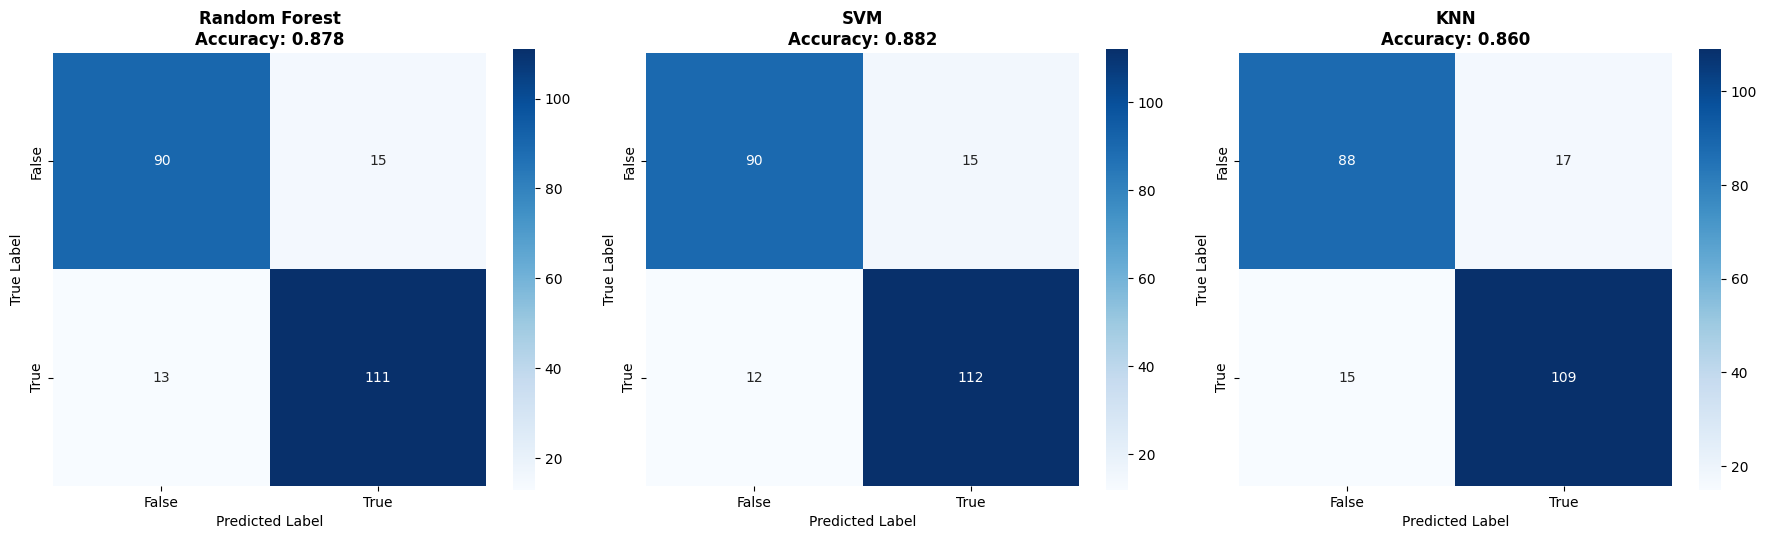

In [50]:
# Styling
sns.set_palette("husl")

# ============================================
# 1. Confusion Matrices (3 nebeneinander)
# ============================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, results) in enumerate(test_results.items()):
    _ = cm = results["confusion_matrix"]

    # Heatmap erstellen
    _ = sns.heatmap(
        cm,
        annot=True,  # Zahlen in Zellen anzeigen
        fmt="d",  # Integer-Format
        cmap="Blues",  # Farbschema
        square=True,  # Quadratische Zellen
        cbar=True,  # Colorbar anzeigen
        ax=axes[idx],
        xticklabels=np.unique(y_test),  # Klassen-Labels
        yticklabels=np.unique(y_test),
    )

    # Titel und Labels
    _ = axes[idx].set_title(
        f'{model_name}\nAccuracy: {results["accuracy"]:.3f}',
        fontsize=12,
        fontweight="bold",
    )
    _ = axes[idx].set_ylabel("True Label", fontsize=10)
    _ = axes[idx].set_xlabel("Predicted Label", fontsize=10)

plt.tight_layout()
plt.show()

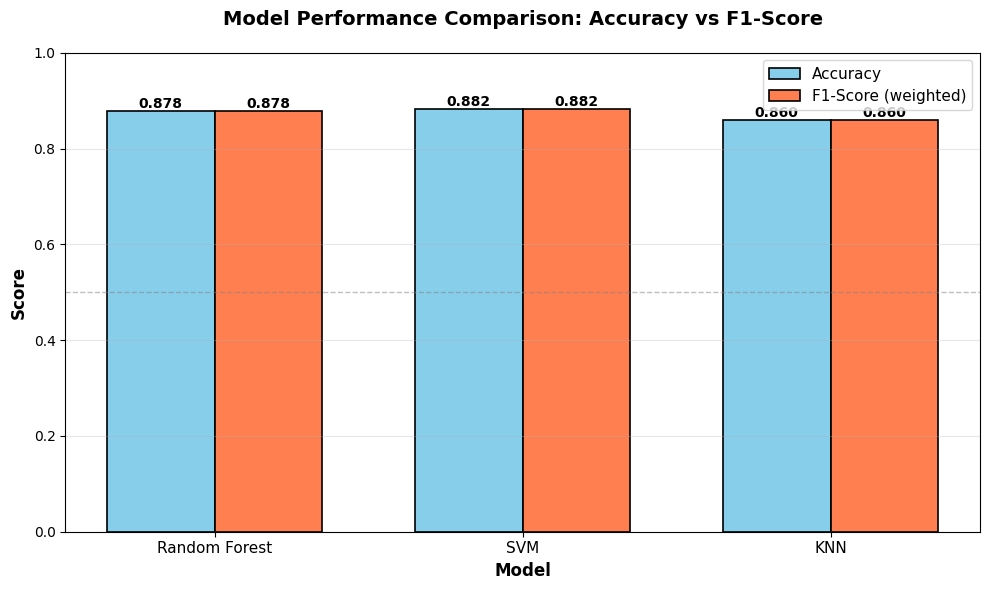

In [51]:
# ============================================
# 2. Accuracy und F1-Score Bar Chart
# ============================================
fig, ax = plt.subplots(figsize=(10, 6))

# Daten vorbereiten
models = list(test_results.keys())
accuracies = [results["accuracy"] for results in test_results.values()]
f1_scores = [results["f1_weighted"] for results in test_results.values()]

# Breite der Balken
x = np.arange(len(models))
width = 0.35

# Balken erstellen
bars1 = ax.bar(
    x - width / 2,
    accuracies,
    width,
    label="Accuracy",
    color="skyblue",
    edgecolor="black",
    linewidth=1.2,
)
bars2 = ax.bar(
    x + width / 2,
    f1_scores,
    width,
    label="F1-Score (weighted)",
    color="coral",
    edgecolor="black",
    linewidth=1.2,
)

# Werte auf Balken anzeigen
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        _ = ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

# Styling
_ = ax.set_xlabel("Model", fontsize=12, fontweight="bold")
_ = ax.set_ylabel("Score", fontsize=12, fontweight="bold")
_ = ax.set_title(
    "Model Performance Comparison: Accuracy vs F1-Score",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
_ = ax.set_xticks(x)
_ = ax.set_xticklabels(models, fontsize=11)
_ = ax.legend(fontsize=11)
_ = ax.set_ylim([0, 1.0])
_ = ax.grid(axis="y", alpha=0.3)

# Horizontale Linie bei 0.5 für Referenz
_ = ax.axhline(y=0.5, color="gray", linestyle="--", linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()